In [208]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [85]:
#imports data
patient_beneficiary = pd.read_csv("Medicare_Outpatient_Inpatient_Beneficiary_PartB.csv")

patient_beneficiary_eval = pd.read_csv("Medicare_Outpatient_Inpatient_Beneficiary_Eval_PartB.csv")

provider = pd.read_csv("Medicare_Provider_PartB.csv")
provider_eval = pd.read_csv("Medicare_Provider_Eval_PartB.csv")

C:\Users\Mick4\Anaconda3\envs\data2\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (8,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [594]:
patient_beneficiary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436254 entries, 0 to 436253
Data columns (total 55 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   BeneID                           436254 non-null  object 
 1   ClaimID                          436254 non-null  object 
 2   ClaimStartDt                     436254 non-null  object 
 3   ClaimEndDt                       436254 non-null  object 
 4   InscClaimAmtReimbursed           436254 non-null  float64
 5   AttendingPhysician               435082 non-null  object 
 6   OperatingPhysician               88667 non-null   object 
 7   OtherPhysician                   155722 non-null  object 
 8   AdmissionDt                      30139 non-null   object 
 9   ClmAdmitDiagnosisCode            112910 non-null  object 
 10  DeductibleAmtPaid                435580 non-null  float64
 11  DischargeDt                      30139 non-null   object 
 12  Di

In [617]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
patient_beneficiary.describe()

InscClaimAmtReimbursed  DeductibleAmtPaid  ClmProcedureCode_1  \
count           436254.000000      435580.000000        17239.000000   
mean               964.640760          74.838562         5904.486571   
std               3738.459109         267.948116         3041.036732   
min                  0.000000           0.000000           11.000000   
25%                 40.000000           0.000000         3893.000000   
50%                 80.000000           0.000000         5381.000000   
75%                300.000000           0.000000         8669.000000   
max             125000.000000        1068.000000         9999.000000   

       ClmProcedureCode_2  ClmProcedureCode_3  ClmProcedureCode_4  \
count         4006.000000          700.000000           95.000000   
mean          4099.813030         4171.528571         4218.705263   
std           2040.320242         2350.632691         1831.907969   
min             42.000000           42.000000           42.000000   
25%           2724.000000         2724.000000         2762.000000   
50%           4019.000000         4019.000000         4019.000000   
75%           4439.000000         5168.000000         4889.500000   
max           9999.000000         9982.000000         9986.000000   

       ClmProcedureCode_5  ClmProcedureCode_6         Gender           Race  \
count                 0.0                 0.0  436254.000000  436254.000000   
mean                  NaN                 NaN       1.581086       1.221410   
std                   NaN                 NaN       0.493382       0.646442   
min                   NaN                 NaN       1.000000       1.000000   
25%                   NaN                 NaN       1.000000       1.000000   
50%                   NaN                 NaN       2.000000       1.000000   
75%                   NaN                 NaN       2.000000       1.000000   
max                   NaN                 NaN       2.000000       5.000000   

               State         County  NoOfMonths_PartACov  NoOfMonths_PartBCov  \
count  436254.000000  436254.000000        436254.000000        436254.000000   
mean       29.731478     393.249563            11.930726            11.938598   
std        13.373388     277.256930             0.894111             0.785056   
min         1.000000       0.000000             0.000000             0.000000   
25%        18.000000     150.000000            12.000000            12.000000   
50%        32.000000     350.000000            12.000000            12.000000   
75%        42.000000     610.000000            12.000000            12.000000   
max        54.000000     999.000000            12.000000            12.000000   

       ChronicCond_Alzheimer  ChronicCond_Heartfailure  \
count          436254.000000             436254.000000   
mean                1.597246                  1.408308   
std                 0.490453                  0.491521   
min                 1.000000                  1.000000   
25%                 1.000000                  1.000000   
50%                 2.000000                  1.000000   
75%                 2.000000                  2.000000   
max                 2.000000                  2.000000   

       ChronicCond_KidneyDisease  ChronicCond_Cancer  \
count              436254.000000       436254.000000   
mean                    1.587864            1.848160   
std                     0.492220            0.358867   
min                     1.000000            1.000000   
25%                     1.000000            2.000000   
50%                     2.000000            2.000000   
75%                     2.000000            2.000000   
max                     2.000000            2.000000   

       ChronicCond_ObstrPulmonary  ChronicCond_Depression  \
count               436254.000000           436254.000000   
mean                     1.686930                1.564939   
std                      0.463743                0.495766   
min                   

In [56]:
processed = pd.read_csv("pb_merged_processed.csv")

In [57]:
processed.head(20)

ProviderID  InscClaimAmtReimbursed  DeductibleAmtPaid  ClmDiagnosisCount  \
0    PRV51001                   100.0                0.0                  1   
1    PRV51001                    90.0                0.0                  1   
2    PRV51001                    50.0                0.0                  1   
3    PRV51001                    60.0                0.0                  1   
4    PRV51001                   200.0                0.0                  9   
5    PRV51001                   300.0                0.0                  1   
6    PRV51001                   100.0                0.0                  1   
7    PRV51001                  2100.0                0.0                  1   
8    PRV51001                   100.0                0.0                  0   
9    PRV51001                    10.0               70.0                  3   
10   PRV51001                    80.0                0.0                  2   
11   PRV51001                  2500.0                0.0                  1   
12   PRV51001                    90.0                0.0                  1   
13   PRV51001                   500.0                0.0                  2   
14   PRV51001                    40.0                0.0                  3   
15   PRV51001                    20.0               50.0                  2   
16   PRV51001                    70.0                0.0                  1   
17   PRV51001                    40.0                0.0                  5   
18   PRV51001                    50.0                0.0                  0   
19   PRV51001                   300.0               40.0                  1   

    ClmProcedureCount  Gender  Race  RenalDiseaseIndicator  State  County  \
0                   0       1     1                      1     52     290   
1                   0       1     1                      0     54     160   
2                   0       2     1                      0     54     160   
3                   0       2     1                      0     52     290   
4                   0       1     1                      1      3      60   
5                   0       2     1                      0     52     290   
6                   0       1     3                      0      3      60   
7                   0       1     2                      0     54     230   
8                   0       2     1                      0      3      60   
9                   0       2     2                      0     14     141   
10                  0       1     1                      0     54     230   
11                  0       1     1                      1      3      60   
12                  0       1     1                      0     10      50   
13                  0       1     1                      0      3      60   
14                  0       2     1                      0     52     290   
15                  0       2     1                      0     52     270   
16                  0       1     1                      0     54     160   
17                  0       1     1                      1     10     100   
18                  0       2     1                      0     52     290   
19                  0       2     3                      0     52     290   

    ...  ChronicCond_stroke  IPAnnualReimbursementAmt  IPAnnualDeductibleAmt  \
0   ...                   2                    9000.0                  13068   
1   ...                   2                       0.0                      0   
2   ...                   2                       0.0                      0   
3   ...                   2                       0.0                      0   
4   ...                   2                       0.0                      0   
5   ...                   2                       0.0                      0   
6   ...                   2                       0.0                      0   
7   ...                   2                       0.0                      0   
8   .

In [19]:
processed.columns

Index(['ProviderID', 'InscClaimAmtReimbursed', 'DeductibleAmtPaid',
       'ClmDiagnosisCount', 'ClmProcedureCount', 'Gender', 'Race',
       'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke',
       'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'ClaimType',
       'ClaimProcessTime', 'Dead', 'Age', 'Fraud'],
      dtype='object')

In [4]:
from sklearn.preprocessing import OneHotEncoder

In [20]:
categoricals_with_2 = ['Gender', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke']

In [35]:
all_categoricals = ['Gender', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke', 'RenalDiseaseIndicator', 'Race']

In [33]:
for variable in categoricals_with_2:
    processed.loc[processed[variable] == 2, variable] = 0

In [44]:
one_hot = pd.get_dummies(data = processed, columns = all_categoricals, drop_first = True, prefix = all_categoricals)

In [48]:
one_hot = one_hot.drop(['State', 'County'], axis = 1)

In [113]:
one_hot.loc[one_hot['ClaimType'] == "Inpatient", 'ClaimType'] = 1
one_hot.loc[one_hot['ClaimType'] == "Outpatient", 'ClaimType'] = 0

In [118]:
one_hot = one_hot.rename({'ClaimType': 'ClaimType_Inpatient'}, axis = 1)

In [121]:
one_hot = one_hot.drop("Fraud", axis = 1)

In [124]:
one_hot['ClaimProcessTime']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
436249   NaN
436250   NaN
436251   NaN
436252   NaN
436253   NaN
Name: ClaimProcessTime, Length: 436254, dtype: float64

In [125]:
filled = one_hot.dropna()

In [126]:
filled.head()

ProviderID  InscClaimAmtReimbursed  DeductibleAmtPaid  ClmDiagnosisCount  \
24   PRV51003                 17000.0             1068.0                  9   
28   PRV51003                 13000.0             1068.0                  9   
31   PRV51003                  5000.0             1068.0                  3   
32   PRV51003                  5000.0             1068.0                  8   
33   PRV51003                 10000.0             1068.0                  9   

    ClmProcedureCount  NoOfMonths_PartACov  NoOfMonths_PartBCov  \
24                  2                   12                   12   
28                  2                   12                   12   
31                  1                   12                   12   
32                  1                   12                   12   
33                  1                   12                   12   

    IPAnnualReimbursementAmt  IPAnnualDeductibleAmt  OPAnnualReimbursementAmt  \
24                   23000.0                   2136                      4050   
28                   14710.0                   1068                      4660   
31                    5000.0                   1068                         0   
32                   17000.0                   2136                      1730   
33                   25050.0                   2136                      4970   

    ...  ChronicCond_Depression_1 ChronicCond_Diabetes_1  \
24  ...                         1                      1   
28  ...                         0                      1   
31  ...                         1                      1   
32  ...                         0                      1   
33  ...                         0                      1   

    ChronicCond_IschemicHeart_1  ChronicCond_Osteoporasis_1  \
24                            1                           1   
28                            0                           1   
31                            1                           0   
32                            1                           1   
33                            1                           0   

    ChronicCond_rheumatoidarthritis_1  ChronicCond_stroke_1  \
24                                  1                     0   
28                                  0                     1   
31                                  1                     0   
32                                  1                     1   
33                                  1                     0   

    RenalDiseaseIndicator_1  Race_2  Race_3  Race_5  
24                        0       0       0       0  
28                        0       0       0       0  
31                        0       0       0       0  
32                        1       0       0       0  
33                        1       0       0       0  

[5 rows x 31 columns]

In [167]:
filled = filled.set_index("ProviderID")

In [128]:
to_impute = one_hot[one_hot.isnull().any(1)]

In [129]:
to_impute

ProviderID  InscClaimAmtReimbursed  DeductibleAmtPaid  \
0        PRV51001                   100.0                0.0   
1        PRV51001                    90.0                0.0   
2        PRV51001                    50.0                0.0   
3        PRV51001                    60.0                0.0   
4        PRV51001                   200.0                0.0   
...           ...                     ...                ...   
436249   PRV57762                    70.0                0.0   
436250   PRV57762                  1000.0                0.0   
436251   PRV57762                  2500.0                0.0   
436252   PRV57762                   400.0                0.0   
436253   PRV57762                    70.0                0.0   

        ClmDiagnosisCount  ClmProcedureCount  NoOfMonths_PartACov  \
0                       1                  0                   12   
1                       1                  0                   12   
2                       1                  0                   12   
3                       1                  0                   12   
4                       9                  0                   12   
...                   ...                ...                  ...   
436249                  2                  0                   12   
436250                  7                  0                   12   
436251                  6                  0                   12   
436252                  3                  0                   12   
436253                  4                  0                   12   

        NoOfMonths_PartBCov  IPAnnualReimbursementAmt  IPAnnualDeductibleAmt  \
0                        12                    9000.0                  13068   
1                        12                       0.0                      0   
2                        12                       0.0                      0   
3                        12                       0.0                      0   
4                        12                       0.0                      0   
...                     ...                       ...                    ...   
436249                   12                       0.0                      0   
436250                   12                       0.0                      0   
436251                   12                       0.0                      0   
436252                   12                       0.0                      0   
436253                   12                       0.0                      0   

        OPAnnualReimbursementAmt  ...  ChronicCond_Depression_1  \
0                           2770  ...                         0   
1                           2330  ...                         0   
2                           1320  ...                         0   
3                           2360  ...                         0   
4                           1220  ...                         0   
...                          ...  ...                       ...   
436249                       500  ...                         0   
436250                      1070  ...                         1   
436251                      4910  ...                         0   
436252                       480  ...                         1   
436253                       790  ...                         1   

       ChronicCond_Diabetes_1  ChronicCond_IschemicHeart_1  \
0                           1                            1   
1                           1                            1   
2                           0                            1   
3                           1                            1   
4                           1                            1   
...                       ...                          ...   
436249                      1                            1   
436250                      0                            1   
436251                      0                            1   
436252                 

In [127]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0).fit(filled.drop('ProviderID', axis = 1))

In [137]:
imputed = imp.transform(to_impute.drop('ProviderID', axis = 1))

In [138]:
imputed = pd.DataFrame(imputed, index = to_impute['ProviderID'], columns = to_impute.drop('ProviderID', axis = 1).columns)

In [165]:
len(imputed['ClaimProcessTime'])

406789

In [168]:
full_imputed = pd.concat([filled, imputed])

In [169]:
full_imputed

InscClaimAmtReimbursed  DeductibleAmtPaid  ClmDiagnosisCount  \
ProviderID                                                                 
PRV51003                   17000.0             1068.0                9.0   
PRV51003                   13000.0             1068.0                9.0   
PRV51003                    5000.0             1068.0                3.0   
PRV51003                    5000.0             1068.0                8.0   
PRV51003                   10000.0             1068.0                9.0   
...                            ...                ...                ...   
PRV57762                      70.0                0.0                2.0   
PRV57762                    1000.0                0.0                7.0   
PRV57762                    2500.0                0.0                6.0   
PRV57762                     400.0                0.0                3.0   
PRV57762                      70.0                0.0                4.0   

            ClmProcedureCount  NoOfMonths_PartACov  NoOfMonths_PartBCov  \
ProviderID                                                                
PRV51003                  2.0                 12.0                 12.0   
PRV51003                  2.0                 12.0                 12.0   
PRV51003                  1.0                 12.0                 12.0   
PRV51003                  1.0                 12.0                 12.0   
PRV51003                  1.0                 12.0                 12.0   
...                       ...                  ...                  ...   
PRV57762                  0.0                 12.0                 12.0   
PRV57762                  0.0                 12.0                 12.0   
PRV57762                  0.0                 12.0                 12.0   
PRV57762                  0.0                 12.0                 12.0   
PRV57762                  0.0                 12.0                 12.0   

            IPAnnualReimbursementAmt  IPAnnualDeductibleAmt  \
ProviderID                                                    
PRV51003                     23000.0                 2136.0   
PRV51003                     14710.0                 1068.0   
PRV51003                      5000.0                 1068.0   
PRV51003                     17000.0                 2136.0   
PRV51003                     25050.0                 2136.0   
...                              ...                    ...   
PRV57762                         0.0                    0.0   
PRV57762                         0.0                    0.0   
PRV57762                         0.0                    0.0   
PRV57762                         0.0                    0.0   
PRV57762                         0.0                    0.0   

            OPAnnualReimbursementAmt  OPAnnualDeductibleAmt  ...  \
ProviderID                                                   ...   
PRV51003                      4050.0                  730.0  ...   
PRV51003                      4660.0                 1360.0  ...   
PRV51003                         0.0                    0.0  ...   
PRV51003                      1730.0                  240.0  ...   
PRV51003                      4970.0                 1530.0  ...   
...                              ...                    ...  ...   
PRV57762                       500.0                  180.0  ...   
PRV57762                      1070.0                  420.0  ...   
PRV57762                      4910.0                  370.0  ...   
PRV57762                       480.0                   50.0  ...   
PRV57762                       790.0                  430.0  ...   

           ChronicCond_Depression_1  ChronicCond_Diabetes_1  \
ProviderID                                                    
PRV51003                        1.0                     1.0   
PRV51003                        0.0                     1.0   
PRV51003                        1.0                     1.0   
PRV51003                   

In [170]:
full_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 436254 entries, PRV51003 to PRV57762
Data columns (total 30 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   InscClaimAmtReimbursed             436254 non-null  float64
 1   DeductibleAmtPaid                  436254 non-null  float64
 2   ClmDiagnosisCount                  436254 non-null  float64
 3   ClmProcedureCount                  436254 non-null  float64
 4   NoOfMonths_PartACov                436254 non-null  float64
 5   NoOfMonths_PartBCov                436254 non-null  float64
 6   IPAnnualReimbursementAmt           436254 non-null  float64
 7   IPAnnualDeductibleAmt              436254 non-null  float64
 8   OPAnnualReimbursementAmt           436254 non-null  float64
 9   OPAnnualDeductibleAmt              436254 non-null  float64
 10  ClaimType_Inpatient                436254 non-null  object 
 11  ClaimProcessTime                   

In [172]:
full_imputed.index.nunique()

4436

In [173]:
aggregated = full_imputed.groupby(['ProviderID']).mean()

In [188]:
aggregated.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4436 entries, PRV51001 to PRV57762
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   InscClaimAmtReimbursed             4436 non-null   float64
 1   DeductibleAmtPaid                  4436 non-null   float64
 2   ClmDiagnosisCount                  4436 non-null   float64
 3   ClmProcedureCount                  4436 non-null   float64
 4   NoOfMonths_PartACov                4436 non-null   float64
 5   NoOfMonths_PartBCov                4436 non-null   float64
 6   IPAnnualReimbursementAmt           4436 non-null   float64
 7   IPAnnualDeductibleAmt              4436 non-null   float64
 8   OPAnnualReimbursementAmt           4436 non-null   float64
 9   OPAnnualDeductibleAmt              4436 non-null   float64
 10  ClaimProcessTime                   4436 non-null   float64
 11  Dead                               4436 non-null  

In [175]:
counts = one_hot.groupby(['ProviderID']).count()['InscClaimAmtReimbursed']

In [176]:
counts = counts.rename("Counts", axis = 1)

In [177]:
aggregated = aggregated.merge(counts, on = "ProviderID")

In [178]:
aggregated = aggregated.merge(provider, left_index = True, on = "ProviderID")

In [179]:
aggregated = aggregated.set_index("ProviderID")

In [189]:
aggregated.head()

InscClaimAmtReimbursed  DeductibleAmtPaid  ClmDiagnosisCount  \
ProviderID                                                                 
PRV51001                324.761905           7.619048           1.904762   
PRV51002                173.333333           0.000000           3.000000   
PRV51003               4101.081081         461.837838           5.121622   
PRV51004                197.142857           0.000000           2.285714   
PRV51006                350.000000           0.000000           3.142857   

            ClmProcedureCount  NoOfMonths_PartACov  NoOfMonths_PartBCov  \
ProviderID                                                                
PRV51001             0.000000            11.428571            11.428571   
PRV51002             0.000000            12.000000            12.000000   
PRV51003             0.405405            12.000000            12.000000   
PRV51004             0.000000            12.000000            12.000000   
PRV51006             0.000000            12.000000            12.000000   

            IPAnnualReimbursementAmt  IPAnnualDeductibleAmt  \
ProviderID                                                    
PRV51001                 1976.190476             825.714286   
PRV51002                 8000.000000             712.000000   
PRV51003                 9491.486486            1329.081081   
PRV51004                 1571.428571             152.571429   
PRV51006                 5302.857143             610.285714   

            OPAnnualReimbursementAmt  OPAnnualDeductibleAmt  ...  \
ProviderID                                                   ...   
PRV51001                 1479.523810             421.428571  ...   
PRV51002                 1156.666667             293.333333  ...   
PRV51003                 1982.702703             516.756757  ...   
PRV51004                  625.714286             411.428571  ...   
PRV51006                 3952.857143             988.571429  ...   

            ChronicCond_IschemicHeart_1  ChronicCond_Osteoporasis_1  \
ProviderID                                                            
PRV51001                       0.666667                    0.285714   
PRV51002                       1.000000                    0.666667   
PRV51003                       0.756757                    0.418919   
PRV51004                       1.000000                    0.428571   
PRV51006                       0.714286                    0.428571   

            ChronicCond_rheumatoidarthritis_1  ChronicCond_stroke_1  \
ProviderID                                                            
PRV51001                             0.238095              0.047619   
PRV51002                             0.333333              0.333333   
PRV51003                             0.337838              0.162162   
PRV51004                             0.285714              0.000000   
PRV51006                             0.000000              0.000000   

            RenalDiseaseIndicator_1    Race_2    Race_3    Race_5  Counts  \
ProviderID                                                                  
PRV51001                   0.190476  0.095238  0.095238  0.000000      21   
PRV51002                   0.000000  0.000000  0.000000  0.000000       3   
PRV51003                   0.216216  0.054054  0.054054  0.054054      74   
PRV51004                   0.428571  0.000000  0.000000  0.000000       7   
PRV51006                   0.428571  0.000000  0.000000  0.000000       7   

            Fraud  
ProviderID         
PRV51001        0  
PRV51002        0  
PRV51003        1  
PRV51004        0  
PRV51006        0  

[5 rows x 31 columns]

In [181]:
aggregated.loc[aggregated['Fraud'] == "Yes", 'Fraud'] = 1
aggregated.loc[aggregated['Fraud'] == "No", 'Fraud'] = 0

In [490]:
aggregated.head()

InscClaimAmtReimbursed  DeductibleAmtPaid  ClmDiagnosisCount  \
ProviderID                                                                 
PRV51001                324.761905           7.619048           1.904762   
PRV51002                173.333333           0.000000           3.000000   
PRV51003               4101.081081         461.837838           5.121622   
PRV51004                197.142857           0.000000           2.285714   
PRV51006                350.000000           0.000000           3.142857   

            ClmProcedureCount  NoOfMonths_PartACov  NoOfMonths_PartBCov  \
ProviderID                                                                
PRV51001             0.000000            11.428571            11.428571   
PRV51002             0.000000            12.000000            12.000000   
PRV51003             0.405405            12.000000            12.000000   
PRV51004             0.000000            12.000000            12.000000   
PRV51006             0.000000            12.000000            12.000000   

            IPAnnualReimbursementAmt  IPAnnualDeductibleAmt  \
ProviderID                                                    
PRV51001                 1976.190476             825.714286   
PRV51002                 8000.000000             712.000000   
PRV51003                 9491.486486            1329.081081   
PRV51004                 1571.428571             152.571429   
PRV51006                 5302.857143             610.285714   

            OPAnnualReimbursementAmt  OPAnnualDeductibleAmt  ...  \
ProviderID                                                   ...   
PRV51001                 1479.523810             421.428571  ...   
PRV51002                 1156.666667             293.333333  ...   
PRV51003                 1982.702703             516.756757  ...   
PRV51004                  625.714286             411.428571  ...   
PRV51006                 3952.857143             988.571429  ...   

            ChronicCond_Osteoporasis_1  ChronicCond_rheumatoidarthritis_1  \
ProviderID                                                                  
PRV51001                      0.285714                           0.238095   
PRV51002                      0.666667                           0.333333   
PRV51003                      0.418919                           0.337838   
PRV51004                      0.428571                           0.285714   
PRV51006                      0.428571                           0.000000   

            ChronicCond_stroke_1  RenalDiseaseIndicator_1    Race_2    Race_3  \
ProviderID                                                                      
PRV51001                0.047619                 0.190476  0.095238  0.095238   
PRV51002                0.333333                 0.000000  0.000000  0.000000   
PRV51003                0.162162                 0.216216  0.054054  0.054054   
PRV51004                0.000000                 0.428571  0.000000  0.000000   
PRV51006                0.000000                 0.428571  0.000000  0.000000   

              Race_5  Counts  Fraud    Race_1  
ProviderID                                     
PRV51001    0.000000      21      0  0.809524  
PRV51002    0.000000       3      0  1.000000  
PRV51003    0.054054      74      1  0.837838  
PRV51004    0.000000       7      0  1.000000  
PRV51006    0.000000       7      0  1.000000  

[5 rows x 32 columns]

In [483]:
aggregated['Race_1'] = 1 - aggregated['Race_2'] - aggregated['Race_3'] - aggregated['Race_5']

In [484]:
aggregated.to_csv('aggregated.csv')

In [485]:
#upsampling

In [486]:
from sklearn.utils import resample

In [487]:
aggregated['Fraud'].value_counts()

0    4036
1     400
Name: Fraud, dtype: int64

In [488]:
fraudulent = aggregated[aggregated['Fraud'] == 1]
non_fraudulent = aggregated[aggregated['Fraud'] == 0]

In [489]:
fraudulent.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, PRV51003 to PRV57748
Data columns (total 32 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   InscClaimAmtReimbursed             400 non-null    float64
 1   DeductibleAmtPaid                  400 non-null    float64
 2   ClmDiagnosisCount                  400 non-null    float64
 3   ClmProcedureCount                  400 non-null    float64
 4   NoOfMonths_PartACov                400 non-null    float64
 5   NoOfMonths_PartBCov                400 non-null    float64
 6   IPAnnualReimbursementAmt           400 non-null    float64
 7   IPAnnualDeductibleAmt              400 non-null    float64
 8   OPAnnualReimbursementAmt           400 non-null    float64
 9   OPAnnualDeductibleAmt              400 non-null    float64
 10  ClaimProcessTime                   400 non-null    float64
 11  Dead                               400 non-null    

In [491]:
non_fraudulent.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4036 entries, PRV51001 to PRV57762
Data columns (total 32 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   InscClaimAmtReimbursed             4036 non-null   float64
 1   DeductibleAmtPaid                  4036 non-null   float64
 2   ClmDiagnosisCount                  4036 non-null   float64
 3   ClmProcedureCount                  4036 non-null   float64
 4   NoOfMonths_PartACov                4036 non-null   float64
 5   NoOfMonths_PartBCov                4036 non-null   float64
 6   IPAnnualReimbursementAmt           4036 non-null   float64
 7   IPAnnualDeductibleAmt              4036 non-null   float64
 8   OPAnnualReimbursementAmt           4036 non-null   float64
 9   OPAnnualDeductibleAmt              4036 non-null   float64
 10  ClaimProcessTime                   4036 non-null   float64
 11  Dead                               4036 non-null  

In [492]:
fraudulent_upsampled = resample(fraudulent, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(non_fraudulent),    # to match majority class
                                 random_state=69420) # reproducible results

In [493]:
aggregated_upsampled = pd.concat([non_fraudulent, fraudulent_upsampled])

In [494]:
aggregated_upsampled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8072 entries, PRV51001 to PRV55827
Data columns (total 32 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   InscClaimAmtReimbursed             8072 non-null   float64
 1   DeductibleAmtPaid                  8072 non-null   float64
 2   ClmDiagnosisCount                  8072 non-null   float64
 3   ClmProcedureCount                  8072 non-null   float64
 4   NoOfMonths_PartACov                8072 non-null   float64
 5   NoOfMonths_PartBCov                8072 non-null   float64
 6   IPAnnualReimbursementAmt           8072 non-null   float64
 7   IPAnnualDeductibleAmt              8072 non-null   float64
 8   OPAnnualReimbursementAmt           8072 non-null   float64
 9   OPAnnualDeductibleAmt              8072 non-null   float64
 10  ClaimProcessTime                   8072 non-null   float64
 11  Dead                               8072 non-null  

In [496]:
aggregated_upsampled.to_csv('aggregated_upsampled.csv')

In [497]:
aggregated_upsampled = aggregated_upsampled.drop("ProviderID", axis = 1)

KeyError: "['ProviderID'] not found in axis"

In [508]:
aggregated_upsampled.head()

InscClaimAmtReimbursed  DeductibleAmtPaid  ClmDiagnosisCount  \
ProviderID                                                                 
PRV51001                324.761905           7.619048           1.904762   
PRV51002                173.333333           0.000000           3.000000   
PRV51004                197.142857           0.000000           2.285714   
PRV51006                350.000000           0.000000           3.142857   
PRV51007                229.705882           0.588235           2.558824   

            ClmProcedureCount  NoOfMonths_PartACov  NoOfMonths_PartBCov  \
ProviderID                                                                
PRV51001                  0.0            11.428571            11.428571   
PRV51002                  0.0            12.000000            12.000000   
PRV51004                  0.0            12.000000            12.000000   
PRV51006                  0.0            12.000000            12.000000   
PRV51007                  0.0            12.000000            12.000000   

            IPAnnualReimbursementAmt  IPAnnualDeductibleAmt  \
ProviderID                                                    
PRV51001                 1976.190476             825.714286   
PRV51002                 8000.000000             712.000000   
PRV51004                 1571.428571             152.571429   
PRV51006                 5302.857143             610.285714   
PRV51007                 2507.058824             314.117647   

            OPAnnualReimbursementAmt  OPAnnualDeductibleAmt  ...  \
ProviderID                                                   ...   
PRV51001                 1479.523810             421.428571  ...   
PRV51002                 1156.666667             293.333333  ...   
PRV51004                  625.714286             411.428571  ...   
PRV51006                 3952.857143             988.571429  ...   
PRV51007                 1400.000000             479.117647  ...   

            ChronicCond_Osteoporasis_1  ChronicCond_rheumatoidarthritis_1  \
ProviderID                                                                  
PRV51001                      0.285714                           0.238095   
PRV51002                      0.666667                           0.333333   
PRV51004                      0.428571                           0.285714   
PRV51006                      0.428571                           0.000000   
PRV51007                      0.441176                           0.264706   

            ChronicCond_stroke_1  RenalDiseaseIndicator_1    Race_2    Race_3  \
ProviderID                                                                      
PRV51001                0.047619                 0.190476  0.095238  0.095238   
PRV51002                0.333333                 0.000000  0.000000  0.000000   
PRV51004                0.000000                 0.428571  0.000000  0.000000   
PRV51006                0.000000                 0.428571  0.000000  0.000000   
PRV51007                0.029412                 0.029412  0.029412  0.352941   

              Race_5  Counts  Fraud    Race_1  
ProviderID                                     
PRV51001    0.000000      21      0  0.809524  
PRV51002    0.000000       3      0  1.000000  
PRV51004    0.000000       7      0  1.000000  
PRV51006    0.000000       7      0  1.000000  
PRV51007    0.058824      34      0  0.558824  

[5 rows x 32 columns]

In [499]:
X = aggregated_upsampled.drop("Fraud", axis = 1)

In [500]:
y = aggregated_upsampled['Fraud']

In [511]:
y=y.astype('int')

In [501]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [231]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeClassifier, Lasso

In [212]:
k = 10

In [350]:
logit = LogisticRegression(solver='liblinear')

logit_f1 = cross_val_score(logit, X, y, scoring = 'f1', cv = k)

np.mean(logit_f1)

0.7754297385082969

In [512]:
logit = LogisticRegression(solver='liblinear')

logit_f1 = cross_val_score(logit, X, y, scoring = 'f1', cv = k)

np.mean(logit_f1)

0.7762489200659368

In [353]:
logit = LogisticRegression(solver='liblinear')

logit_acc = cross_val_score(logit, X, y, scoring = 'accuracy', cv = k)

np.mean(logit_acc)

0.7846882783073845

In [355]:
best_14 = ['DeductibleAmtPaid', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'ClaimProcessTime', 'ChronicCond_Heartfailure_1', 'ChronicCond_KidneyDisease_1', 'ChronicCond_Cancer_1', 'ChronicCond_Depression_1', 'RenalDiseaseIndicator_1', 'Race_3', 'Counts', 'Fraud']


aggregated_upsampled_best14 = aggregated_upsampled[best_14]

X_best14 = aggregated_upsampled_best14.drop("Fraud", axis = 1)
y_best14 = aggregated_upsampled_best14['Fraud']

logit_bs = LogisticRegression(solver='liblinear')

logit_bs_f1 = cross_val_score(logit_bs, X_best14, y_best14, scoring = 'f1', cv = k)

np.mean(logit_bs_f1)

0.7725530559882455

In [354]:
logit_bs = LogisticRegression(solver='liblinear')

logit_bs_accuracy = cross_val_score(logit_bs, X_best14, y_best14, scoring = 'accuracy', cv = k)

np.mean(logit_bs_accuracy)

0.7820854343798692

In [232]:
ridge = RidgeClassifier()

ridge_f1 = cross_val_score(ridge, X, y, scoring = 'f1', cv = k)

np.mean(ridge_f1)

0.7129857056023867

In [356]:
ridge = RidgeClassifier()

ridge_accuracy = cross_val_score(ridge, X, y, scoring = 'accuracy', cv = k)

np.mean(ridge_accuracy)

0.7447952323113352

In [236]:
lasso = LogisticRegression(penalty = 'l1', solver='liblinear')

lasso_f1 = cross_val_score(lasso, X, y, scoring = 'f1', cv = k)

np.mean(lasso_f1)

0.7753846962782811

In [357]:
lasso = LogisticRegression(penalty = 'l1', solver='liblinear')

lasso_accuracy = cross_val_score(lasso, X, y, scoring = 'accuracy', cv = k)

np.mean(lasso_accuracy)

0.7851827143680911

In [237]:
from sklearn.neighbors import KNeighborsClassifier

1
0.9664070094484012


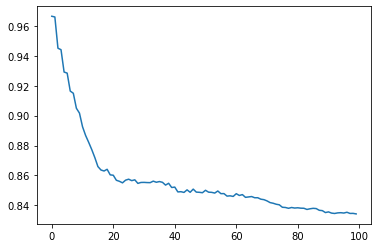

In [588]:
knn_f1s = {}

for i in range(1, 101):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn_f1 = cross_val_score(knn, X, y, scoring = 'f1', cv = k)
    knn_f1s[i] = np.mean(knn_f1)

print(min(knn_f1s))
print(knn_f1s[min(knn_f1s)])

plt.plot(list(knn_f1s.values()))

1
0.9651870391500115


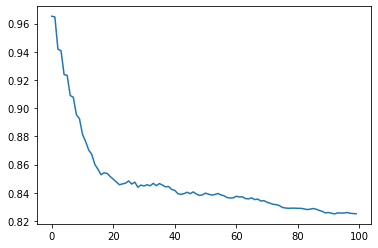

In [589]:
knn_accuracys = {}

for i in range(1, 101):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn_accuracy = cross_val_score(knn, X, y, scoring = 'accuracy', cv = k)
    knn_accuracys[i] = np.mean(knn_accuracy)

print(min(knn_accuracys))
print(knn_accuracys[min(knn_accuracys)])

plt.plot(list(knn_accuracys.values()))

1
0.9502350931461188


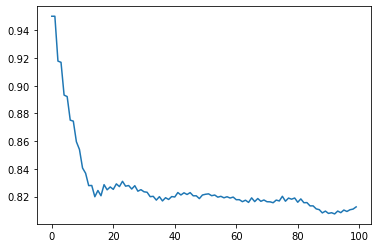

In [590]:
knn_scaled_f1s = {}

for i in range(1, 101):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn_f1 = cross_val_score(knn, X_scaled, y, scoring = 'f1', cv = k)
    knn_scaled_f1s[i] = np.mean(knn_f1)
    
print(min(knn_scaled_f1s))
print(knn_scaled_f1s[min(knn_scaled_f1s)])

plt.plot(list(knn_scaled_f1s.values()))

1
0.9475960653686186


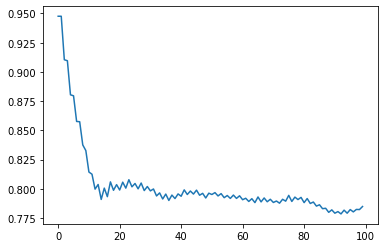

In [591]:
knn_scaled_accuracys = {}

for i in range(1, 101):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn_accuracy = cross_val_score(knn, X_scaled, y, scoring = 'accuracy', cv = k)
    knn_scaled_accuracys[i] = np.mean(knn_accuracy)
    
print(min(knn_scaled_accuracys))
print(knn_scaled_accuracys[min(knn_scaled_accuracys)])

plt.plot(list(knn_scaled_accuracys.values()))

In [262]:
from sklearn.tree import DecisionTreeClassifier

In [555]:
tree = DecisionTreeClassifier(random_state=0)

tree_f1 = cross_val_score(tree, X, y, scoring = 'f1', cv = k)

np.mean(tree_f1)

0.97032623976458

In [556]:
tree = DecisionTreeClassifier(random_state=0)

tree_accuracy = cross_val_score(tree, X, y, scoring = 'accuracy', cv = k)

np.mean(tree_accuracy)

0.9694009410234704

In [265]:
from sklearn.ensemble import RandomForestClassifier

In [560]:
forest = RandomForestClassifier(random_state=69420)

forest_f1 = cross_val_score(forest, X, y, scoring = 'f1', cv = k)

np.mean(forest_f1)

0.9845304929626144

In [561]:
forest = RandomForestClassifier(random_state=69420)

forest_accuracy = cross_val_score(forest, X, y, scoring = 'accuracy', cv = k)

np.mean(forest_accuracy)

0.9842668421117204

In [420]:
#random forest hyperparameter tuning
forest_params = {'bootstrap': [True, False],
 'max_depth': [10, 25, None],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 200]}

In [421]:
forest_grid = GridSearchCV(forest, forest_params, cv=k, verbose = 3)

forest_grid.fit(X,y)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits
[CV] bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.950, total=   2.2s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


[CV]  bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.950, total=   2.4s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.5s remaining:    0.0s


[CV]  bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.939, total=   2.6s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.953, total=   2.6s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.968, total=   2.7s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.965, total=   2.6s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.957, total=   2.7s
[CV] bootstrap

[CV]  bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.948, total=   2.4s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.953, total=   2.5s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.937, total=   2.5s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.958, total=   2.2s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.962, total=   2.2s
[CV] 

[CV]  bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200, score=0.960, total=   4.8s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200, score=0.960, total=   4.7s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100, score=0.948, total=   2.5s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100, score=0.952, total=   2.4s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100, score=0.937, total=   2.4s
[CV] bootstrap

[CV]  bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200, score=0.952, total=   6.1s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200, score=0.941, total=   5.8s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200, score=0.958, total=   5.7s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200, score=0.962, total=   5.5s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.946, total=   2.4s
[CV] bo

[CV]  bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200, score=0.963, total=   5.5s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200, score=0.967, total=   5.1s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200, score=0.948, total=   5.2s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200, score=0.942, total=   5.2s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200, score=0.957, total=   5.1s
[CV] bootstrap

[CV]  bootstrap=True, max_depth=25, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.975, total=   7.1s
[CV] bootstrap=True, max_depth=25, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=25, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.983, total=   7.1s
[CV] bootstrap=True, max_depth=25, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=25, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.989, total=   6.9s
[CV] bootstrap=True, max_depth=25, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=25, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.986, total=   6.7s
[CV] bootstrap=True, max_depth=25, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=25, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.981, total=   7.0s
[CV] bootstrap

[CV]  bootstrap=True, max_depth=25, min_samples_leaf=1, min_samples_split=10, n_estimators=200, score=0.984, total=  55.4s
[CV] bootstrap=True, max_depth=25, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=25, min_samples_leaf=1, min_samples_split=10, n_estimators=200, score=0.976, total=   6.6s
[CV] bootstrap=True, max_depth=25, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=25, min_samples_leaf=1, min_samples_split=10, n_estimators=200, score=0.970, total=   6.9s
[CV] bootstrap=True, max_depth=25, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=25, min_samples_leaf=1, min_samples_split=10, n_estimators=200, score=0.981, total=   6.8s
[CV] bootstrap=True, max_depth=25, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=25, min_samples_leaf=1, min_samples_split=10, n_estimators=200, score=0.989, total=   6.2s
[CV] 

[CV]  bootstrap=True, max_depth=25, min_samples_leaf=2, min_samples_split=5, n_estimators=100, score=0.980, total=   3.2s
[CV] bootstrap=True, max_depth=25, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=True, max_depth=25, min_samples_leaf=2, min_samples_split=5, n_estimators=100, score=0.985, total=   3.3s
[CV] bootstrap=True, max_depth=25, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=25, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=0.981, total=   7.0s
[CV] bootstrap=True, max_depth=25, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=25, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=0.975, total=   6.8s
[CV] bootstrap=True, max_depth=25, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=25, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=0.971, total=   6.7s
[CV] bootstrap

[CV]  bootstrap=True, max_depth=25, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.975, total=   3.2s
[CV] bootstrap=True, max_depth=25, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=True, max_depth=25, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.970, total=   3.2s
[CV] bootstrap=True, max_depth=25, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=True, max_depth=25, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.976, total=   3.2s
[CV] bootstrap=True, max_depth=25, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=True, max_depth=25, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.976, total=   3.2s
[CV] bootstrap=True, max_depth=25, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=25, min_samples_leaf=4, min_samples_split=2, n_estimators=200, score=0.975, total=   6.2s
[CV] bootstrap

[CV]  bootstrap=True, max_depth=25, min_samples_leaf=4, min_samples_split=10, n_estimators=100, score=0.985, total=   3.1s
[CV] bootstrap=True, max_depth=25, min_samples_leaf=4, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=25, min_samples_leaf=4, min_samples_split=10, n_estimators=100, score=0.983, total=   3.1s
[CV] bootstrap=True, max_depth=25, min_samples_leaf=4, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=25, min_samples_leaf=4, min_samples_split=10, n_estimators=100, score=0.973, total=   3.2s
[CV] bootstrap=True, max_depth=25, min_samples_leaf=4, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=25, min_samples_leaf=4, min_samples_split=10, n_estimators=100, score=0.968, total=   3.2s
[CV] bootstrap=True, max_depth=25, min_samples_leaf=4, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=25, min_samples_leaf=4, min_samples_split=10, n_estimators=100, score=0.978, total=   3.1s
[CV] 

[CV]  bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.975, total=   4.0s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.986, total=   4.1s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.990, total=   3.9s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.989, total=   4.2s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.981, total=   3

[CV]  bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100, score=0.980, total=   3.1s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100, score=0.975, total=   2.7s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100, score=0.970, total=   3.1s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100, score=0.984, total=   2.9s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100, score=0.989, total=   2

[CV]  bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=0.980, total=   6.2s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=0.985, total=   6.3s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100, score=0.979, total=   3.0s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100, score=0.975, total=   2.8s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100, score=0.968, tota

[CV]  bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=200, score=0.976, total=   6.2s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=200, score=0.975, total=   6.3s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=200, score=0.976, total=   4.9s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=200, score=0.978, total=   4.3s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=100, score=0.974, total=   2

[CV]  bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=200, score=0.983, total=   6.5s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=200, score=0.984, total=   6.4s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=200, score=0.973, total=   6.5s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=200, score=0.973, total=   6.5s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=200, score=0.975, t

[CV]  bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=0.941, total=   6.8s
[CV] bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=0.962, total=   6.9s
[CV] bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=0.968, total=   7.3s
[CV] bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=0.965, total=   6.6s
[CV] bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=0.957, total=   7.2s
[CV] 

[CV]  bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200, score=0.957, total=   6.8s
[CV] bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200, score=0.953, total=   7.1s
[CV] bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200, score=0.939, total=   7.2s
[CV] bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200, score=0.960, total=   7.0s
[CV] bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200, score=0.969, total=   7.3s
[CV] 

[CV]  bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100, score=0.958, total=   3.3s
[CV] bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100, score=0.959, total=   3.1s
[CV] bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200, score=0.949, total=   6.4s
[CV] bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200, score=0.953, total=   7.3s
[CV] bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200, score=0.941, total=   7

[CV]  bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100, score=0.950, total=   3.6s
[CV] bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100, score=0.949, total=   3.5s
[CV] bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100, score=0.962, total=   3.2s
[CV] bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100, score=0.962, total=   3.4s
[CV] bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200, score=0.950, total=   7.1s
[CV] 

[CV]  bootstrap=False, max_depth=25, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.993, total=   4.8s
[CV] bootstrap=False, max_depth=25, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=False, max_depth=25, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.989, total=   4.8s
[CV] bootstrap=False, max_depth=25, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=False, max_depth=25, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.985, total=   4.9s
[CV] bootstrap=False, max_depth=25, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=False, max_depth=25, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.986, total=   4.8s
[CV] bootstrap=False, max_depth=25, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=False, max_depth=25, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.981, total=   4.7s
[CV] 

[CV]  bootstrap=False, max_depth=25, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.981, total=   4.3s
[CV] bootstrap=False, max_depth=25, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=False, max_depth=25, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.984, total=   4.5s
[CV] bootstrap=False, max_depth=25, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=False, max_depth=25, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.993, total=   4.6s
[CV] bootstrap=False, max_depth=25, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=False, max_depth=25, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.990, total=   4.8s
[CV] bootstrap=False, max_depth=25, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=False, max_depth=25, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.985, total=   4

[CV]  bootstrap=False, max_depth=25, min_samples_leaf=2, min_samples_split=5, n_estimators=100, score=0.989, total=   4.8s
[CV] bootstrap=False, max_depth=25, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=False, max_depth=25, min_samples_leaf=2, min_samples_split=5, n_estimators=100, score=0.986, total=   4.8s
[CV] bootstrap=False, max_depth=25, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=False, max_depth=25, min_samples_leaf=2, min_samples_split=5, n_estimators=100, score=0.984, total=   4.5s
[CV] bootstrap=False, max_depth=25, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=False, max_depth=25, min_samples_leaf=2, min_samples_split=5, n_estimators=100, score=0.985, total=   5.1s
[CV] bootstrap=False, max_depth=25, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=False, max_depth=25, min_samples_leaf=2, min_samples_split=5, n_estimators=100, score=0.990, total=   4.9s
[CV] 

[CV]  bootstrap=False, max_depth=25, min_samples_leaf=2, min_samples_split=10, n_estimators=200, score=0.981, total=   7.9s
[CV] bootstrap=False, max_depth=25, min_samples_leaf=2, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=False, max_depth=25, min_samples_leaf=2, min_samples_split=10, n_estimators=200, score=0.990, total=   8.6s
[CV] bootstrap=False, max_depth=25, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=False, max_depth=25, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.989, total=   4.0s
[CV] bootstrap=False, max_depth=25, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=False, max_depth=25, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.979, total=   4.1s
[CV] bootstrap=False, max_depth=25, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=False, max_depth=25, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.975, total=   4.2s
[C

[CV]  bootstrap=False, max_depth=25, min_samples_leaf=4, min_samples_split=5, n_estimators=200, score=0.984, total=   8.4s
[CV] bootstrap=False, max_depth=25, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=False, max_depth=25, min_samples_leaf=4, min_samples_split=5, n_estimators=200, score=0.981, total=   7.9s
[CV] bootstrap=False, max_depth=25, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=False, max_depth=25, min_samples_leaf=4, min_samples_split=5, n_estimators=200, score=0.981, total=   8.5s
[CV] bootstrap=False, max_depth=25, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=False, max_depth=25, min_samples_leaf=4, min_samples_split=5, n_estimators=200, score=0.989, total=   8.1s
[CV] bootstrap=False, max_depth=25, min_samples_leaf=4, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=False, max_depth=25, min_samples_leaf=4, min_samples_split=10, n_estimators=100, score=0.988, total=   4.1s
[CV

[CV]  bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.994, total=   9.9s
[CV] bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.993, total=   9.4s
[CV] bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.993, total=   9.8s
[CV] bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.990, total=   8.4s
[CV] bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.985, t

[CV]  bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200, score=0.986, total=   9.2s
[CV] bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200, score=0.985, total=   9.9s
[CV] bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200, score=0.989, total=  10.3s
[CV] bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200, score=0.994, total=   9.6s
[CV] bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200, score

[CV]  bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100, score=0.983, total=   5.1s
[CV] bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100, score=0.998, total=   4.9s
[CV] bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=0.990, total=   9.7s
[CV] bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=0.986, total=   9.2s
[CV] bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=0.980, t

[CV]  bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.986, total=   4.1s
[CV] bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.981, total=   4.0s
[CV] bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.983, total=   3.8s
[CV] bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.981, total=   4.3s
[CV] bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.989, t

[CV]  bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100, score=0.976, total=   4.2s
[CV] bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100, score=0.984, total=   3.9s
[CV] bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100, score=0.990, total=   4.2s
[CV] bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100, score=0.988, total=   3.8s
[CV] bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100, score

[Parallel(n_jobs=1)]: Done 1080 out of 1080 | elapsed: 97.7min finished


GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 25, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200]},
             verbose=3)

In [422]:
forest_grid.best_params_

{'bootstrap': False,
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [563]:
forest = RandomForestClassifier(n_estimators = 200, max_depth = None, min_samples_leaf = 1, min_samples_split = 2, random_state = 69420, bootstrap = False)

forest_f1 = cross_val_score(forest, X, y, scoring = 'f1', cv = k)

np.mean(forest_f1)

0.9905580984333081

In [562]:
forest = RandomForestClassifier(n_estimators = 200, max_depth = None, min_samples_leaf = 1, min_samples_split = 2, random_state = 69420, bootstrap = False)

forest_accuracy = cross_val_score(forest, X, y, scoring = 'accuracy', cv = k)

np.mean(forest_accuracy)

0.9904609420049812

In [269]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [564]:
lda = LinearDiscriminantAnalysis()

lda_f1 = cross_val_score(lda, X, y, scoring = 'f1', cv = k)

np.mean(lda_f1)

0.71271807174851

In [565]:
lda = LinearDiscriminantAnalysis()

lda_accuracy = cross_val_score(lda, X, y, scoring = 'accuracy', cv = k)

np.mean(lda_accuracy)

0.7446714699350976

In [570]:
qda = QuadraticDiscriminantAnalysis()

qda_f1 = cross_val_score(qda, X.drop("Race_1", axis = 1), y, scoring = 'f1', cv = k)

np.mean(qda_f1)

0.7566272668015094

In [571]:
qda = QuadraticDiscriminantAnalysis()

qda_accuracy = cross_val_score(qda, X.drop("Race_1", axis = 1), y, scoring = 'accuracy', cv = k)

np.mean(qda_accuracy)

0.7205161826591582

In [271]:
from sklearn.svm import SVC

In [572]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [296]:
svc = SVC()

#svm hyperparameter tuning
param_grid = {'C': [0.1,1,10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

svc_grid = GridSearchCV(svc, param_grid, cv=k, verbose = 3)

svc_grid.fit(X_scaled,y)

In [321]:
svc_grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [573]:
svc = SVC(C = 10, gamma = 1)

svc_f1 = cross_val_score(svc, X_scaled, y, scoring = 'f1', cv = k)

np.mean(svc_f1)

0.9972839359595757

In [574]:
svc = SVC(C = 10, gamma = 1)

svc_accuracy = cross_val_score(svc, X_scaled, y, scoring = 'accuracy', cv = k)

np.mean(svc_accuracy)

0.997274620584735

In [575]:
svc = SVC(C = 10, gamma = 1)

svc_f1 = cross_val_score(svc, X, y, scoring = 'f1', cv = k)

np.mean(svc_f1)

1.0

In [576]:
svc = SVC(C = 10, gamma = 1)

svc_accuracy = cross_val_score(svc, X, y, scoring = 'accuracy', cv = k)

np.mean(svc_accuracy)

1.0

In [278]:
from sklearn.neural_network import MLPClassifier

In [577]:
perceptron = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10, 10), random_state = 69420, activation = "logistic")

In [578]:
perceptron_f1 = cross_val_score(perceptron, X, y, scoring = 'f1', cv = k)

np.mean(perceptron_f1)

C:\Users\Mick4\Anaconda3\envs\data2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Mick4\Anaconda3\envs\data2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Mick4\Anaconda3\envs\data2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (

0.7929463953043105

In [579]:
perceptron_accuracy = cross_val_score(perceptron, X, y, scoring = 'accuracy', cv = k)

np.mean(perceptron_accuracy)

C:\Users\Mick4\Anaconda3\envs\data2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Mick4\Anaconda3\envs\data2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Mick4\Anaconda3\envs\data2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (

0.7863019433913652

In [301]:
import xgboost

In [338]:
max_depth = [3,6,9]
eta = [0.01, 0.05, 0.1, 0.2, 0.3]
objective = 'binary:logistic'


In [340]:
xgb_f1s = []
xgb_params = {"max_depth": max_depth, "eta": eta}

In [341]:
xgb = xgboost.XGBClassifier(verbosity = 3)
xgb_grid = GridSearchCV(xgb, xgb_params, cv=k, verbose = 3)
xgb_grid.fit(X,y)

Fitting 10 folds for each of 15 candidates, totalling 150 fits
[CV] eta=0.01, max_depth=3 ...........................................
[14:24:26] DEBUG: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\gbm\gbtree.cc:147: Using tree method: 2
[14:24:26] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:26] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:26] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:26] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:26] INFO: C:\Users\Administrator\workspace\xgboost-win64

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



[14:24:26] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:26] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:26] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:26] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:26] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:26] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 prune

[14:24:27] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:27] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:27] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:27] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:27] ======== Monitor: Learner ========
[14:24:27] Configure: 0.01024s, 1 calls @ 10240us

[14:24:27] GetGradient: 0.024364s, 100 calls @ 24364us

[14:24:27] PredictRaw: 0.047971s, 100 calls @ 47971us

[14:24:27] UpdateOneIter: 0.480311s, 100 calls @ 480311us

[14:24:27] ======== Monitor: GBTree ========
[14:24:2

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s



[14:24:27] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:27] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:27] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:27] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:27] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:27] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 prune

[14:24:27] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:27] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:27] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:27] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:27] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:27] ======== Monitor: Learner ========
[14:24:27] Configure: 0.000556s, 1 calls @ 556us

[14:24:27] GetGradient: 0.024208s, 100 calls @ 24208us

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s



[14:24:27] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:27] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:27] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:27] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:27] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:27] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 prune

[14:24:28] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:28] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:28] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:28] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:28] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:28] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned

[14:24:28] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:28] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:28] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:28] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:28] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:28] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned

[14:24:28] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:28] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:28] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:28] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:28] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:28] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned

[14:24:29] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:29] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:29] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:29] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:29] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:29] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned

[14:24:29] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:29] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:29] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:29] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:29] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:29] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned

[14:24:30] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:30] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:30] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:30] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:30] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:30] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned

[14:24:30] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:30] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:30] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:30] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:30] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:30] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned

[14:24:30] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:30] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:30] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:30] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:30] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:30] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned

[14:24:31] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:31] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:31] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:31] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:31] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:31] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned

[14:24:31] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:31] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:31] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:31] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:31] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:31] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned

[14:24:31] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:31] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:31] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:31] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:31] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:31] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned

[14:24:32] DEBUG: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\gbm\gbtree.cc:147: Using tree method: 2
[14:24:32] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=6
[14:24:32] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=6
[14:24:32] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=6
[14:24:32] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 84 extra nodes, 0 pruned nodes, max_depth=6
[14:24:32] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 86 extra nodes, 0 pruned nodes, max_depth=6
[14:24:32] INFO: C:\Users\A

[14:24:32] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 92 extra nodes, 0 pruned nodes, max_depth=6
[14:24:32] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 90 extra nodes, 0 pruned nodes, max_depth=6
[14:24:32] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 90 extra nodes, 0 pruned nodes, max_depth=6
[14:24:32] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 90 extra nodes, 0 pruned nodes, max_depth=6
[14:24:32] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 86 extra nodes, 0 pruned nodes, max_depth=6
[14:24:32] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 100 extra nodes, 0 prune

[14:24:33] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=6
[14:24:33] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 86 extra nodes, 0 pruned nodes, max_depth=6
[14:24:33] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 82 extra nodes, 0 pruned nodes, max_depth=6
[14:24:33] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 82 extra nodes, 0 pruned nodes, max_depth=6
[14:24:33] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 84 extra nodes, 0 pruned nodes, max_depth=6
[14:24:33] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 82 extra nodes, 0 pruned

[14:24:33] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 94 extra nodes, 0 pruned nodes, max_depth=6
[14:24:33] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=6
[14:24:34] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=6
[14:24:34] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 90 extra nodes, 0 pruned nodes, max_depth=6
[14:24:34] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 98 extra nodes, 0 pruned nodes, max_depth=6
[14:24:34] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 90 extra nodes, 0 pruned

[14:24:34] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 84 extra nodes, 0 pruned nodes, max_depth=6
[14:24:34] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 82 extra nodes, 0 pruned nodes, max_depth=6
[14:24:34] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=6
[14:24:34] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 84 extra nodes, 0 pruned nodes, max_depth=6
[14:24:34] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=6
[14:24:34] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 86 extra nodes, 0 pruned

[14:24:35] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 84 extra nodes, 0 pruned nodes, max_depth=6
[14:24:35] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 94 extra nodes, 0 pruned nodes, max_depth=6
[14:24:35] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=6
[14:24:35] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 82 extra nodes, 0 pruned nodes, max_depth=6
[14:24:35] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 82 extra nodes, 0 pruned nodes, max_depth=6
[14:24:35] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 84 extra nodes, 0 pruned

[14:24:35] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=6
[14:24:35] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 94 extra nodes, 0 pruned nodes, max_depth=6
[14:24:35] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 84 extra nodes, 0 pruned nodes, max_depth=6
[14:24:35] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=6
[14:24:35] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 92 extra nodes, 0 pruned nodes, max_depth=6
[14:24:35] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 86 extra nodes, 0 pruned

[14:24:36] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 80 extra nodes, 0 pruned nodes, max_depth=6
[14:24:36] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=6
[14:24:36] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 84 extra nodes, 0 pruned nodes, max_depth=6
[14:24:36] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 86 extra nodes, 0 pruned nodes, max_depth=6
[14:24:36] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=6
[14:24:36] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 86 extra nodes, 0 pruned

[14:24:36] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=6
[14:24:36] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=6
[14:24:36] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=6
[14:24:36] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 86 extra nodes, 0 pruned nodes, max_depth=6
[14:24:36] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 90 extra nodes, 0 pruned nodes, max_depth=6
[14:24:36] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned

[14:24:37] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 94 extra nodes, 0 pruned nodes, max_depth=6
[14:24:37] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=6
[14:24:37] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=6
[14:24:37] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 92 extra nodes, 0 pruned nodes, max_depth=6
[14:24:37] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 92 extra nodes, 0 pruned nodes, max_depth=6
[14:24:37] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 86 extra nodes, 0 pruned

[14:24:37] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 96 extra nodes, 0 pruned nodes, max_depth=6
[14:24:37] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 84 extra nodes, 0 pruned nodes, max_depth=6
[14:24:37] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 90 extra nodes, 0 pruned nodes, max_depth=6
[14:24:37] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 90 extra nodes, 0 pruned nodes, max_depth=6
[14:24:37] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 92 extra nodes, 0 pruned nodes, max_depth=6
[14:24:37] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 92 extra nodes, 0 pruned

[14:24:38] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 90 extra nodes, 0 pruned nodes, max_depth=6
[14:24:38] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 92 extra nodes, 0 pruned nodes, max_depth=6
[14:24:38] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 82 extra nodes, 0 pruned nodes, max_depth=6
[14:24:38] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 72 extra nodes, 0 pruned nodes, max_depth=6
[14:24:38] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 78 extra nodes, 0 pruned nodes, max_depth=6
[14:24:38] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 94 extra nodes, 0 pruned

[14:24:39] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 90 extra nodes, 0 pruned nodes, max_depth=6
[14:24:39] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 84 extra nodes, 0 pruned nodes, max_depth=6
[14:24:39] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 94 extra nodes, 0 pruned nodes, max_depth=6
[14:24:39] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 86 extra nodes, 0 pruned nodes, max_depth=6
[14:24:39] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=6
[14:24:39] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 90 extra nodes, 0 pruned

[14:24:39] DEBUG: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\gbm\gbtree.cc:147: Using tree method: 2
[14:24:39] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=6
[14:24:39] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=6
[14:24:39] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=6
[14:24:39] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 84 extra nodes, 0 pruned nodes, max_depth=6
[14:24:39] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 84 extra nodes, 0 pruned nodes, max_depth=6
[14:24:39] INFO: C:\Users\A

[14:24:40] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 82 extra nodes, 0 pruned nodes, max_depth=6
[14:24:40] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=6
[14:24:40] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 86 extra nodes, 0 pruned nodes, max_depth=6
[14:24:40] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 84 extra nodes, 0 pruned nodes, max_depth=6
[14:24:40] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 82 extra nodes, 0 pruned nodes, max_depth=6
[14:24:40] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 82 extra nodes, 0 pruned

[14:24:40] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 92 extra nodes, 0 pruned nodes, max_depth=6
[14:24:40] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 84 extra nodes, 0 pruned nodes, max_depth=6
[14:24:40] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 90 extra nodes, 0 pruned nodes, max_depth=6
[14:24:40] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 82 extra nodes, 0 pruned nodes, max_depth=6
[14:24:40] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=6
[14:24:40] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned

[14:24:41] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 86 extra nodes, 0 pruned nodes, max_depth=6
[14:24:41] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 94 extra nodes, 0 pruned nodes, max_depth=6
[14:24:41] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 90 extra nodes, 0 pruned nodes, max_depth=6
[14:24:41] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 86 extra nodes, 0 pruned nodes, max_depth=6
[14:24:41] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=6
[14:24:41] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 82 extra nodes, 0 pruned

[14:24:41] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 82 extra nodes, 0 pruned nodes, max_depth=6
[14:24:41] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 82 extra nodes, 0 pruned nodes, max_depth=6
[14:24:41] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 84 extra nodes, 0 pruned nodes, max_depth=6
[14:24:41] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 84 extra nodes, 0 pruned nodes, max_depth=6
[14:24:41] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 84 extra nodes, 0 pruned nodes, max_depth=6
[14:24:41] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 86 extra nodes, 0 pruned

[14:24:42] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 94 extra nodes, 0 pruned nodes, max_depth=6
[14:24:42] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 90 extra nodes, 0 pruned nodes, max_depth=6
[14:24:42] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 82 extra nodes, 0 pruned nodes, max_depth=6
[14:24:42] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 86 extra nodes, 0 pruned nodes, max_depth=6
[14:24:42] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 92 extra nodes, 0 pruned nodes, max_depth=6
[14:24:42] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned

[14:24:43] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 196 extra nodes, 0 pruned nodes, max_depth=9
[14:24:43] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 178 extra nodes, 0 pruned nodes, max_depth=9
[14:24:43] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 202 extra nodes, 0 pruned nodes, max_depth=9
[14:24:43] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 188 extra nodes, 0 pruned nodes, max_depth=9
[14:24:43] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 198 extra nodes, 0 pruned nodes, max_depth=9
[14:24:43] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 176 extra nodes, 0 

[14:24:43] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 206 extra nodes, 0 pruned nodes, max_depth=9
[14:24:43] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 198 extra nodes, 0 pruned nodes, max_depth=9
[14:24:43] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 208 extra nodes, 0 pruned nodes, max_depth=9
[14:24:43] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 210 extra nodes, 0 pruned nodes, max_depth=9
[14:24:43] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 212 extra nodes, 0 pruned nodes, max_depth=9
[14:24:43] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 196 extra nodes, 0 

[14:24:44] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 212 extra nodes, 0 pruned nodes, max_depth=9
[14:24:44] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 176 extra nodes, 0 pruned nodes, max_depth=9
[14:24:44] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 190 extra nodes, 0 pruned nodes, max_depth=9
[14:24:44] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 202 extra nodes, 0 pruned nodes, max_depth=9
[14:24:44] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 184 extra nodes, 0 pruned nodes, max_depth=9
[14:24:44] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 206 extra nodes, 0 

[14:24:45] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 236 extra nodes, 0 pruned nodes, max_depth=9
[14:24:45] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 210 extra nodes, 0 pruned nodes, max_depth=9
[14:24:45] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 196 extra nodes, 0 pruned nodes, max_depth=9
[14:24:45] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 214 extra nodes, 0 pruned nodes, max_depth=9
[14:24:45] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 204 extra nodes, 0 pruned nodes, max_depth=9
[14:24:45] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 218 extra nodes, 0 

[14:24:46] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 188 extra nodes, 0 pruned nodes, max_depth=9
[14:24:46] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 198 extra nodes, 0 pruned nodes, max_depth=9
[14:24:46] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 198 extra nodes, 0 pruned nodes, max_depth=9
[14:24:46] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 186 extra nodes, 0 pruned nodes, max_depth=9
[14:24:46] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 188 extra nodes, 0 pruned nodes, max_depth=9
[14:24:46] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 176 extra nodes, 0 

[14:24:46] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 208 extra nodes, 0 pruned nodes, max_depth=9
[14:24:46] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 190 extra nodes, 0 pruned nodes, max_depth=9
[14:24:46] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 208 extra nodes, 0 pruned nodes, max_depth=9
[14:24:46] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 198 extra nodes, 0 pruned nodes, max_depth=9
[14:24:46] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 206 extra nodes, 0 pruned nodes, max_depth=9
[14:24:46] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 206 extra nodes, 0 

[14:24:47] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 176 extra nodes, 0 pruned nodes, max_depth=9
[14:24:47] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 192 extra nodes, 0 pruned nodes, max_depth=9
[14:24:47] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 202 extra nodes, 0 pruned nodes, max_depth=9
[14:24:47] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 172 extra nodes, 0 pruned nodes, max_depth=9
[14:24:47] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 196 extra nodes, 0 pruned nodes, max_depth=9
[14:24:47] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 194 extra nodes, 0 

[14:24:48] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 192 extra nodes, 0 pruned nodes, max_depth=9
[14:24:48] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 184 extra nodes, 0 pruned nodes, max_depth=9
[14:24:48] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 208 extra nodes, 0 pruned nodes, max_depth=9
[14:24:48] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 200 extra nodes, 0 pruned nodes, max_depth=9
[14:24:48] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 182 extra nodes, 0 pruned nodes, max_depth=9
[14:24:48] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 188 extra nodes, 0 

[14:24:49] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 178 extra nodes, 0 pruned nodes, max_depth=9
[14:24:49] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 184 extra nodes, 0 pruned nodes, max_depth=9
[14:24:49] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 184 extra nodes, 0 pruned nodes, max_depth=9
[14:24:49] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 174 extra nodes, 0 pruned nodes, max_depth=9
[14:24:49] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 176 extra nodes, 0 pruned nodes, max_depth=9
[14:24:49] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 180 extra nodes, 0 

[14:24:49] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 224 extra nodes, 0 pruned nodes, max_depth=9
[14:24:49] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 212 extra nodes, 0 pruned nodes, max_depth=9
[14:24:49] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 194 extra nodes, 0 pruned nodes, max_depth=9
[14:24:49] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 212 extra nodes, 0 pruned nodes, max_depth=9
[14:24:49] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 220 extra nodes, 0 pruned nodes, max_depth=9
[14:24:49] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 228 extra nodes, 0 

[14:24:50] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 188 extra nodes, 0 pruned nodes, max_depth=9
[14:24:50] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 202 extra nodes, 0 pruned nodes, max_depth=9
[14:24:50] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 190 extra nodes, 0 pruned nodes, max_depth=9
[14:24:50] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 188 extra nodes, 0 pruned nodes, max_depth=9
[14:24:50] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 196 extra nodes, 0 pruned nodes, max_depth=9
[14:24:50] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 174 extra nodes, 0 

[14:24:51] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 196 extra nodes, 0 pruned nodes, max_depth=9
[14:24:51] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 196 extra nodes, 0 pruned nodes, max_depth=9
[14:24:51] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 204 extra nodes, 0 pruned nodes, max_depth=9
[14:24:51] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 204 extra nodes, 0 pruned nodes, max_depth=9
[14:24:51] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 194 extra nodes, 0 pruned nodes, max_depth=9
[14:24:51] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 190 extra nodes, 0 

[14:24:52] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 190 extra nodes, 0 pruned nodes, max_depth=9
[14:24:52] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 190 extra nodes, 0 pruned nodes, max_depth=9
[14:24:52] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 196 extra nodes, 0 pruned nodes, max_depth=9
[14:24:52] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 200 extra nodes, 0 pruned nodes, max_depth=9
[14:24:52] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 182 extra nodes, 0 pruned nodes, max_depth=9
[14:24:52] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 192 extra nodes, 0 

[14:24:52] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 224 extra nodes, 0 pruned nodes, max_depth=9
[14:24:52] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 208 extra nodes, 0 pruned nodes, max_depth=9
[14:24:52] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 178 extra nodes, 0 pruned nodes, max_depth=9
[14:24:52] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 210 extra nodes, 0 pruned nodes, max_depth=9
[14:24:52] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 208 extra nodes, 0 pruned nodes, max_depth=9
[14:24:52] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 174 extra nodes, 0 

[14:24:53] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 188 extra nodes, 0 pruned nodes, max_depth=9
[14:24:53] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 190 extra nodes, 0 pruned nodes, max_depth=9
[14:24:53] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 188 extra nodes, 0 pruned nodes, max_depth=9
[14:24:53] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 190 extra nodes, 0 pruned nodes, max_depth=9
[14:24:53] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 192 extra nodes, 0 pruned nodes, max_depth=9
[14:24:53] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 190 extra nodes, 0 

[14:24:54] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 188 extra nodes, 0 pruned nodes, max_depth=9
[14:24:54] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 206 extra nodes, 0 pruned nodes, max_depth=9
[14:24:54] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 190 extra nodes, 0 pruned nodes, max_depth=9
[14:24:54] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 204 extra nodes, 0 pruned nodes, max_depth=9
[14:24:54] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 196 extra nodes, 0 pruned nodes, max_depth=9
[14:24:54] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 204 extra nodes, 0 

[14:24:55] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 184 extra nodes, 0 pruned nodes, max_depth=9
[14:24:55] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 198 extra nodes, 0 pruned nodes, max_depth=9
[14:24:55] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 198 extra nodes, 0 pruned nodes, max_depth=9
[14:24:55] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 196 extra nodes, 0 pruned nodes, max_depth=9
[14:24:55] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 198 extra nodes, 0 pruned nodes, max_depth=9
[14:24:56] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 204 extra nodes, 0 

[14:24:56] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 194 extra nodes, 0 pruned nodes, max_depth=9
[14:24:56] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 192 extra nodes, 0 pruned nodes, max_depth=9
[14:24:56] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 204 extra nodes, 0 pruned nodes, max_depth=9
[14:24:56] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 214 extra nodes, 0 pruned nodes, max_depth=9
[14:24:56] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 192 extra nodes, 0 pruned nodes, max_depth=9
[14:24:56] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 194 extra nodes, 0 

[14:24:57] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 204 extra nodes, 0 pruned nodes, max_depth=9
[14:24:57] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 182 extra nodes, 0 pruned nodes, max_depth=9
[14:24:57] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 220 extra nodes, 0 pruned nodes, max_depth=9
[14:24:57] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 190 extra nodes, 0 pruned nodes, max_depth=9
[14:24:57] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 204 extra nodes, 0 pruned nodes, max_depth=9
[14:24:57] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 204 extra nodes, 0 

[14:24:58] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:58] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:58] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:58] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:58] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:58] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned 

[14:24:58] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:58] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:58] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:58] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:58] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:58] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned

[14:24:59] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[14:24:59] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[14:24:59] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[14:24:59] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[14:24:59] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[14:24:59] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nod

[14:24:59] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:59] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:59] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:59] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:59] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:59] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned

[14:24:59] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:59] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:59] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=3
[14:24:59] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[14:24:59] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:24:59] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned n

[14:25:00] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:25:00] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[14:25:00] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:25:00] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:25:00] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:25:00] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned

[14:25:00] DEBUG: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\gbm\gbtree.cc:147: Using tree method: 2
[14:25:00] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:25:00] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:25:00] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:25:00] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:25:00] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:25:00] INFO: C:\Users\A

[14:25:00] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:25:01] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:25:01] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[14:25:01] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[14:25:01] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:25:01] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned no

[14:25:01] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:25:01] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:25:01] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:25:01] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:25:01] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:25:01] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned

[14:25:01] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:25:01] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:25:01] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[14:25:01] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=3
[14:25:01] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[14:25:01] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned no

[14:25:02] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:25:02] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:25:02] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:25:02] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[14:25:02] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:25:02] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned

[14:25:02] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[14:25:02] ======== Monitor: Learner ========
[14:25:02] Configure: 0.000578s, 1 calls @ 578us

[14:25:02] GetGradient: 0.025152s, 100 calls @ 25152us

[14:25:02] PredictRaw: 0.052237s, 100 calls @ 52237us

[14:25:02] UpdateOneIter: 0.566679s, 100 calls @ 566679us

[14:25:02] ======== Monitor: GBTree ========
[14:25:02] BoostNewTrees: 0.484995s, 100 calls @ 484995us

[14:25:02] CommitModel: 0.000221s, 100 calls @ 221us

[CV] ............... eta=0.05, max_depth=3, score=0.882, total=   0.6s
[14:25:02] ======== Monitor: Learner ========
[14:25:02] Configure: 0.0005s, 1 calls @ 500us

[14:25:02] ======== Monitor: GBTree ========
[CV] eta=0.05, max_depth=3 ...........................................
[14:25:02] DEBUG: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\gbm\gbtree.cc:147: Using tree method: 2
[1

[14:25:02] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:25:02] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:25:02] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[14:25:02] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:25:02] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:25:02] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned n

[14:25:03] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:25:03] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:25:03] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:25:03] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:25:03] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:25:03] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned

[14:25:03] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=3
[14:25:03] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[14:25:03] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:25:03] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:25:03] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=3
[14:25:03] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned no

[14:25:03] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:25:04] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[14:25:04] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:25:04] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:25:04] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:25:04] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned

[14:25:04] DEBUG: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\gbm\gbtree.cc:147: Using tree method: 2
[14:25:04] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=6
[14:25:04] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 86 extra nodes, 0 pruned nodes, max_depth=6
[14:25:04] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 90 extra nodes, 0 pruned nodes, max_depth=6
[14:25:04] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 92 extra nodes, 0 pruned nodes, max_depth=6
[14:25:04] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 94 extra nodes, 0 pruned nodes, max_depth=6
[14:25:04] INFO: C:\Users\A

[14:25:04] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=6
[14:25:04] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=6
[14:25:04] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=6
[14:25:04] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=6
[14:25:04] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 64 extra nodes, 0 pruned nodes, max_depth=6
[14:25:04] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 34 extra nodes, 0 pruned

[14:25:05] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 90 extra nodes, 0 pruned nodes, max_depth=6
[14:25:05] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 92 extra nodes, 0 pruned nodes, max_depth=6
[14:25:05] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 90 extra nodes, 0 pruned nodes, max_depth=6
[14:25:05] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 92 extra nodes, 0 pruned nodes, max_depth=6
[14:25:05] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 90 extra nodes, 0 pruned nodes, max_depth=6
[14:25:05] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned

[14:25:06] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=6
[14:25:06] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=6
[14:25:06] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 66 extra nodes, 0 pruned nodes, max_depth=6
[14:25:06] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 16 extra nodes, 0 pruned nodes, max_depth=6
[14:25:06] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=6
[14:25:06] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 26 extra nodes, 0 pruned

[14:25:06] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 86 extra nodes, 0 pruned nodes, max_depth=6
[14:25:06] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 80 extra nodes, 0 pruned nodes, max_depth=6
[14:25:06] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 84 extra nodes, 0 pruned nodes, max_depth=6
[14:25:06] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 84 extra nodes, 0 pruned nodes, max_depth=6
[14:25:06] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 86 extra nodes, 0 pruned nodes, max_depth=6
[14:25:06] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 86 extra nodes, 0 pruned

[14:25:07] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=6
[14:25:07] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=6
[14:25:07] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 58 extra nodes, 0 pruned nodes, max_depth=6
[14:25:07] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=6
[14:25:07] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=6
[14:25:07] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 34 extra nodes, 0 pruned

[14:25:07] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 98 extra nodes, 0 pruned nodes, max_depth=6
[14:25:07] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=6
[14:25:07] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 82 extra nodes, 0 pruned nodes, max_depth=6
[14:25:07] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 90 extra nodes, 0 pruned nodes, max_depth=6
[14:25:07] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 92 extra nodes, 0 pruned nodes, max_depth=6
[14:25:07] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned

[14:25:08] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=6
[14:25:08] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=6
[14:25:08] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 78 extra nodes, 0 pruned nodes, max_depth=6
[14:25:08] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=6
[14:25:08] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=6
[14:25:08] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 64 extra nodes, 0 pruned

[14:25:08] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=6
[14:25:08] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 96 extra nodes, 0 pruned nodes, max_depth=6
[14:25:08] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 96 extra nodes, 0 pruned nodes, max_depth=6
[14:25:08] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 98 extra nodes, 0 pruned nodes, max_depth=6
[14:25:08] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 82 extra nodes, 0 pruned nodes, max_depth=6
[14:25:08] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 92 extra nodes, 0 pruned

[14:25:09] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 82 extra nodes, 0 pruned nodes, max_depth=6
[14:25:09] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=6
[14:25:09] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 68 extra nodes, 0 pruned nodes, max_depth=6
[14:25:09] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 68 extra nodes, 0 pruned nodes, max_depth=6
[14:25:09] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=6
[14:25:09] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 28 extra nodes, 0 pruned

[14:25:10] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 96 extra nodes, 0 pruned nodes, max_depth=6
[14:25:10] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 96 extra nodes, 0 pruned nodes, max_depth=6
[14:25:10] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 96 extra nodes, 0 pruned nodes, max_depth=6
[14:25:10] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 80 extra nodes, 0 pruned nodes, max_depth=6
[14:25:10] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 98 extra nodes, 0 pruned nodes, max_depth=6
[14:25:10] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 94 extra nodes, 0 pruned

[14:25:10] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 58 extra nodes, 0 pruned nodes, max_depth=6
[14:25:10] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=6
[14:25:10] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=6
[14:25:10] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6
[14:25:10] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=6
[14:25:10] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 80 extra nodes, 0 pruned

[14:25:11] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 84 extra nodes, 0 pruned nodes, max_depth=6
[14:25:11] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 92 extra nodes, 0 pruned nodes, max_depth=6
[14:25:11] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 84 extra nodes, 0 pruned nodes, max_depth=6
[14:25:11] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 94 extra nodes, 0 pruned nodes, max_depth=6
[14:25:11] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 90 extra nodes, 0 pruned nodes, max_depth=6
[14:25:11] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 92 extra nodes, 0 pruned

[14:25:11] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=6
[14:25:11] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=6
[14:25:11] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 70 extra nodes, 0 pruned nodes, max_depth=6
[14:25:11] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=6
[14:25:11] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=6
[14:25:11] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 72 extra nodes, 0 pruned

[14:25:12] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 86 extra nodes, 0 pruned nodes, max_depth=6
[14:25:12] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 96 extra nodes, 0 pruned nodes, max_depth=6
[14:25:12] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=6
[14:25:12] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 96 extra nodes, 0 pruned nodes, max_depth=6
[14:25:12] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 90 extra nodes, 0 pruned nodes, max_depth=6
[14:25:12] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned

[14:25:12] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 68 extra nodes, 0 pruned nodes, max_depth=6
[14:25:12] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 72 extra nodes, 0 pruned nodes, max_depth=6
[14:25:12] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=6
[14:25:12] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=6
[14:25:12] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 70 extra nodes, 0 pruned nodes, max_depth=6
[14:25:12] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 70 extra nodes, 0 pruned

[14:25:13] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=6
[14:25:14] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 80 extra nodes, 0 pruned nodes, max_depth=6
[14:25:14] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 74 extra nodes, 0 pruned nodes, max_depth=6
[14:25:14] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=6
[14:25:14] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 72 extra nodes, 0 pruned nodes, max_depth=6
[14:25:14] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 54 extra nodes, 0 pruned

[14:25:14] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=6
[14:25:14] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 78 extra nodes, 0 pruned nodes, max_depth=6
[14:25:14] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 82 extra nodes, 0 pruned nodes, max_depth=6
[14:25:14] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 98 extra nodes, 0 pruned nodes, max_depth=6
[14:25:14] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 90 extra nodes, 0 pruned nodes, max_depth=6
[14:25:14] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 84 extra nodes, 0 pruned

[14:25:15] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=6
[14:25:15] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 64 extra nodes, 0 pruned nodes, max_depth=6
[14:25:15] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=6
[14:25:15] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=6
[14:25:15] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 66 extra nodes, 0 pruned nodes, max_depth=6
[14:25:15] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 30 extra nodes, 0 pruned

[14:25:15] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 236 extra nodes, 0 pruned nodes, max_depth=9
[14:25:15] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 210 extra nodes, 0 pruned nodes, max_depth=9
[14:25:15] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 236 extra nodes, 0 pruned nodes, max_depth=9
[14:25:15] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 232 extra nodes, 0 pruned nodes, max_depth=9
[14:25:15] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 216 extra nodes, 0 pruned nodes, max_depth=9
[14:25:16] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 244 extra nodes, 0 

[14:25:16] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 128 extra nodes, 0 pruned nodes, max_depth=9
[14:25:16] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 114 extra nodes, 0 pruned nodes, max_depth=9
[14:25:16] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 130 extra nodes, 0 pruned nodes, max_depth=9
[14:25:16] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 104 extra nodes, 0 pruned nodes, max_depth=9
[14:25:16] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 126 extra nodes, 0 pruned nodes, max_depth=9
[14:25:16] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 124 extra nodes, 0 

[14:25:17] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 206 extra nodes, 0 pruned nodes, max_depth=9
[14:25:17] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 192 extra nodes, 0 pruned nodes, max_depth=9
[14:25:17] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 192 extra nodes, 0 pruned nodes, max_depth=9
[14:25:17] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 202 extra nodes, 0 pruned nodes, max_depth=9
[14:25:17] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 162 extra nodes, 0 pruned nodes, max_depth=9
[14:25:17] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 216 extra nodes, 0 

[14:25:18] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 118 extra nodes, 0 pruned nodes, max_depth=9
[14:25:18] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 104 extra nodes, 0 pruned nodes, max_depth=9
[14:25:18] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 72 extra nodes, 0 pruned nodes, max_depth=9
[14:25:18] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=9
[14:25:18] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 100 extra nodes, 0 pruned nodes, max_depth=9
[14:25:18] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 94 extra nodes, 0 pru

[14:25:19] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 208 extra nodes, 0 pruned nodes, max_depth=9
[14:25:19] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 218 extra nodes, 0 pruned nodes, max_depth=9
[14:25:19] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 180 extra nodes, 0 pruned nodes, max_depth=9
[14:25:19] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 222 extra nodes, 0 pruned nodes, max_depth=9
[14:25:19] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 198 extra nodes, 0 pruned nodes, max_depth=9
[14:25:19] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 194 extra nodes, 0 

[14:25:20] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 118 extra nodes, 0 pruned nodes, max_depth=9
[14:25:20] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 76 extra nodes, 0 pruned nodes, max_depth=9
[14:25:20] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 122 extra nodes, 0 pruned nodes, max_depth=9
[14:25:20] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 142 extra nodes, 0 pruned nodes, max_depth=9
[14:25:20] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 122 extra nodes, 0 pruned nodes, max_depth=9
[14:25:20] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 124 extra nodes, 0 p

[14:25:20] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 210 extra nodes, 0 pruned nodes, max_depth=9
[14:25:20] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 212 extra nodes, 0 pruned nodes, max_depth=9
[14:25:20] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 212 extra nodes, 0 pruned nodes, max_depth=9
[14:25:20] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 194 extra nodes, 0 pruned nodes, max_depth=9
[14:25:20] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 212 extra nodes, 0 pruned nodes, max_depth=9
[14:25:20] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 222 extra nodes, 0 

[14:25:21] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 98 extra nodes, 0 pruned nodes, max_depth=9
[14:25:21] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 128 extra nodes, 0 pruned nodes, max_depth=9
[14:25:21] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 114 extra nodes, 0 pruned nodes, max_depth=9
[14:25:21] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 132 extra nodes, 0 pruned nodes, max_depth=9
[14:25:21] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 102 extra nodes, 0 pruned nodes, max_depth=9
[14:25:21] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 102 extra nodes, 0 p

[14:25:22] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 190 extra nodes, 0 pruned nodes, max_depth=9
[14:25:22] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 194 extra nodes, 0 pruned nodes, max_depth=9
[14:25:22] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 218 extra nodes, 0 pruned nodes, max_depth=9
[14:25:22] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 204 extra nodes, 0 pruned nodes, max_depth=9
[14:25:22] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 220 extra nodes, 0 pruned nodes, max_depth=9
[14:25:22] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 212 extra nodes, 0 

[14:25:23] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 128 extra nodes, 0 pruned nodes, max_depth=9
[14:25:23] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 108 extra nodes, 0 pruned nodes, max_depth=9
[14:25:23] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 80 extra nodes, 0 pruned nodes, max_depth=9
[14:25:23] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=9
[14:25:23] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 74 extra nodes, 0 pruned nodes, max_depth=9
[14:25:23] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 96 extra nodes, 0 prun

[14:25:23] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 198 extra nodes, 0 pruned nodes, max_depth=9
[14:25:23] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 206 extra nodes, 0 pruned nodes, max_depth=9
[14:25:24] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 216 extra nodes, 0 pruned nodes, max_depth=9
[14:25:24] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 212 extra nodes, 0 pruned nodes, max_depth=9
[14:25:24] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 206 extra nodes, 0 pruned nodes, max_depth=9
[14:25:24] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 198 extra nodes, 0 

[14:25:24] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 104 extra nodes, 0 pruned nodes, max_depth=9
[14:25:24] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 84 extra nodes, 0 pruned nodes, max_depth=9
[14:25:24] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 110 extra nodes, 0 pruned nodes, max_depth=9
[14:25:24] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 110 extra nodes, 0 pruned nodes, max_depth=9
[14:25:24] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 84 extra nodes, 0 pruned nodes, max_depth=9
[14:25:24] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 82 extra nodes, 0 pru

[14:25:25] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 212 extra nodes, 0 pruned nodes, max_depth=9
[14:25:25] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 180 extra nodes, 0 pruned nodes, max_depth=9
[14:25:25] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 206 extra nodes, 0 pruned nodes, max_depth=9
[14:25:25] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 188 extra nodes, 0 pruned nodes, max_depth=9
[14:25:25] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 228 extra nodes, 0 pruned nodes, max_depth=9
[14:25:25] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 212 extra nodes, 0 

[14:25:26] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 148 extra nodes, 0 pruned nodes, max_depth=9
[14:25:26] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 148 extra nodes, 0 pruned nodes, max_depth=9
[14:25:26] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 146 extra nodes, 0 pruned nodes, max_depth=9
[14:25:26] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 144 extra nodes, 0 pruned nodes, max_depth=9
[14:25:26] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 100 extra nodes, 0 pruned nodes, max_depth=9
[14:25:26] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 118 extra nodes, 0 

[14:25:27] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 170 extra nodes, 0 pruned nodes, max_depth=9
[14:25:27] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 172 extra nodes, 0 pruned nodes, max_depth=9
[14:25:27] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 168 extra nodes, 0 pruned nodes, max_depth=9
[14:25:27] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 146 extra nodes, 0 pruned nodes, max_depth=9
[14:25:27] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 164 extra nodes, 0 pruned nodes, max_depth=9
[14:25:27] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 164 extra nodes, 0 

[14:25:28] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 202 extra nodes, 0 pruned nodes, max_depth=9
[14:25:28] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 210 extra nodes, 0 pruned nodes, max_depth=9
[14:25:28] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 214 extra nodes, 0 pruned nodes, max_depth=9
[14:25:28] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 192 extra nodes, 0 pruned nodes, max_depth=9
[14:25:28] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 218 extra nodes, 0 pruned nodes, max_depth=9
[14:25:28] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 204 extra nodes, 0 

[14:25:29] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 158 extra nodes, 0 pruned nodes, max_depth=9
[14:25:29] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 154 extra nodes, 0 pruned nodes, max_depth=9
[14:25:29] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 144 extra nodes, 0 pruned nodes, max_depth=9
[14:25:29] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 152 extra nodes, 0 pruned nodes, max_depth=9
[14:25:29] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 138 extra nodes, 0 pruned nodes, max_depth=9
[14:25:29] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 140 extra nodes, 0 

[14:25:30] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 218 extra nodes, 0 pruned nodes, max_depth=9
[14:25:30] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 196 extra nodes, 0 pruned nodes, max_depth=9
[14:25:30] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 200 extra nodes, 0 pruned nodes, max_depth=9
[14:25:30] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 190 extra nodes, 0 pruned nodes, max_depth=9
[14:25:30] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 196 extra nodes, 0 pruned nodes, max_depth=9
[14:25:30] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 180 extra nodes, 0 

[14:25:30] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 158 extra nodes, 0 pruned nodes, max_depth=9
[14:25:30] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 178 extra nodes, 0 pruned nodes, max_depth=9
[14:25:30] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 148 extra nodes, 0 pruned nodes, max_depth=9
[14:25:31] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 158 extra nodes, 0 pruned nodes, max_depth=9
[14:25:31] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 144 extra nodes, 0 pruned nodes, max_depth=9
[14:25:31] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 132 extra nodes, 0 

[14:25:31] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[14:25:31] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:25:31] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[14:25:31] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[14:25:31] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[14:25:31] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nod

[14:25:32] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[14:25:32] ======== Monitor: Learner ========
[14:25:32] Configure: 0.000867s, 1 calls @ 867us

[14:25:32] GetGradient: 0.0258s, 100 calls @ 25800us

[14:25:32] PredictRaw: 0.050491s, 100 calls @ 50491us

[14:25:32] UpdateOneIter: 0.574055s, 100 calls @ 574055us

[14:25:32] ======== Monitor: GBTree ========
[14:25:32] BoostNewTrees: 0.493159s, 100 calls @ 493159us

[14:25:32] CommitModel: 0.000158s, 100 calls @ 158us

[CV] ................ eta=0.1, max_depth=3, score=0.928, total=   0.6s
[14:25:32] ======== Monitor: Learner ========
[14:25:32] Configure: 0.000539s, 1 calls @ 539us

[14:25:32] ======== Monitor: GBTree ========
[CV] eta=0.1, max_depth=3 ............................................
[14:25:32] DEBUG: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\gbm\gbtree.cc:147: Using tree method: 2
[1

[14:25:32] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:25:32] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[14:25:32] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:25:32] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[14:25:32] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[14:25:32] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 10 extra nodes, 0 pruned n

[14:25:32] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:25:32] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:25:32] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:25:32] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:25:32] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:25:32] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned

[14:25:33] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:25:33] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[14:25:33] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[14:25:33] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:25:33] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:25:33] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 10 extra nodes, 0 pruned

[14:25:33] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:25:33] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:25:33] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:25:33] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:25:33] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 10 extra nodes, 0 pruned nodes, max_depth=3
[14:25:33] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 10 extra nodes, 0 pruned

[14:25:33] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:25:33] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[14:25:33] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:25:33] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:25:33] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[14:25:34] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned

[14:25:34] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[14:25:34] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:25:34] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[14:25:34] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[14:25:34] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:25:34] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned no

[14:25:34] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:25:34] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:25:34] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:25:34] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:25:34] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:25:34] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned

[14:25:35] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:25:35] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:25:35] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[14:25:35] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[14:25:35] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[14:25:35] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned 

[14:25:35] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:25:35] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:25:35] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[14:25:35] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[14:25:35] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:25:35] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned n

[14:25:35] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:25:35] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[14:25:35] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[14:25:35] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[14:25:35] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:25:35] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned 

[14:25:36] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[14:25:36] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:25:36] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:25:36] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[14:25:36] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[14:25:36] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nod

[14:25:36] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:25:36] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:25:36] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:25:36] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:25:36] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:25:36] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned

[14:25:36] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:25:36] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[14:25:36] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[14:25:37] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[14:25:37] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[14:25:37] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned n

[14:25:37] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:25:37] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:25:37] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:25:37] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:25:37] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[14:25:37] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned 

[14:25:37] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:25:37] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[14:25:37] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[14:25:37] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[14:25:37] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 10 extra nodes, 0 pruned nodes, max_depth=3
[14:25:37] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned no

[14:25:38] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=6
[14:25:38] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=6
[14:25:38] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=6
[14:25:38] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=6
[14:25:38] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=6
[14:25:38] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 20 extra nodes, 0 pruned

[14:25:38] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=6
[14:25:38] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 70 extra nodes, 0 pruned nodes, max_depth=6
[14:25:38] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 70 extra nodes, 0 pruned nodes, max_depth=6
[14:25:38] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=6
[14:25:38] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=6
[14:25:38] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 44 extra nodes, 0 pruned

[14:25:39] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 80 extra nodes, 0 pruned nodes, max_depth=6
[14:25:39] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=6
[14:25:39] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=6
[14:25:39] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=6
[14:25:39] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 64 extra nodes, 0 pruned nodes, max_depth=6
[14:25:39] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 26 extra nodes, 0 pruned

[14:25:39] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 66 extra nodes, 0 pruned nodes, max_depth=6
[14:25:39] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 78 extra nodes, 0 pruned nodes, max_depth=6
[14:25:39] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 74 extra nodes, 0 pruned nodes, max_depth=6
[14:25:40] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 64 extra nodes, 0 pruned nodes, max_depth=6
[14:25:40] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 68 extra nodes, 0 pruned nodes, max_depth=6
[14:25:40] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 54 extra nodes, 0 pruned

[14:25:40] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=6
[14:25:40] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=6
[14:25:40] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 68 extra nodes, 0 pruned nodes, max_depth=6
[14:25:40] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=6
[14:25:40] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=6
[14:25:40] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 48 extra nodes, 0 pruned

[14:25:41] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 70 extra nodes, 0 pruned nodes, max_depth=6
[14:25:41] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=6
[14:25:41] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=6
[14:25:41] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=6
[14:25:41] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=6
[14:25:41] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 52 extra nodes, 0 pruned

[14:25:41] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 68 extra nodes, 0 pruned nodes, max_depth=6
[14:25:41] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=6
[14:25:41] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=6
[14:25:41] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=6
[14:25:41] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=6
[14:25:41] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 68 extra nodes, 0 pruned

[14:25:42] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=6
[14:25:42] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 82 extra nodes, 0 pruned nodes, max_depth=6
[14:25:42] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 68 extra nodes, 0 pruned nodes, max_depth=6
[14:25:42] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 84 extra nodes, 0 pruned nodes, max_depth=6
[14:25:42] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=6
[14:25:42] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 86 extra nodes, 0 pruned

[14:25:42] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=6
[14:25:42] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 68 extra nodes, 0 pruned nodes, max_depth=6
[14:25:42] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=6
[14:25:42] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=6
[14:25:42] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=6
[14:25:42] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 20 extra nodes, 0 pruned

[14:25:43] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6
[14:25:43] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 74 extra nodes, 0 pruned nodes, max_depth=6
[14:25:43] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 96 extra nodes, 0 pruned nodes, max_depth=6
[14:25:43] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=6
[14:25:43] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 76 extra nodes, 0 pruned nodes, max_depth=6
[14:25:43] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 72 extra nodes, 0 pruned

[14:25:43] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 58 extra nodes, 0 pruned nodes, max_depth=6
[14:25:43] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 74 extra nodes, 0 pruned nodes, max_depth=6
[14:25:43] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=6
[14:25:43] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 78 extra nodes, 0 pruned nodes, max_depth=6
[14:25:43] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=6
[14:25:43] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 62 extra nodes, 0 pruned

[14:25:44] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=6
[14:25:44] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 92 extra nodes, 0 pruned nodes, max_depth=6
[14:25:44] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=6
[14:25:44] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=6
[14:25:44] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=6
[14:25:44] ======== Monitor: Learner ========
[14:25:44] Configure: 0.000411s, 1 calls @ 411us

[14:25:44] GetGradient: 0.02673s, 100 calls @ 26730us


[14:25:45] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 68 extra nodes, 0 pruned nodes, max_depth=6
[14:25:45] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6
[14:25:45] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6
[14:25:45] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 58 extra nodes, 0 pruned nodes, max_depth=6
[14:25:45] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 68 extra nodes, 0 pruned nodes, max_depth=6
[14:25:45] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 32 extra nodes, 0 pruned

[14:25:45] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=6
[14:25:45] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 72 extra nodes, 0 pruned nodes, max_depth=6
[14:25:45] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 78 extra nodes, 0 pruned nodes, max_depth=6
[14:25:45] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6
[14:25:45] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 70 extra nodes, 0 pruned nodes, max_depth=6
[14:25:45] ======== Monitor: Learner ========
[14:25:45] Configure: 0.000885s, 1 calls @ 885us

[14:25:45] GetGradient: 0.025647s, 100 calls @ 25647us

[14:25:46] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=6
[14:25:46] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=6
[14:25:46] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 82 extra nodes, 0 pruned nodes, max_depth=6
[14:25:46] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=6
[14:25:46] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 68 extra nodes, 0 pruned nodes, max_depth=6
[14:25:46] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 26 extra nodes, 0 pruned

[14:25:46] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=6
[14:25:46] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 78 extra nodes, 0 pruned nodes, max_depth=6
[14:25:46] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=6
[14:25:46] ======== Monitor: Learner ========
[14:25:46] Configure: 0.000897s, 1 calls @ 897us

[14:25:46] GetGradient: 0.025514s, 100 calls @ 25514us

[14:25:46] PredictRaw: 0.055271s, 100 calls @ 55271us

[14:25:46] UpdateOneIter: 1.0582s, 100 calls @ 1058199us

[14:25:46] ======== Monitor: GBTree ========
[14:25:46] BoostNewTrees: 0.973198s, 100 calls @ 973198us

[14:25:46] CommitModel: 0.000189s, 100 calls @ 189us

[CV] ................ eta=0.1, max_depth=6, score=0.967, total=   1

[14:25:47] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 66 extra nodes, 0 pruned nodes, max_depth=6
[14:25:47] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 64 extra nodes, 0 pruned nodes, max_depth=6
[14:25:47] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=6
[14:25:47] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 80 extra nodes, 0 pruned nodes, max_depth=6
[14:25:47] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=6
[14:25:47] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 56 extra nodes, 0 pruned

[14:25:47] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 74 extra nodes, 0 pruned nodes, max_depth=6
[14:25:47] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=6
[14:25:47] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 76 extra nodes, 0 pruned nodes, max_depth=6
[14:25:47] ======== Monitor: Learner ========
[14:25:47] Configure: 0.000537s, 1 calls @ 537us

[14:25:47] GetGradient: 0.026488s, 100 calls @ 26488us

[14:25:47] PredictRaw: 0.060078s, 100 calls @ 60078us

[14:25:47] UpdateOneIter: 1.07824s, 100 calls @ 1078239us

[14:25:47] ======== Monitor: GBTree ========
[14:25:47] BoostNewTrees: 0.987015s, 100 calls @ 987015us

[14:25:47] CommitModel: 0.000181s, 100 calls @ 181us

[CV] ................ eta=0.1, max_depth=6, score=0.973, total=   

[14:25:48] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6
[14:25:48] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=6
[14:25:48] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=6
[14:25:48] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 84 extra nodes, 0 pruned nodes, max_depth=6
[14:25:48] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=6
[14:25:48] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 40 extra nodes, 0 pruned

[14:25:48] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=6
[14:25:48] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=6
[14:25:49] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=6
[14:25:49] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 58 extra nodes, 0 pruned nodes, max_depth=6
[14:25:49] ======== Monitor: Learner ========
[14:25:49] Configure: 0.000647s, 1 calls @ 647us

[14:25:49] GetGradient: 0.026717s, 100 calls @ 26717us

[14:25:49] PredictRaw: 0.056611s, 100 calls @ 56611us

[14:25:49] UpdateOneIter: 1.05351s, 100 calls @ 1053509us

[14:25:49] ======== Monitor: GBTree ========
[14:25:49

[14:25:49] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 72 extra nodes, 0 pruned nodes, max_depth=9
[14:25:49] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 82 extra nodes, 0 pruned nodes, max_depth=9
[14:25:49] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=9
[14:25:49] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 86 extra nodes, 0 pruned nodes, max_depth=9
[14:25:49] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=9
[14:25:49] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 132 extra nodes, 0 prune

[14:25:50] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 92 extra nodes, 0 pruned nodes, max_depth=9
[14:25:50] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=9
[14:25:50] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 92 extra nodes, 0 pruned nodes, max_depth=9
[14:25:50] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 64 extra nodes, 0 pruned nodes, max_depth=9
[14:25:50] ======== Monitor: Learner ========
[14:25:50] Configure: 0.000425s, 1 calls @ 425us

[14:25:50] GetGradient: 0.027771s, 100 calls @ 27771us

[14:25:50] PredictRaw: 0.06248s, 100 calls @ 62480us

[14:25:50] UpdateOneIter: 1.45993s, 100 calls @ 1459927us

[14:25:50] ======== Monitor: GBTree ========
[14:25:50]

[14:25:51] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 78 extra nodes, 0 pruned nodes, max_depth=9
[14:25:52] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 74 extra nodes, 0 pruned nodes, max_depth=9
[14:25:52] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 72 extra nodes, 0 pruned nodes, max_depth=9
[14:25:52] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 66 extra nodes, 0 pruned nodes, max_depth=9
[14:25:52] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 86 extra nodes, 0 pruned nodes, max_depth=9
[14:25:52] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 72 extra nodes, 0 pruned

[14:25:52] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 98 extra nodes, 0 pruned nodes, max_depth=9
[14:25:52] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 134 extra nodes, 0 pruned nodes, max_depth=9
[14:25:52] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 148 extra nodes, 0 pruned nodes, max_depth=9
[14:25:52] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 132 extra nodes, 0 pruned nodes, max_depth=9
[14:25:52] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 130 extra nodes, 0 pruned nodes, max_depth=9
[14:25:52] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 150 extra nodes, 0 p

[14:25:53] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=9
[14:25:53] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 82 extra nodes, 0 pruned nodes, max_depth=9
[14:25:53] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=9
[14:25:53] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=9
[14:25:53] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 68 extra nodes, 0 pruned nodes, max_depth=9
[14:25:53] ======== Monitor: Learner ========
[14:25:53] Configure: 0.000443s, 1 calls @ 443us

[14:25:53] GetGradient: 0.026273s, 100 calls @ 26273us

[14:25:54] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 126 extra nodes, 0 pruned nodes, max_depth=9
[14:25:54] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 136 extra nodes, 0 pruned nodes, max_depth=9
[14:25:54] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 100 extra nodes, 0 pruned nodes, max_depth=9
[14:25:54] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 116 extra nodes, 0 pruned nodes, max_depth=9
[14:25:54] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 144 extra nodes, 0 pruned nodes, max_depth=9
[14:25:54] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 108 extra nodes, 0 

[14:25:55] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=9
[14:25:55] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 76 extra nodes, 0 pruned nodes, max_depth=9
[14:25:55] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 80 extra nodes, 0 pruned nodes, max_depth=9
[14:25:55] ======== Monitor: Learner ========
[14:25:55] Configure: 0.000582s, 1 calls @ 582us

[14:25:55] GetGradient: 0.027889s, 100 calls @ 27889us

[14:25:55] PredictRaw: 0.063878s, 100 calls @ 63878us

[14:25:55] UpdateOneIter: 1.43024s, 100 calls @ 1430242us

[14:25:55] ======== Monitor: GBTree ========
[14:25:55] BoostNewTrees: 1.33404s, 100 calls @ 1334036us

[14:25:55] CommitModel: 0.000182s, 100 calls @ 182us

[CV] ................ eta=0.1, max_depth=9, score=0.983, total=   

[14:25:55] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 118 extra nodes, 0 pruned nodes, max_depth=9
[14:25:55] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 118 extra nodes, 0 pruned nodes, max_depth=9
[14:25:55] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 130 extra nodes, 0 pruned nodes, max_depth=9
[14:25:55] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 80 extra nodes, 0 pruned nodes, max_depth=9
[14:25:55] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 124 extra nodes, 0 pruned nodes, max_depth=9
[14:25:55] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 126 extra nodes, 0 p

[CV] ................ eta=0.1, max_depth=9, score=0.986, total=   1.5s
[14:25:56] ======== Monitor: Learner ========
[14:25:56] Configure: 0.000559s, 1 calls @ 559us

[14:25:56] ======== Monitor: GBTree ========
[CV] eta=0.1, max_depth=9 ............................................
[14:25:56] DEBUG: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\gbm\gbtree.cc:147: Using tree method: 2
[14:25:56] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 176 extra nodes, 0 pruned nodes, max_depth=9
[14:25:56] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 178 extra nodes, 0 pruned nodes, max_depth=9
[14:25:56] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 190 extra nodes, 0 pruned nodes, max_depth=9
[14:25:56] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src

[14:25:57] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 72 extra nodes, 0 pruned nodes, max_depth=9
[14:25:57] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 74 extra nodes, 0 pruned nodes, max_depth=9
[14:25:57] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 110 extra nodes, 0 pruned nodes, max_depth=9
[14:25:57] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 122 extra nodes, 0 pruned nodes, max_depth=9
[14:25:57] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 96 extra nodes, 0 pruned nodes, max_depth=9
[14:25:57] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 130 extra nodes, 0 pru

[14:25:58] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 86 extra nodes, 0 pruned nodes, max_depth=9
[14:25:58] ======== Monitor: Learner ========
[14:25:58] Configure: 0.000488s, 1 calls @ 488us

[14:25:58] GetGradient: 0.026068s, 100 calls @ 26068us

[14:25:58] PredictRaw: 0.063053s, 100 calls @ 63053us

[14:25:58] UpdateOneIter: 1.4685s, 100 calls @ 1468495us

[14:25:58] ======== Monitor: GBTree ========
[14:25:58] BoostNewTrees: 1.37531s, 100 calls @ 1375314us

[14:25:58] CommitModel: 0.000188s, 100 calls @ 188us

[CV] ................ eta=0.1, max_depth=9, score=0.985, total=   1.5s
[14:25:58] ======== Monitor: Learner ========
[14:25:58] Configure: 0.000601s, 1 calls @ 601us

[14:25:58] ======== Monitor: GBTree ========
[CV] eta=0.1, max_depth=9 ............................................
[14:25:58] DEBUG: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\gbm\gbtree.cc:147: Using tree method: 2
[

[14:25:58] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 96 extra nodes, 0 pruned nodes, max_depth=9
[14:25:58] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 100 extra nodes, 0 pruned nodes, max_depth=9
[14:25:58] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 122 extra nodes, 0 pruned nodes, max_depth=9
[14:25:58] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 122 extra nodes, 0 pruned nodes, max_depth=9
[14:25:58] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 124 extra nodes, 0 pruned nodes, max_depth=9
[14:25:58] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 134 extra nodes, 0 p

[14:25:59] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 70 extra nodes, 0 pruned nodes, max_depth=9
[14:25:59] ======== Monitor: Learner ========
[14:25:59] Configure: 0.000419s, 1 calls @ 419us

[14:25:59] GetGradient: 0.025652s, 100 calls @ 25652us

[14:25:59] PredictRaw: 0.062342s, 100 calls @ 62342us

[14:25:59] UpdateOneIter: 1.43925s, 100 calls @ 1439245us

[14:25:59] ======== Monitor: GBTree ========
[14:25:59] BoostNewTrees: 1.34701s, 100 calls @ 1347013us

[14:25:59] CommitModel: 0.000183s, 100 calls @ 183us

[CV] ................ eta=0.1, max_depth=9, score=0.978, total=   1.5s
[14:25:59] ======== Monitor: Learner ========
[14:25:59] Configure: 0.000534s, 1 calls @ 534us

[14:25:59] ======== Monitor: GBTree ========
[CV] eta=0.1, max_depth=9 ............................................
[14:25:59] DEBUG: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\gbm\gbtree.cc:147: Using tree method: 2


[14:26:00] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 96 extra nodes, 0 pruned nodes, max_depth=9
[14:26:00] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 82 extra nodes, 0 pruned nodes, max_depth=9
[14:26:00] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 76 extra nodes, 0 pruned nodes, max_depth=9
[14:26:00] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 100 extra nodes, 0 pruned nodes, max_depth=9
[14:26:00] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 110 extra nodes, 0 pruned nodes, max_depth=9
[14:26:00] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 70 extra nodes, 0 prun

[14:26:01] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=9
[14:26:01] ======== Monitor: Learner ========
[14:26:01] Configure: 0.000466s, 1 calls @ 466us

[14:26:01] GetGradient: 0.025609s, 100 calls @ 25609us

[14:26:01] PredictRaw: 0.061202s, 100 calls @ 61202us

[14:26:01] UpdateOneIter: 1.44738s, 100 calls @ 1447385us

[14:26:01] ======== Monitor: GBTree ========
[14:26:01] BoostNewTrees: 1.35656s, 100 calls @ 1356558us

[14:26:01] CommitModel: 0.000295s, 100 calls @ 295us

[CV] ................ eta=0.1, max_depth=9, score=0.973, total=   1.5s
[14:26:01] ======== Monitor: Learner ========
[14:26:01] Configure: 0.000638s, 1 calls @ 638us

[14:26:01] ======== Monitor: GBTree ========
[CV] eta=0.1, max_depth=9 ............................................
[14:26:01] DEBUG: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\gbm\gbtree.cc:147: Using tree method: 2


[14:26:01] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 138 extra nodes, 0 pruned nodes, max_depth=9
[14:26:01] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 94 extra nodes, 0 pruned nodes, max_depth=9
[14:26:01] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 104 extra nodes, 0 pruned nodes, max_depth=9
[14:26:01] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 116 extra nodes, 0 pruned nodes, max_depth=9
[14:26:01] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=9
[14:26:01] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 114 extra nodes, 0 pr

[14:26:02] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 84 extra nodes, 0 pruned nodes, max_depth=9
[14:26:02] ======== Monitor: Learner ========
[14:26:02] Configure: 0.000445s, 1 calls @ 445us

[14:26:02] GetGradient: 0.025785s, 100 calls @ 25785us

[14:26:02] PredictRaw: 0.061742s, 100 calls @ 61742us

[14:26:02] UpdateOneIter: 1.4455s, 100 calls @ 1445498us

[14:26:02] ======== Monitor: GBTree ========
[14:26:02] BoostNewTrees: 1.35399s, 100 calls @ 1353986us

[14:26:02] CommitModel: 0.00018s, 100 calls @ 180us

[CV] ................ eta=0.1, max_depth=9, score=0.975, total=   1.5s
[14:26:02] ======== Monitor: Learner ========
[14:26:02] Configure: 0.000557s, 1 calls @ 557us

[14:26:02] ======== Monitor: GBTree ========
[CV] eta=0.1, max_depth=9 ............................................
[14:26:02] DEBUG: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\gbm\gbtree.cc:147: Using tree method: 2
[1

[14:26:03] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 118 extra nodes, 0 pruned nodes, max_depth=9
[14:26:03] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 86 extra nodes, 0 pruned nodes, max_depth=9
[14:26:03] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 78 extra nodes, 0 pruned nodes, max_depth=9
[14:26:03] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 82 extra nodes, 0 pruned nodes, max_depth=9
[14:26:03] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 134 extra nodes, 0 pruned nodes, max_depth=9
[14:26:03] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 118 extra nodes, 0 pru

[14:26:04] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=9
[14:26:04] ======== Monitor: Learner ========
[14:26:04] Configure: 0.000446s, 1 calls @ 446us

[14:26:04] GetGradient: 0.027314s, 100 calls @ 27314us

[14:26:04] PredictRaw: 0.063576s, 100 calls @ 63576us

[14:26:04] UpdateOneIter: 1.4654s, 100 calls @ 1465397us

[14:26:04] ======== Monitor: GBTree ========
[14:26:04] BoostNewTrees: 1.37028s, 100 calls @ 1370283us

[14:26:04] CommitModel: 0.000182s, 100 calls @ 182us

[CV] ................ eta=0.1, max_depth=9, score=0.976, total=   1.5s
[14:26:04] ======== Monitor: Learner ========
[14:26:04] Configure: 0.000592s, 1 calls @ 592us

[14:26:04] ======== Monitor: GBTree ========
[CV] eta=0.2, max_depth=3 ............................................
[14:26:04] DEBUG: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\gbm\gbtree.cc:147: Using tree method: 2
[

[14:26:04] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:04] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:04] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:04] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:04] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:04] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 10 extra nodes, 0 pruned

[14:26:04] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:04] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:04] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[14:26:04] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[14:26:04] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:04] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned

[14:26:05] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:05] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:05] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:05] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[14:26:05] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[14:26:05] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned

[14:26:05] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 10 extra nodes, 0 pruned nodes, max_depth=3
[14:26:05] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[14:26:05] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:05] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[14:26:05] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:05] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 10 extra nodes, 0 pruned 

[14:26:05] DEBUG: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\gbm\gbtree.cc:147: Using tree method: 2
[14:26:05] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:06] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:06] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:06] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:06] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:06] INFO: C:\Users\A

[14:26:06] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:06] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[14:26:06] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:06] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[14:26:06] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:06] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned 

[14:26:06] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 10 extra nodes, 0 pruned nodes, max_depth=3
[14:26:06] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[14:26:06] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[14:26:06] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[14:26:06] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:06] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned no

[14:26:07] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[14:26:07] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:07] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:07] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:07] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:07] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned

[14:26:07] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:07] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[14:26:07] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[14:26:07] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:07] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:07] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 6 extra nodes, 0 pruned n

[14:26:07] DEBUG: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\gbm\gbtree.cc:147: Using tree method: 2
[14:26:07] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:07] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:07] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:07] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:07] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:07] INFO: C:\Users\A

[14:26:08] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[14:26:08] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:08] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:08] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:08] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[14:26:08] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 10 extra nodes, 0 pruned 

[14:26:08] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:08] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:08] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:08] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:08] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[14:26:08] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned 

[14:26:09] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[14:26:09] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:09] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:09] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:09] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[14:26:09] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned 

[14:26:09] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:09] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:09] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[14:26:09] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:09] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:09] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned 

[14:26:09] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:09] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:09] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:09] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:09] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:09] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned

[14:26:10] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:10] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:10] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:10] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[14:26:10] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:10] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned

[14:26:10] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 100 extra nodes, 0 pruned nodes, max_depth=6
[14:26:10] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 84 extra nodes, 0 pruned nodes, max_depth=6
[14:26:10] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 76 extra nodes, 0 pruned nodes, max_depth=6
[14:26:10] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=6
[14:26:10] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=6
[14:26:10] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 32 extra nodes, 0 prune

[14:26:11] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 72 extra nodes, 0 pruned nodes, max_depth=6
[14:26:11] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=6
[14:26:11] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 66 extra nodes, 0 pruned nodes, max_depth=6
[14:26:11] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6
[14:26:11] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=6
[14:26:11] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 42 extra nodes, 0 pruned

[14:26:11] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=6
[14:26:11] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=6
[14:26:11] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=6
[14:26:11] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 70 extra nodes, 0 pruned nodes, max_depth=6
[14:26:11] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=6
[14:26:11] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 18 extra nodes, 0 pruned

[14:26:12] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=6
[14:26:12] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=6
[14:26:12] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=6
[14:26:12] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=6
[14:26:12] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=6
[14:26:12] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 28 extra nodes, 0 pruned

[14:26:12] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=6
[14:26:12] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=6
[14:26:12] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=6
[14:26:12] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=6
[14:26:12] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 58 extra nodes, 0 pruned nodes, max_depth=6
[14:26:12] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 84 extra nodes, 0 pruned

[14:26:13] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=6
[14:26:13] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=6
[14:26:13] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=6
[14:26:13] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 66 extra nodes, 0 pruned nodes, max_depth=6
[14:26:13] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=6
[14:26:13] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 56 extra nodes, 0 pruned

[14:26:13] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=6
[14:26:13] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=6
[14:26:13] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=6
[14:26:13] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=6
[14:26:13] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 98 extra nodes, 0 pruned nodes, max_depth=6
[14:26:13] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 82 extra nodes, 0 pruned

[14:26:14] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 58 extra nodes, 0 pruned nodes, max_depth=6
[14:26:14] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6
[14:26:14] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=6
[14:26:14] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=6
[14:26:14] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=6
[14:26:14] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 56 extra nodes, 0 pruned

[14:26:15] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 78 extra nodes, 0 pruned nodes, max_depth=6
[14:26:15] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 76 extra nodes, 0 pruned nodes, max_depth=6
[14:26:15] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=6
[14:26:15] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 74 extra nodes, 0 pruned nodes, max_depth=6
[14:26:15] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=6
[14:26:15] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 22 extra nodes, 0 pruned

[14:26:15] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=6
[14:26:15] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 70 extra nodes, 0 pruned nodes, max_depth=6
[14:26:15] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 66 extra nodes, 0 pruned nodes, max_depth=6
[14:26:15] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=6
[14:26:15] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=6
[14:26:15] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 54 extra nodes, 0 pruned

[14:26:16] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 90 extra nodes, 0 pruned nodes, max_depth=6
[14:26:16] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 68 extra nodes, 0 pruned nodes, max_depth=6
[14:26:16] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 80 extra nodes, 0 pruned nodes, max_depth=6
[14:26:16] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=6
[14:26:16] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=6
[14:26:16] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 64 extra nodes, 0 pruned

[14:26:16] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=6
[14:26:16] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=6
[14:26:16] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=6
[14:26:16] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=6
[14:26:16] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=6
[14:26:16] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 42 extra nodes, 0 pruned

[14:26:17] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[14:26:17] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 72 extra nodes, 0 pruned nodes, max_depth=6
[14:26:17] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 64 extra nodes, 0 pruned nodes, max_depth=6
[14:26:17] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 64 extra nodes, 0 pruned nodes, max_depth=6
[14:26:17] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 70 extra nodes, 0 pruned nodes, max_depth=6
[14:26:17] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 84 extra nodes, 0 pruned

[14:26:17] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 64 extra nodes, 0 pruned nodes, max_depth=6
[14:26:17] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=6
[14:26:17] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=6
[14:26:17] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=6
[14:26:17] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=6
[14:26:17] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 52 extra nodes, 0 pruned

[14:26:18] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 68 extra nodes, 0 pruned nodes, max_depth=6
[14:26:18] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 70 extra nodes, 0 pruned nodes, max_depth=6
[14:26:18] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=6
[14:26:18] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=6
[14:26:18] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 74 extra nodes, 0 pruned nodes, max_depth=6
[14:26:18] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 68 extra nodes, 0 pruned

[14:26:18] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[14:26:19] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=6
[14:26:19] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=6
[14:26:19] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=6
[14:26:19] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=6
[14:26:19] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 44 extra nodes, 0 pruned

[14:26:19] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 76 extra nodes, 0 pruned nodes, max_depth=6
[14:26:19] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 64 extra nodes, 0 pruned nodes, max_depth=6
[14:26:19] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 74 extra nodes, 0 pruned nodes, max_depth=6
[14:26:19] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=6
[14:26:19] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=6
[14:26:19] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 36 extra nodes, 0 pruned

[14:26:20] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 58 extra nodes, 0 pruned nodes, max_depth=6
[14:26:20] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=6
[14:26:20] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=6
[14:26:20] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=6
[14:26:20] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=6
[14:26:20] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 62 extra nodes, 0 pruned

[14:26:20] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 72 extra nodes, 0 pruned nodes, max_depth=6
[14:26:20] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=6
[14:26:20] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=6
[14:26:20] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 58 extra nodes, 0 pruned nodes, max_depth=6
[14:26:20] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 86 extra nodes, 0 pruned nodes, max_depth=6
[14:26:20] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 48 extra nodes, 0 pruned

[14:26:21] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=6
[14:26:21] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=6
[14:26:21] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=6
[14:26:21] ======== Monitor: Learner ========
[14:26:21] Configure: 0.000945s, 1 calls @ 945us

[14:26:21] GetGradient: 0.027006s, 100 calls @ 27006us

[14:26:21] PredictRaw: 0.054416s, 100 calls @ 54416us

[14:26:21] UpdateOneIter: 1.03256s, 100 calls @ 1032557us

[14:26:21] ======== Monitor: GBTree ========
[14:26:21] BoostNewTrees: 0.945936s, 100 calls @ 945936us

[14:26:21] CommitModel: 0.000205s, 100 calls @ 205us

[CV] ................ eta=0.2, max_depth=6, score=0.980, total=   

[14:26:22] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 84 extra nodes, 0 pruned nodes, max_depth=9
[14:26:22] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 72 extra nodes, 0 pruned nodes, max_depth=9
[14:26:22] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 72 extra nodes, 0 pruned nodes, max_depth=9
[14:26:22] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 74 extra nodes, 0 pruned nodes, max_depth=9
[14:26:22] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 82 extra nodes, 0 pruned nodes, max_depth=9
[14:26:22] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 52 extra nodes, 0 pruned

[14:26:22] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 194 extra nodes, 0 pruned nodes, max_depth=9
[14:26:22] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 200 extra nodes, 0 pruned nodes, max_depth=9
[14:26:22] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 200 extra nodes, 0 pruned nodes, max_depth=9
[14:26:22] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 212 extra nodes, 0 pruned nodes, max_depth=9
[14:26:22] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 190 extra nodes, 0 pruned nodes, max_depth=9
[14:26:22] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 222 extra nodes, 0 

[14:26:23] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=8
[14:26:23] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=9
[14:26:23] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=9
[14:26:23] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=9
[14:26:23] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=9
[14:26:23] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 58 extra nodes, 0 pruned

[14:26:24] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=9
[14:26:24] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=9
[14:26:24] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=9
[14:26:24] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=8
[14:26:24] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=9
[14:26:24] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 56 extra nodes, 0 pruned

[14:26:26] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 66 extra nodes, 0 pruned nodes, max_depth=9
[14:26:26] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 66 extra nodes, 0 pruned nodes, max_depth=9
[14:26:26] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 64 extra nodes, 0 pruned nodes, max_depth=9
[14:26:26] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 66 extra nodes, 0 pruned nodes, max_depth=9
[14:26:26] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=9
[14:26:26] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 62 extra nodes, 0 pruned

[14:26:26] DEBUG: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\gbm\gbtree.cc:147: Using tree method: 2
[14:26:26] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 170 extra nodes, 0 pruned nodes, max_depth=9
[14:26:26] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 182 extra nodes, 0 pruned nodes, max_depth=9
[14:26:26] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 178 extra nodes, 0 pruned nodes, max_depth=9
[14:26:26] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 202 extra nodes, 0 pruned nodes, max_depth=9
[14:26:26] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 210 extra nodes, 0 pruned nodes, max_depth=9
[14:26:26] INFO: C:\Us

[14:26:27] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 66 extra nodes, 0 pruned nodes, max_depth=9
[14:26:27] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=9
[14:26:27] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 66 extra nodes, 0 pruned nodes, max_depth=9
[14:26:27] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 68 extra nodes, 0 pruned nodes, max_depth=9
[14:26:27] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 66 extra nodes, 0 pruned nodes, max_depth=9
[14:26:27] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 50 extra nodes, 0 pruned

[14:26:28] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 182 extra nodes, 0 pruned nodes, max_depth=9
[14:26:28] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 202 extra nodes, 0 pruned nodes, max_depth=9
[14:26:28] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 228 extra nodes, 0 pruned nodes, max_depth=9
[14:26:28] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 216 extra nodes, 0 pruned nodes, max_depth=9
[14:26:28] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 222 extra nodes, 0 pruned nodes, max_depth=9
[14:26:28] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 180 extra nodes, 0 

[14:26:29] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=9
[14:26:29] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=9
[14:26:29] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=9
[14:26:29] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 58 extra nodes, 0 pruned nodes, max_depth=9
[14:26:29] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=9
[14:26:29] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 58 extra nodes, 0 pruned

[14:26:29] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 156 extra nodes, 0 pruned nodes, max_depth=9
[14:26:29] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 166 extra nodes, 0 pruned nodes, max_depth=9
[14:26:29] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 162 extra nodes, 0 pruned nodes, max_depth=9
[14:26:29] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 98 extra nodes, 0 pruned nodes, max_depth=9
[14:26:29] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 134 extra nodes, 0 pruned nodes, max_depth=9
[14:26:29] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 72 extra nodes, 0 pr

[14:26:30] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=7
[14:26:30] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=9
[14:26:30] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=9
[14:26:30] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=7
[14:26:30] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=7
[14:26:30] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 40 extra nodes, 0 pruned

[14:26:31] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 84 extra nodes, 0 pruned nodes, max_depth=9
[14:26:31] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 124 extra nodes, 0 pruned nodes, max_depth=9
[14:26:31] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 96 extra nodes, 0 pruned nodes, max_depth=9
[14:26:31] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 84 extra nodes, 0 pruned nodes, max_depth=9
[14:26:31] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 124 extra nodes, 0 pruned nodes, max_depth=9
[14:26:31] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 86 extra nodes, 0 prun

[14:26:32] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=9
[14:26:32] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=8
[14:26:32] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=7
[14:26:32] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=6
[14:26:32] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=7
[14:26:32] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 34 extra nodes, 0 pruned

[14:26:32] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 90 extra nodes, 0 pruned nodes, max_depth=9
[14:26:32] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 84 extra nodes, 0 pruned nodes, max_depth=9
[14:26:32] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=9
[14:26:32] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 66 extra nodes, 0 pruned nodes, max_depth=9
[14:26:32] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=9
[14:26:32] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 86 extra nodes, 0 pruned

[14:26:33] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=7
[14:26:33] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=9
[14:26:33] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=7
[14:26:33] ======== Monitor: Learner ========
[14:26:33] Configure: 0.000544s, 1 calls @ 544us

[14:26:33] GetGradient: 0.025998s, 100 calls @ 25998us

[14:26:33] PredictRaw: 0.059227s, 100 calls @ 59227us

[14:26:33] UpdateOneIter: 1.35673s, 100 calls @ 1356734us

[14:26:33] ======== Monitor: GBTree ========
[14:26:33] BoostNewTrees: 1.26758s, 100 calls @ 1267584us

[14:26:33] CommitModel: 0.000173s, 100 calls @ 173us

[CV] ................ eta=0.2, max_depth=9, score=0.978, total=   

[14:26:34] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 66 extra nodes, 0 pruned nodes, max_depth=9
[14:26:34] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 68 extra nodes, 0 pruned nodes, max_depth=9
[14:26:34] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 68 extra nodes, 0 pruned nodes, max_depth=9
[14:26:34] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=9
[14:26:34] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 86 extra nodes, 0 pruned nodes, max_depth=9
[14:26:34] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned

[14:26:35] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[14:26:35] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:35] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:35] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[14:26:35] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:35] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned

[14:26:35] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:35] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:35] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:35] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:35] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:35] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned

[14:26:35] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[14:26:35] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:35] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:35] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:35] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[14:26:36] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned 

[14:26:36] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[14:26:36] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[14:26:36] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:36] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:36] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[14:26:36] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned n

[14:26:36] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:36] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:36] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[14:26:36] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:36] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:36] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned

[14:26:37] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:37] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 10 extra nodes, 0 pruned nodes, max_depth=3
[14:26:37] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:37] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:37] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[14:26:37] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned

[14:26:37] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:37] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[14:26:37] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:37] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 10 extra nodes, 0 pruned nodes, max_depth=3
[14:26:37] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:37] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned 

[14:26:37] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[14:26:37] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:37] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:37] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[14:26:37] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 10 extra nodes, 0 pruned nodes, max_depth=3
[14:26:37] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned

[14:26:38] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:38] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:38] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:38] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:38] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:38] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned

[14:26:38] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:38] ======== Monitor: Learner ========
[14:26:38] Configure: 0.000916s, 1 calls @ 916us

[14:26:38] GetGradient: 0.024276s, 100 calls @ 24276us

[14:26:38] PredictRaw: 0.047353s, 100 calls @ 47353us

[14:26:38] UpdateOneIter: 0.563715s, 100 calls @ 563715us

[14:26:38] ======== Monitor: GBTree ========
[14:26:38] BoostNewTrees: 0.487254s, 100 calls @ 487254us

[14:26:38] CommitModel: 0.000147s, 100 calls @ 147us

[CV] ................ eta=0.3, max_depth=3, score=0.971, total=   0.6s
[14:26:38] ======== Monitor: Learner ========
[14:26:38] Configure: 0.000883s, 1 calls @ 883us

[14:26:38] ======== Monitor: GBTree ========
[CV] eta=0.3, max_depth=3 ............................................
[14:26:38] DEBUG: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\gbm\gbtree.cc:147: Using tree method: 2


[14:26:38] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[14:26:38] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:38] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:38] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:38] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:38] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned

[14:26:39] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[14:26:39] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:39] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[14:26:39] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[14:26:39] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:39] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned n

[14:26:39] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:39] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:39] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:39] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:39] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:39] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned

[14:26:40] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[14:26:40] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:40] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:40] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:40] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[14:26:40] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned 

[14:26:40] DEBUG: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\gbm\gbtree.cc:147: Using tree method: 2
[14:26:40] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:40] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:40] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:40] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:40] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:40] INFO: C:\Users\A

[14:26:40] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:40] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:40] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[14:26:40] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:40] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:26:40] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 10 extra nodes, 0 pruned

[14:26:41] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=6
[14:26:41] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=6
[14:26:41] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=6
[14:26:41] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 84 extra nodes, 0 pruned nodes, max_depth=6
[14:26:41] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=6
[14:26:41] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 76 extra nodes, 0 pruned

[14:26:41] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=6
[14:26:41] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=6
[14:26:41] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=6
[14:26:41] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=6
[14:26:41] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=6
[14:26:41] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 46 extra nodes, 0 pruned

[14:26:42] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 98 extra nodes, 0 pruned nodes, max_depth=6
[14:26:42] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 76 extra nodes, 0 pruned nodes, max_depth=6
[14:26:42] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 58 extra nodes, 0 pruned nodes, max_depth=6
[14:26:42] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 76 extra nodes, 0 pruned nodes, max_depth=6
[14:26:42] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 68 extra nodes, 0 pruned nodes, max_depth=6
[14:26:42] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 30 extra nodes, 0 pruned

[14:26:42] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=6
[14:26:42] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6
[14:26:42] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=6
[14:26:42] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=6
[14:26:42] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6
[14:26:42] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 34 extra nodes, 0 pruned

[14:26:43] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=6
[14:26:43] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 66 extra nodes, 0 pruned nodes, max_depth=6
[14:26:43] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=6
[14:26:43] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=6
[14:26:43] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 58 extra nodes, 0 pruned nodes, max_depth=6
[14:26:43] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 76 extra nodes, 0 pruned

[14:26:44] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=6
[14:26:44] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=6
[14:26:44] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=6
[14:26:44] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=6
[14:26:44] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=6
[14:26:44] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 24 extra nodes, 0 pruned

[14:26:44] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 70 extra nodes, 0 pruned nodes, max_depth=6
[14:26:44] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=6
[14:26:44] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 78 extra nodes, 0 pruned nodes, max_depth=6
[14:26:44] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 76 extra nodes, 0 pruned nodes, max_depth=6
[14:26:44] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=6
[14:26:44] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 40 extra nodes, 0 pruned

[14:26:45] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=6
[14:26:45] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=6
[14:26:45] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=6
[14:26:45] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=6
[14:26:45] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=6
[14:26:45] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 38 extra nodes, 0 pruned

[14:26:45] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 82 extra nodes, 0 pruned nodes, max_depth=6
[14:26:45] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=6
[14:26:45] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=6
[14:26:45] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 64 extra nodes, 0 pruned nodes, max_depth=6
[14:26:45] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=6
[14:26:45] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 58 extra nodes, 0 pruned

[14:26:46] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[14:26:46] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=6
[14:26:46] ======== Monitor: Learner ========
[14:26:46] Configure: 0.000936s, 1 calls @ 936us

[14:26:46] GetGradient: 0.027755s, 100 calls @ 27755us

[14:26:46] PredictRaw: 0.061649s, 100 calls @ 61649us

[14:26:46] UpdateOneIter: 0.989398s, 100 calls @ 989398us

[14:26:46] ======== Monitor: GBTree ========
[14:26:46] BoostNewTrees: 0.895073s, 100 calls @ 895073us

[14:26:46] CommitModel: 0.000169s, 100 calls @ 169us

[CV] ................ eta=0.3, max_depth=6, score=0.983, total=   1.0s
[14:26:46] ======== Monitor: Learner ========
[14:26:46] Configure: 0.00075s, 1 calls @ 750us

[14:26:46] ======== Monitor: GBTree ========
[CV] eta=0.3, max_depth=6

[14:26:46] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 58 extra nodes, 0 pruned nodes, max_depth=6
[14:26:46] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=6
[14:26:46] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=6
[14:26:46] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=6
[14:26:46] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=6
[14:26:46] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 40 extra nodes, 0 pruned

[14:26:47] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=6
[14:26:47] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=6
[14:26:47] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 84 extra nodes, 0 pruned nodes, max_depth=6
[14:26:47] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=6
[14:26:47] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 78 extra nodes, 0 pruned nodes, max_depth=6
[14:26:47] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned

[14:26:48] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=6
[14:26:48] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=6
[14:26:48] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=6
[14:26:48] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=6
[14:26:48] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 64 extra nodes, 0 pruned nodes, max_depth=6
[14:26:48] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 42 extra nodes, 0 pruned

[14:26:48] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 68 extra nodes, 0 pruned nodes, max_depth=6
[14:26:48] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 84 extra nodes, 0 pruned nodes, max_depth=6
[14:26:48] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6
[14:26:48] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=6
[14:26:48] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=6
[14:26:48] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 56 extra nodes, 0 pruned

[14:26:49] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=6
[14:26:49] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=6
[14:26:49] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=6
[14:26:49] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=6
[14:26:49] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=6
[14:26:49] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 62 extra nodes, 0 pruned

[14:26:49] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=6
[14:26:49] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=6
[14:26:49] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=6
[14:26:49] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 70 extra nodes, 0 pruned nodes, max_depth=6
[14:26:49] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=6
[14:26:49] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 72 extra nodes, 0 pruned

[14:26:50] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=6
[14:26:50] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=6
[14:26:50] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=6
[14:26:50] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=6
[14:26:50] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6
[14:26:50] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 50 extra nodes, 0 pruned

[14:26:50] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=6
[14:26:50] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=6
[14:26:50] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 66 extra nodes, 0 pruned nodes, max_depth=6
[14:26:50] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 72 extra nodes, 0 pruned nodes, max_depth=6
[14:26:50] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 104 extra nodes, 0 pruned nodes, max_depth=6
[14:26:50] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 74 extra nodes, 0 prune

[14:26:51] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=6
[14:26:51] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=6
[14:26:51] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=6
[14:26:51] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=6
[14:26:51] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=6
[14:26:51] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 32 extra nodes, 0 pruned

[14:26:51] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 126 extra nodes, 0 pruned nodes, max_depth=9
[14:26:51] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 124 extra nodes, 0 pruned nodes, max_depth=9
[14:26:51] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 126 extra nodes, 0 pruned nodes, max_depth=9
[14:26:51] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 64 extra nodes, 0 pruned nodes, max_depth=9
[14:26:51] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 114 extra nodes, 0 pruned nodes, max_depth=9
[14:26:51] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 96 extra nodes, 0 pr

[14:26:52] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=5
[14:26:52] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=8
[14:26:52] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=7
[14:26:52] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=7
[14:26:52] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=8
[14:26:52] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 26 extra nodes, 0 pruned

[14:26:53] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=9
[14:26:53] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 94 extra nodes, 0 pruned nodes, max_depth=9
[14:26:53] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=9
[14:26:53] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 80 extra nodes, 0 pruned nodes, max_depth=8
[14:26:53] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=9
[14:26:53] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 70 extra nodes, 0 pruned

[14:26:54] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=6
[14:26:54] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=9
[14:26:54] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=8
[14:26:54] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=7
[14:26:54] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[14:26:54] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 28 extra nodes, 0 pruned

[14:26:54] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=9
[14:26:54] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 66 extra nodes, 0 pruned nodes, max_depth=8
[14:26:54] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=9
[14:26:54] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 64 extra nodes, 0 pruned nodes, max_depth=9
[14:26:54] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 58 extra nodes, 0 pruned nodes, max_depth=7
[14:26:54] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 52 extra nodes, 0 pruned

[14:26:55] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[14:26:55] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=7
[14:26:55] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[14:26:55] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=5
[14:26:55] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[14:26:55] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 22 extra nodes, 0 pruned

[14:26:56] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=8
[14:26:56] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 58 extra nodes, 0 pruned nodes, max_depth=9
[14:26:56] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=9
[14:26:56] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=9
[14:26:56] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=9
[14:26:56] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 50 extra nodes, 0 pruned

[14:26:56] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[14:26:56] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=8
[14:26:56] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=6
[14:26:56] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=7
[14:26:56] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=7
[14:26:56] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 22 extra nodes, 0 pruned

[14:26:57] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=8
[14:26:57] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=9
[14:26:57] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=8
[14:26:57] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=9
[14:26:57] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=8
[14:26:57] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 48 extra nodes, 0 pruned

[14:26:57] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 20 extra nodes, 0 pruned nodes, max_depth=7
[14:26:58] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=5
[14:26:58] ======== Monitor: Learner ========
[14:26:58] Configure: 0.000556s, 1 calls @ 556us

[14:26:58] GetGradient: 0.028685s, 100 calls @ 28685us

[14:26:58] PredictRaw: 0.063504s, 100 calls @ 63504us

[14:26:58] UpdateOneIter: 1.21332s, 100 calls @ 1213317us

[14:26:58] ======== Monitor: GBTree ========
[14:26:58] BoostNewTrees: 1.11643s, 100 calls @ 1116431us

[14:26:58] CommitModel: 0.000195s, 100 calls @ 195us

[CV] ................ eta=0.3, max_depth=9, score=0.990, total=   1.3s
[14:26:58] ======== Monitor: Learner ========
[14:26:58] Configure: 0.000517s, 1 calls @ 517us

[14:26:58] ======== Monitor: GBTree ========
[CV] eta=0.3, max_depth=

[14:26:58] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=9
[14:26:58] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=9
[14:26:58] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=9
[14:26:58] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=9
[14:26:58] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=8
[14:26:58] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 42 extra nodes, 0 pruned

[14:26:59] ======== Monitor: Learner ========
[14:26:59] Configure: 0.000431s, 1 calls @ 431us

[14:26:59] ======== Monitor: GBTree ========
[CV] eta=0.3, max_depth=9 ............................................
[14:26:59] DEBUG: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\gbm\gbtree.cc:147: Using tree method: 2
[14:26:59] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 174 extra nodes, 0 pruned nodes, max_depth=9
[14:26:59] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 196 extra nodes, 0 pruned nodes, max_depth=9
[14:26:59] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 200 extra nodes, 0 pruned nodes, max_depth=9
[14:26:59] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 196 extra nodes, 0 pruned 

[14:27:00] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=8
[14:27:00] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=7
[14:27:00] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=9
[14:27:00] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=9
[14:27:00] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=9
[14:27:00] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 42 extra nodes, 0 pruned

[14:27:00] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 178 extra nodes, 0 pruned nodes, max_depth=9
[14:27:00] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 168 extra nodes, 0 pruned nodes, max_depth=9
[14:27:00] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 192 extra nodes, 0 pruned nodes, max_depth=9
[14:27:00] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 182 extra nodes, 0 pruned nodes, max_depth=9
[14:27:00] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 204 extra nodes, 0 pruned nodes, max_depth=9
[14:27:00] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 228 extra nodes, 0 

[14:27:01] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=9
[14:27:01] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=7
[14:27:01] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=8
[14:27:01] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=8
[14:27:01] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=8
[14:27:01] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 38 extra nodes, 0 pruned

[14:27:02] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 206 extra nodes, 0 pruned nodes, max_depth=9
[14:27:02] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 182 extra nodes, 0 pruned nodes, max_depth=9
[14:27:02] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 208 extra nodes, 0 pruned nodes, max_depth=9
[14:27:02] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 192 extra nodes, 0 pruned nodes, max_depth=9
[14:27:02] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 170 extra nodes, 0 pruned nodes, max_depth=9
[14:27:02] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 148 extra nodes, 0 

[14:27:02] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=7
[14:27:02] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=7
[14:27:02] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=6
[14:27:02] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6
[14:27:02] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=8
[14:27:02] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 34 extra nodes, 0 pruned

[14:27:03] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 168 extra nodes, 0 pruned nodes, max_depth=9
[14:27:03] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 142 extra nodes, 0 pruned nodes, max_depth=9
[14:27:03] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 148 extra nodes, 0 pruned nodes, max_depth=9
[14:27:03] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 108 extra nodes, 0 pruned nodes, max_depth=9
[14:27:03] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 122 extra nodes, 0 pruned nodes, max_depth=9
[14:27:03] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 70 extra nodes, 0 p

[14:27:04] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=7
[14:27:04] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=7
[14:27:04] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=8
[14:27:04] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=7
[14:27:04] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=9
[14:27:04] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 28 extra nodes, 0 pruned

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  2.6min finished



[14:27:04] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 174 extra nodes, 0 pruned nodes, max_depth=9
[14:27:04] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 184 extra nodes, 0 pruned nodes, max_depth=9
[14:27:04] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 184 extra nodes, 0 pruned nodes, max_depth=9
[14:27:04] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 206 extra nodes, 0 pruned nodes, max_depth=9
[14:27:04] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 200 extra nodes, 0 pruned nodes, max_depth=9
[14:27:04] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 218 extra nodes, 0

[14:27:05] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 90 extra nodes, 0 pruned nodes, max_depth=9
[14:27:05] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=9
[14:27:05] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=9
[14:27:05] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 74 extra nodes, 0 pruned nodes, max_depth=9
[14:27:05] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 76 extra nodes, 0 pruned nodes, max_depth=9
[14:27:05] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 72 extra nodes, 0 pruned

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None

In [345]:
xgb_grid.best_params_

{'eta': 0.2, 'max_depth': 9}

In [580]:
xgb = xgboost.XGBClassifier(max_depth = 9, eta = 0.2, verbosity = 3)
xgb_f1 = cross_val_score(xgb, X, y, scoring = "f1", cv=k)

np.mean(xgb_f1)

[02:38:11] DEBUG: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\gbm\gbtree.cc:147: Using tree method: 2
[02:38:11] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 176 extra nodes, 0 pruned nodes, max_depth=9
[02:38:11] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 172 extra nodes, 0 pruned nodes, max_depth=9
[02:38:11] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 182 extra nodes, 0 pruned nodes, max_depth=9
[02:38:11] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 194 extra nodes, 0 pruned nodes, max_depth=9
[02:38:11] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 192 extra nodes, 0 pruned nodes, max_depth=9
[02:38:11] INFO: C:\Us

[02:38:12] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=9
[02:38:12] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 64 extra nodes, 0 pruned nodes, max_depth=9
[02:38:12] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 68 extra nodes, 0 pruned nodes, max_depth=9
[02:38:12] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 66 extra nodes, 0 pruned nodes, max_depth=8
[02:38:12] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 66 extra nodes, 0 pruned nodes, max_depth=9
[02:38:12] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 64 extra nodes, 0 pruned

[02:38:13] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 206 extra nodes, 0 pruned nodes, max_depth=9
[02:38:13] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 184 extra nodes, 0 pruned nodes, max_depth=9
[02:38:13] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 190 extra nodes, 0 pruned nodes, max_depth=9
[02:38:13] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 212 extra nodes, 0 pruned nodes, max_depth=9
[02:38:13] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 188 extra nodes, 0 pruned nodes, max_depth=9
[02:38:13] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 218 extra nodes, 0 

[02:38:14] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 70 extra nodes, 0 pruned nodes, max_depth=9
[02:38:14] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 66 extra nodes, 0 pruned nodes, max_depth=9
[02:38:14] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 64 extra nodes, 0 pruned nodes, max_depth=9
[02:38:14] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 66 extra nodes, 0 pruned nodes, max_depth=9
[02:38:14] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 68 extra nodes, 0 pruned nodes, max_depth=8
[02:38:14] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 58 extra nodes, 0 pruned

[02:38:15] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 188 extra nodes, 0 pruned nodes, max_depth=9
[02:38:15] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 194 extra nodes, 0 pruned nodes, max_depth=9
[02:38:15] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 204 extra nodes, 0 pruned nodes, max_depth=9
[02:38:15] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 214 extra nodes, 0 pruned nodes, max_depth=9
[02:38:15] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 216 extra nodes, 0 pruned nodes, max_depth=9
[02:38:15] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 208 extra nodes, 0 

[02:38:16] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=9
[02:38:16] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=9
[02:38:16] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=9
[02:38:16] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=9
[02:38:16] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=9
[02:38:16] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 58 extra nodes, 0 pruned

[02:38:17] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 168 extra nodes, 0 pruned nodes, max_depth=9
[02:38:17] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 182 extra nodes, 0 pruned nodes, max_depth=9
[02:38:17] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 168 extra nodes, 0 pruned nodes, max_depth=9
[02:38:17] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 188 extra nodes, 0 pruned nodes, max_depth=9
[02:38:17] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 194 extra nodes, 0 pruned nodes, max_depth=9
[02:38:17] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 190 extra nodes, 0 

[02:38:18] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 74 extra nodes, 0 pruned nodes, max_depth=9
[02:38:18] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 82 extra nodes, 0 pruned nodes, max_depth=9
[02:38:18] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=9
[02:38:18] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 80 extra nodes, 0 pruned nodes, max_depth=8
[02:38:18] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 72 extra nodes, 0 pruned nodes, max_depth=9
[02:38:18] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 76 extra nodes, 0 pruned

[02:38:19] DEBUG: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\gbm\gbtree.cc:147: Using tree method: 2
[02:38:19] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 170 extra nodes, 0 pruned nodes, max_depth=9
[02:38:19] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 182 extra nodes, 0 pruned nodes, max_depth=9
[02:38:19] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 178 extra nodes, 0 pruned nodes, max_depth=9
[02:38:19] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 196 extra nodes, 0 pruned nodes, max_depth=9
[02:38:19] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 214 extra nodes, 0 pruned nodes, max_depth=9
[02:38:19] INFO: C:\Us

[02:38:20] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=9
[02:38:20] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 82 extra nodes, 0 pruned nodes, max_depth=9
[02:38:20] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=9
[02:38:20] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=9
[02:38:20] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 68 extra nodes, 0 pruned nodes, max_depth=9
[02:38:20] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 72 extra nodes, 0 pruned

[02:38:22] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 102 extra nodes, 0 pruned nodes, max_depth=9
[02:38:22] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 80 extra nodes, 0 pruned nodes, max_depth=9
[02:38:22] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 84 extra nodes, 0 pruned nodes, max_depth=9
[02:38:22] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 84 extra nodes, 0 pruned nodes, max_depth=9
[02:38:22] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=9
[02:38:23] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 78 extra nodes, 0 prune

[02:38:23] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=8
[02:38:23] ======== Monitor: Learner ========
[02:38:23] Configure: 0.000679s, 1 calls @ 679us

[02:38:23] GetGradient: 0.045227s, 100 calls @ 45227us

[02:38:23] PredictRaw: 0.100278s, 100 calls @ 100278us

[02:38:23] UpdateOneIter: 1.97238s, 100 calls @ 1972377us

[02:38:23] ======== Monitor: GBTree ========
[02:38:23] BoostNewTrees: 1.82228s, 100 calls @ 1822284us

[02:38:23] CommitModel: 0.000212s, 100 calls @ 212us

[02:38:23] ======== Monitor: Learner ========
[02:38:23] Configure: 0.001052s, 1 calls @ 1052us

[02:38:23] ======== Monitor: GBTree ========
[02:38:23] DEBUG: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\gbm\gbtree.cc:147: Using tree method: 2
[02:38:24] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 174 extra node

[02:38:25] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 76 extra nodes, 0 pruned nodes, max_depth=9
[02:38:25] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=9
[02:38:25] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 78 extra nodes, 0 pruned nodes, max_depth=9
[02:38:25] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 78 extra nodes, 0 pruned nodes, max_depth=8
[02:38:25] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 72 extra nodes, 0 pruned nodes, max_depth=9
[02:38:25] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 74 extra nodes, 0 pruned

[02:38:26] DEBUG: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\gbm\gbtree.cc:147: Using tree method: 2
[02:38:26] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 176 extra nodes, 0 pruned nodes, max_depth=9
[02:38:26] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 164 extra nodes, 0 pruned nodes, max_depth=9
[02:38:26] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 180 extra nodes, 0 pruned nodes, max_depth=9
[02:38:26] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 174 extra nodes, 0 pruned nodes, max_depth=9
[02:38:26] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 196 extra nodes, 0 pruned nodes, max_depth=9
[02:38:26] INFO: C:\Us

[02:38:27] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 180 extra nodes, 0 pruned nodes, max_depth=9
[02:38:27] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 176 extra nodes, 0 pruned nodes, max_depth=9
[02:38:27] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 200 extra nodes, 0 pruned nodes, max_depth=9
[02:38:27] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 192 extra nodes, 0 pruned nodes, max_depth=9
[02:38:28] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 210 extra nodes, 0 pruned nodes, max_depth=9
[02:38:28] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 190 extra nodes, 0 

[02:38:28] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 68 extra nodes, 0 pruned nodes, max_depth=9
[02:38:28] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 72 extra nodes, 0 pruned nodes, max_depth=9
[02:38:28] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 66 extra nodes, 0 pruned nodes, max_depth=9
[02:38:28] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 66 extra nodes, 0 pruned nodes, max_depth=9
[02:38:28] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 58 extra nodes, 0 pruned nodes, max_depth=9
[02:38:28] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 54 extra nodes, 0 pruned

[02:38:29] ======== Monitor: Learner ========
[02:38:29] Configure: 0.000705s, 1 calls @ 705us

[02:38:29] GetGradient: 0.035076s, 100 calls @ 35076us

[02:38:29] PredictRaw: 0.077575s, 100 calls @ 77575us

[02:38:29] UpdateOneIter: 1.69202s, 100 calls @ 1692020us

[02:38:29] ======== Monitor: GBTree ========
[02:38:29] BoostNewTrees: 1.5745s, 100 calls @ 1574499us

[02:38:29] CommitModel: 0.000204s, 100 calls @ 204us

[02:38:29] ======== Monitor: Learner ========
[02:38:29] Configure: 0.000573s, 1 calls @ 573us

[02:38:29] ======== Monitor: GBTree ========
[02:38:29] DEBUG: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\gbm\gbtree.cc:147: Using tree method: 2
[02:38:29] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 188 extra nodes, 0 pruned nodes, max_depth=9
[02:38:29] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 192 extra nodes,

[02:38:30] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 58 extra nodes, 0 pruned nodes, max_depth=9
[02:38:30] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 92 extra nodes, 0 pruned nodes, max_depth=9
[02:38:30] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 90 extra nodes, 0 pruned nodes, max_depth=9
[02:38:30] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=9
[02:38:30] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 82 extra nodes, 0 pruned nodes, max_depth=9
[02:38:30] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 66 extra nodes, 0 pruned

0.9822680176696711

In [581]:
xgb = xgboost.XGBClassifier(max_depth = 9, eta = 0.2, verbosity = 3)
xgb_accuracy = cross_val_score(xgb, X, y, scoring = "accuracy", cv=k)

np.mean(xgb_accuracy)

[02:38:31] DEBUG: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\gbm\gbtree.cc:147: Using tree method: 2
[02:38:31] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 176 extra nodes, 0 pruned nodes, max_depth=9
[02:38:31] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 172 extra nodes, 0 pruned nodes, max_depth=9
[02:38:31] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 182 extra nodes, 0 pruned nodes, max_depth=9
[02:38:31] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 194 extra nodes, 0 pruned nodes, max_depth=9
[02:38:31] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 192 extra nodes, 0 pruned nodes, max_depth=9
[02:38:31] INFO: C:\Us

[02:38:33] PredictRaw: 0.110242s, 100 calls @ 110242us

[02:38:33] UpdateOneIter: 2.17523s, 100 calls @ 2175226us

[02:38:33] ======== Monitor: GBTree ========
[02:38:33] BoostNewTrees: 1.99899s, 100 calls @ 1998989us

[02:38:33] CommitModel: 0.000208s, 100 calls @ 208us

[02:38:33] ======== Monitor: Learner ========
[02:38:33] Configure: 0.001122s, 1 calls @ 1122us

[02:38:33] ======== Monitor: GBTree ========
[02:38:33] DEBUG: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\gbm\gbtree.cc:147: Using tree method: 2
[02:38:33] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 182 extra nodes, 0 pruned nodes, max_depth=9
[02:38:33] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 178 extra nodes, 0 pruned nodes, max_depth=9
[02:38:33] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning

[02:38:34] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 58 extra nodes, 0 pruned nodes, max_depth=9
[02:38:34] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 70 extra nodes, 0 pruned nodes, max_depth=9
[02:38:35] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 66 extra nodes, 0 pruned nodes, max_depth=9
[02:38:35] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 64 extra nodes, 0 pruned nodes, max_depth=9
[02:38:35] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 66 extra nodes, 0 pruned nodes, max_depth=9
[02:38:35] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 68 extra nodes, 0 pruned

[02:38:35] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 214 extra nodes, 0 pruned nodes, max_depth=9
[02:38:35] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 216 extra nodes, 0 pruned nodes, max_depth=9
[02:38:35] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 208 extra nodes, 0 pruned nodes, max_depth=9
[02:38:35] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 222 extra nodes, 0 pruned nodes, max_depth=9
[02:38:36] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 216 extra nodes, 0 pruned nodes, max_depth=9
[02:38:36] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 210 extra nodes, 0 

[02:38:37] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=9
[02:38:37] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=9
[02:38:37] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=9
[02:38:37] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=9
[02:38:37] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 58 extra nodes, 0 pruned nodes, max_depth=9
[02:38:37] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 56 extra nodes, 0 pruned

[02:38:38] DEBUG: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\gbm\gbtree.cc:147: Using tree method: 2
[02:38:38] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 168 extra nodes, 0 pruned nodes, max_depth=9
[02:38:38] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 182 extra nodes, 0 pruned nodes, max_depth=9
[02:38:38] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 168 extra nodes, 0 pruned nodes, max_depth=9
[02:38:38] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 188 extra nodes, 0 pruned nodes, max_depth=9
[02:38:38] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 194 extra nodes, 0 pruned nodes, max_depth=9
[02:38:38] INFO: C:\Us

[02:38:39] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 66 extra nodes, 0 pruned nodes, max_depth=8
[02:38:39] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 66 extra nodes, 0 pruned nodes, max_depth=9
[02:38:39] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 64 extra nodes, 0 pruned nodes, max_depth=9
[02:38:39] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 66 extra nodes, 0 pruned nodes, max_depth=8
[02:38:39] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 72 extra nodes, 0 pruned nodes, max_depth=9
[02:38:39] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 62 extra nodes, 0 pruned

[02:38:40] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 196 extra nodes, 0 pruned nodes, max_depth=9
[02:38:40] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 184 extra nodes, 0 pruned nodes, max_depth=9
[02:38:40] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 224 extra nodes, 0 pruned nodes, max_depth=9
[02:38:40] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 206 extra nodes, 0 pruned nodes, max_depth=9
[02:38:40] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 158 extra nodes, 0 pruned nodes, max_depth=9
[02:38:40] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 194 extra nodes, 0 

[02:38:41] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=8
[02:38:41] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=8
[02:38:41] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=9
[02:38:41] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=9
[02:38:41] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=9
[02:38:41] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 36 extra nodes, 0 pruned

[02:38:42] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 190 extra nodes, 0 pruned nodes, max_depth=9
[02:38:42] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 182 extra nodes, 0 pruned nodes, max_depth=9
[02:38:42] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 200 extra nodes, 0 pruned nodes, max_depth=9
[02:38:42] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 214 extra nodes, 0 pruned nodes, max_depth=9
[02:38:42] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 174 extra nodes, 0 pruned nodes, max_depth=9
[02:38:42] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 194 extra nodes, 0 

[02:38:44] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 206 extra nodes, 0 pruned nodes, max_depth=9
[02:38:44] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 200 extra nodes, 0 pruned nodes, max_depth=9
[02:38:44] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 200 extra nodes, 0 pruned nodes, max_depth=9
[02:38:44] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 224 extra nodes, 0 pruned nodes, max_depth=9
[02:38:44] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 206 extra nodes, 0 pruned nodes, max_depth=9
[02:38:44] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 174 extra nodes, 0 

[02:38:46] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 216 extra nodes, 0 pruned nodes, max_depth=9
[02:38:46] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 204 extra nodes, 0 pruned nodes, max_depth=9
[02:38:46] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 222 extra nodes, 0 pruned nodes, max_depth=9
[02:38:46] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 190 extra nodes, 0 pruned nodes, max_depth=9
[02:38:46] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 170 extra nodes, 0 pruned nodes, max_depth=9
[02:38:46] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 208 extra nodes, 0 

[02:38:47] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=9
[02:38:47] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 58 extra nodes, 0 pruned nodes, max_depth=9
[02:38:47] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 58 extra nodes, 0 pruned nodes, max_depth=8
[02:38:47] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=9
[02:38:47] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=9
[02:38:47] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 56 extra nodes, 0 pruned

[02:38:48] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 174 extra nodes, 0 pruned nodes, max_depth=9
[02:38:48] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 214 extra nodes, 0 pruned nodes, max_depth=9
[02:38:48] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 186 extra nodes, 0 pruned nodes, max_depth=9
[02:38:48] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 142 extra nodes, 0 pruned nodes, max_depth=9
[02:38:48] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 208 extra nodes, 0 pruned nodes, max_depth=9
[02:38:48] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 196 extra nodes, 0 

[02:38:49] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=9
[02:38:49] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=8
[02:38:49] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=9
[02:38:49] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=9
[02:38:49] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=9
[02:38:49] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 46 extra nodes, 0 pruned

[02:38:50] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 182 extra nodes, 0 pruned nodes, max_depth=9
[02:38:50] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 184 extra nodes, 0 pruned nodes, max_depth=9
[02:38:50] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 154 extra nodes, 0 pruned nodes, max_depth=9
[02:38:50] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 164 extra nodes, 0 pruned nodes, max_depth=9
[02:38:50] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 148 extra nodes, 0 pruned nodes, max_depth=9
[02:38:50] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 148 extra nodes, 0 

0.9819129031862295

In [348]:
xgb = xgboost.XGBClassifier(verbosity = 1)
xgb_f1 = cross_val_score(xgb, X, y, scoring = "f1", cv=k)

np.mean(xgb_f1)

0.9797655326775715

In [582]:
xgb = xgboost.XGBClassifier(verbosity = 1)
xgb_accuracy = cross_val_score(xgb, X, y, scoring = "accuracy", cv=k)

np.mean(xgb_accuracy)

0.9790639147557878

In [329]:
xgb_f1s = []

for depth in max_depth:
    for rate in eta:
        xgb = xgboost.XGBClassifier(max_depth = depth, eta = rate, verbosity = 3)
        xgb_f1 = cross_val_score(xgb, X, y, scoring = "f1", cv=k)
        xgb_f1s.append(np.mean(xgb_f1))

[13:13:47] DEBUG: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\gbm\gbtree.cc:147: Using tree method: 2
[13:13:47] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:47] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:47] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:47] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:47] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:47] INFO: C:\Users\A

[13:13:47] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:47] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:47] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:47] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:47] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:47] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned

[13:13:47] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:47] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:47] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:47] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:47] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:47] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned

[13:13:48] ======== Monitor: Learner ========
[13:13:48] Configure: 0.000783s, 1 calls @ 783us

[13:13:48] GetGradient: 0.026728s, 100 calls @ 26728us

[13:13:48] PredictRaw: 0.054843s, 100 calls @ 54843us

[13:13:48] UpdateOneIter: 0.577616s, 100 calls @ 577616us

[13:13:48] ======== Monitor: GBTree ========
[13:13:48] BoostNewTrees: 0.491991s, 100 calls @ 491991us

[13:13:48] CommitModel: 0.000145s, 100 calls @ 145us

[13:13:48] ======== Monitor: Learner ========
[13:13:48] Configure: 0.00068s, 1 calls @ 680us

[13:13:48] ======== Monitor: GBTree ========
[13:13:48] DEBUG: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\gbm\gbtree.cc:147: Using tree method: 2
[13:13:48] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:48] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0

[13:13:48] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:48] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:48] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:48] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:48] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:48] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned

[13:13:48] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:48] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:48] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:48] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:49] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:49] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned

[13:13:49] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:49] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:49] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:49] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:49] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:49] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned

[13:13:49] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:49] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:49] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:49] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:49] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:49] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned

[13:13:50] Configure: 0.000562s, 1 calls @ 562us

[13:13:50] GetGradient: 0.030542s, 100 calls @ 30542us

[13:13:50] PredictRaw: 0.061763s, 100 calls @ 61763us

[13:13:50] UpdateOneIter: 0.585196s, 100 calls @ 585196us

[13:13:50] ======== Monitor: GBTree ========
[13:13:50] BoostNewTrees: 0.488749s, 100 calls @ 488749us

[13:13:50] CommitModel: 0.000184s, 100 calls @ 184us

[13:13:50] ======== Monitor: Learner ========
[13:13:50] Configure: 0.000431s, 1 calls @ 431us

[13:13:50] ======== Monitor: GBTree ========
[13:13:50] DEBUG: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\gbm\gbtree.cc:147: Using tree method: 2
[13:13:50] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:50] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:50] INFO: C

[13:13:50] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:50] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:50] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:50] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:50] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:50] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned

[13:13:50] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:50] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:50] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:50] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:50] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:50] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned

[13:13:51] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:51] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:51] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:51] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:51] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:51] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned

[13:13:51] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:51] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:51] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:51] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:51] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:51] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned

[13:13:51] ======== Monitor: Learner ========
[13:13:51] Configure: 0.000661s, 1 calls @ 661us

[13:13:51] ======== Monitor: GBTree ========
[13:13:52] DEBUG: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\gbm\gbtree.cc:147: Using tree method: 2
[13:13:52] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:52] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:52] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:52] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:52] INFO: C:\Users\Administrator\workspace\xgboos

[13:13:52] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:52] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:52] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:52] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:52] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:52] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned

[13:13:52] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:52] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:52] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:52] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:52] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:52] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned

[13:13:53] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:53] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:53] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:53] ======== Monitor: Learner ========
[13:13:53] Configure: 0.000616s, 1 calls @ 616us

[13:13:53] GetGradient: 0.025337s, 100 calls @ 25337us

[13:13:53] PredictRaw: 0.049477s, 100 calls @ 49477us

[13:13:53] UpdateOneIter: 0.524158s, 100 calls @ 524158us

[13:13:53] ======== Monitor: GBTree ========
[13:13:53] BoostNewTrees: 0.445833s, 100 calls @ 445833us

[13:13:53] CommitModel: 0.00015s, 100 calls @ 150us

[13:13:53] ======== Monitor: Learner ========
[13:13:53] Configure:

[13:13:53] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[13:13:53] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[13:13:53] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[13:13:53] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[13:13:53] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:53] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned no

[13:13:53] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:53] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:53] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:53] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:53] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:53] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned

[13:13:54] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[13:13:54] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[13:13:54] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[13:13:54] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[13:13:54] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[13:13:54] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned node

[13:13:54] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:54] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:54] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[13:13:54] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:54] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:54] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned

[13:13:55] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:55] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:55] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:55] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:55] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:55] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned

[13:13:55] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 10 extra nodes, 0 pruned nodes, max_depth=3
[13:13:55] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:55] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[13:13:55] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=3
[13:13:55] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[13:13:55] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned no

[13:13:55] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:55] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:55] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[13:13:55] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:55] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:55] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned

[13:13:56] DEBUG: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\gbm\gbtree.cc:147: Using tree method: 2
[13:13:56] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:56] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:56] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:56] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:56] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:56] INFO: C:\Users\A

[13:13:56] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[13:13:56] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[13:13:56] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[13:13:56] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[13:13:56] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[13:13:56] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned node

[13:13:56] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:56] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:56] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:56] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:56] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:56] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned

[13:13:57] ======== Monitor: Learner ========
[13:13:57] Configure: 0.000652s, 1 calls @ 652us

[13:13:57] GetGradient: 0.026442s, 100 calls @ 26442us

[13:13:57] PredictRaw: 0.0517s, 100 calls @ 51700us

[13:13:57] UpdateOneIter: 0.525362s, 100 calls @ 525362us

[13:13:57] ======== Monitor: GBTree ========
[13:13:57] BoostNewTrees: 0.443859s, 100 calls @ 443859us

[13:13:57] CommitModel: 0.000149s, 100 calls @ 149us

[13:13:57] ======== Monitor: Learner ========
[13:13:57] Configure: 0.000891s, 1 calls @ 891us

[13:13:57] ======== Monitor: GBTree ========
[13:13:57] DEBUG: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\gbm\gbtree.cc:147: Using tree method: 2
[13:13:57] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:57] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 

[13:13:57] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:57] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[13:13:57] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:57] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:57] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[13:13:57] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned n

[13:13:58] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:58] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:58] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:58] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:58] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:58] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned

[13:13:58] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:58] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[13:13:58] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:58] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[13:13:58] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=3
[13:13:58] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned no

[13:13:58] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:58] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[13:13:58] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:58] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:58] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:58] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned

[13:13:59] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:59] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:59] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:59] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:59] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:59] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned

[13:13:59] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[13:13:59] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[13:13:59] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:59] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[13:13:59] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:59] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned n

[13:13:59] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:59] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:59] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:13:59] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[13:13:59] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[13:13:59] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned 

[13:14:00] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:00] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:00] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:00] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:00] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 10 extra nodes, 0 pruned nodes, max_depth=3
[13:14:00] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned

[13:14:00] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[13:14:00] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 10 extra nodes, 0 pruned nodes, max_depth=3
[13:14:00] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[13:14:00] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[13:14:00] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:00] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nod

[13:14:01] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:01] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:01] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:01] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[13:14:01] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:01] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned

[13:14:01] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:01] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[13:14:01] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[13:14:01] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[13:14:01] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:01] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned 

[13:14:01] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[13:14:01] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[13:14:01] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:01] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[13:14:01] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:01] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 6 extra nodes, 0 pruned nod

[13:14:02] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:02] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:02] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:02] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:02] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:02] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned

[13:14:02] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:02] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[13:14:02] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[13:14:02] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[13:14:02] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[13:14:02] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned no

[13:14:02] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:02] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:02] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:02] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:02] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:02] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned

[13:14:03] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=3
[13:14:03] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[13:14:03] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:03] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:03] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:03] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned n

[13:14:03] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[13:14:03] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[13:14:03] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:03] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:03] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[13:14:03] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nod

[13:14:04] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:04] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:04] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:04] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:04] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:04] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned

[13:14:04] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[13:14:04] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[13:14:04] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[13:14:04] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[13:14:04] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[13:14:04] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned n

[13:14:04] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:04] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:04] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[13:14:04] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[13:14:04] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:04] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned n

[13:14:05] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[13:14:05] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:05] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:05] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[13:14:05] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[13:14:05] ======== Monitor: Learner ========
[13:14:05] Configure: 0.00094s, 1 calls @ 940us

[13:14:05] GetGradient: 0.030452s, 100 calls @ 30452us



[13:14:05] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[13:14:05] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[13:14:05] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:05] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:05] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:05] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned 

[13:14:05] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:05] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[13:14:05] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[13:14:05] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:05] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:05] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned 

[13:14:06] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[13:14:06] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:06] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:06] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:06] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:06] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned

[13:14:06] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=3
[13:14:06] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 10 extra nodes, 0 pruned nodes, max_depth=3
[13:14:06] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[13:14:06] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:06] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[13:14:06] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned n

[13:14:07] ======== Monitor: Learner ========
[13:14:07] Configure: 0.000968s, 1 calls @ 968us

[13:14:07] GetGradient: 0.025845s, 100 calls @ 25845us

[13:14:07] PredictRaw: 0.049324s, 100 calls @ 49324us

[13:14:07] UpdateOneIter: 0.54799s, 100 calls @ 547990us

[13:14:07] ======== Monitor: GBTree ========
[13:14:07] BoostNewTrees: 0.468234s, 100 calls @ 468234us

[13:14:07] CommitModel: 0.00015s, 100 calls @ 150us

[13:14:07] ======== Monitor: Learner ========
[13:14:07] Configure: 0.000553s, 1 calls @ 553us

[13:14:07] ======== Monitor: GBTree ========
[13:14:07] DEBUG: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\gbm\gbtree.cc:147: Using tree method: 2
[13:14:07] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:07] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 

[13:14:07] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:07] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:07] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:07] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:07] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[13:14:07] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned 

[13:14:07] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[13:14:07] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 10 extra nodes, 0 pruned nodes, max_depth=3
[13:14:07] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[13:14:07] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[13:14:07] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[13:14:07] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned no

[13:14:08] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:08] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:08] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:08] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:08] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[13:14:08] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned 

[13:14:08] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[13:14:08] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[13:14:08] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:08] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:08] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=3
[13:14:08] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned no

[13:14:08] ======== Monitor: GBTree ========
[13:14:08] DEBUG: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\gbm\gbtree.cc:147: Using tree method: 2
[13:14:09] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:09] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:09] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:09] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:09] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned n

[13:14:09] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:09] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:09] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:09] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[13:14:09] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 10 extra nodes, 0 pruned nodes, max_depth=3
[13:14:09] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned 

[13:14:09] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:09] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:09] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:09] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[13:14:09] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[13:14:09] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned n

[13:14:10] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:10] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[13:14:10] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[13:14:10] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[13:14:10] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:10] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned 

[13:14:10] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[13:14:10] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[13:14:10] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[13:14:10] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[13:14:10] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[13:14:10] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned n

[13:14:10] DEBUG: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\gbm\gbtree.cc:147: Using tree method: 2
[13:14:10] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:10] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:10] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:10] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:10] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:10] INFO: C:\Users\A

[13:14:11] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:11] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[13:14:11] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:11] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:11] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:11] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned

[13:14:11] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:11] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[13:14:11] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[13:14:11] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 10 extra nodes, 0 pruned nodes, max_depth=3
[13:14:11] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:11] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned n

[13:14:11] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 10 extra nodes, 0 pruned nodes, max_depth=3
[13:14:12] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[13:14:12] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:12] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:12] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:12] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned 

[13:14:12] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[13:14:12] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:12] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[13:14:12] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:12] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:12] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned 

[13:14:12] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:12] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:12] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:12] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:12] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:12] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned

[13:14:13] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[13:14:13] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:13] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:13] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:13] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:13] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned

[13:14:13] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:13] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[13:14:13] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:13] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:13] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[13:14:13] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 6 extra nodes, 0 pruned n

[13:14:13] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[13:14:13] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:13] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 10 extra nodes, 0 pruned nodes, max_depth=3
[13:14:13] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:13] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:13] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned

[13:14:14] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:14] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:14] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[13:14:14] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:14] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:14] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned

[13:14:14] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[13:14:14] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[13:14:14] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 10 extra nodes, 0 pruned nodes, max_depth=3
[13:14:14] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[13:14:14] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[13:14:14] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned no

[13:14:15] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[13:14:15] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:15] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:15] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[13:14:15] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:15] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned

[13:14:15] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:15] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:15] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:15] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[13:14:15] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[13:14:15] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned

[13:14:15] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:15] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:15] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:15] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:15] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:15] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned

[13:14:16] ======== Monitor: Learner ========
[13:14:16] Configure: 0.000448s, 1 calls @ 448us

[13:14:16] GetGradient: 0.024926s, 100 calls @ 24926us

[13:14:16] PredictRaw: 0.052756s, 100 calls @ 52756us

[13:14:16] UpdateOneIter: 0.557801s, 100 calls @ 557801us

[13:14:16] ======== Monitor: GBTree ========
[13:14:16] BoostNewTrees: 0.476465s, 100 calls @ 476465us

[13:14:16] CommitModel: 0.000151s, 100 calls @ 151us

[13:14:16] ======== Monitor: Learner ========
[13:14:16] Configure: 0.000806s, 1 calls @ 806us

[13:14:16] ======== Monitor: GBTree ========
[13:14:16] DEBUG: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\gbm\gbtree.cc:147: Using tree method: 2
[13:14:16] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:16] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 

[13:14:16] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:16] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:16] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:16] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:16] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[13:14:16] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned

[13:14:17] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:17] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[13:14:17] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:17] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 10 extra nodes, 0 pruned nodes, max_depth=3
[13:14:17] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[13:14:17] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned no

[13:14:17] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[13:14:17] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:17] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:17] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:17] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[13:14:17] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned

[13:14:18] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 86 extra nodes, 0 pruned nodes, max_depth=6
[13:14:18] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 90 extra nodes, 0 pruned nodes, max_depth=6
[13:14:18] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 78 extra nodes, 0 pruned nodes, max_depth=6
[13:14:18] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 82 extra nodes, 0 pruned nodes, max_depth=6
[13:14:18] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 90 extra nodes, 0 pruned nodes, max_depth=6
[13:14:18] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 86 extra nodes, 0 pruned

[13:14:18] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 100 extra nodes, 0 pruned nodes, max_depth=6
[13:14:18] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 92 extra nodes, 0 pruned nodes, max_depth=6
[13:14:18] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=6
[13:14:18] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 96 extra nodes, 0 pruned nodes, max_depth=6
[13:14:18] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 94 extra nodes, 0 pruned nodes, max_depth=6
[13:14:18] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 98 extra nodes, 0 prune

[13:14:19] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=6
[13:14:19] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 90 extra nodes, 0 pruned nodes, max_depth=6
[13:14:19] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 84 extra nodes, 0 pruned nodes, max_depth=6
[13:14:19] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 94 extra nodes, 0 pruned nodes, max_depth=6
[13:14:19] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 84 extra nodes, 0 pruned nodes, max_depth=6
[13:14:19] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 90 extra nodes, 0 pruned

[13:14:20] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 86 extra nodes, 0 pruned nodes, max_depth=6
[13:14:20] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 90 extra nodes, 0 pruned nodes, max_depth=6
[13:14:20] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 92 extra nodes, 0 pruned nodes, max_depth=6
[13:14:20] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 82 extra nodes, 0 pruned nodes, max_depth=6
[13:14:20] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 92 extra nodes, 0 pruned nodes, max_depth=6
[13:14:20] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 84 extra nodes, 0 pruned

[13:14:21] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 94 extra nodes, 0 pruned nodes, max_depth=6
[13:14:21] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 86 extra nodes, 0 pruned nodes, max_depth=6
[13:14:21] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 84 extra nodes, 0 pruned nodes, max_depth=6
[13:14:21] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 94 extra nodes, 0 pruned nodes, max_depth=6
[13:14:21] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 98 extra nodes, 0 pruned nodes, max_depth=6
[13:14:21] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 84 extra nodes, 0 pruned

[13:14:21] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 84 extra nodes, 0 pruned nodes, max_depth=6
[13:14:21] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 86 extra nodes, 0 pruned nodes, max_depth=6
[13:14:21] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 84 extra nodes, 0 pruned nodes, max_depth=6
[13:14:21] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 82 extra nodes, 0 pruned nodes, max_depth=6
[13:14:21] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 92 extra nodes, 0 pruned nodes, max_depth=6
[13:14:21] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned

[13:14:22] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=6
[13:14:22] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 86 extra nodes, 0 pruned nodes, max_depth=6
[13:14:22] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 80 extra nodes, 0 pruned nodes, max_depth=6
[13:14:22] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 78 extra nodes, 0 pruned nodes, max_depth=6
[13:14:22] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 86 extra nodes, 0 pruned nodes, max_depth=6
[13:14:22] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 84 extra nodes, 0 pruned

[13:14:23] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 90 extra nodes, 0 pruned nodes, max_depth=6
[13:14:23] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 92 extra nodes, 0 pruned nodes, max_depth=6
[13:14:23] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=6
[13:14:23] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 90 extra nodes, 0 pruned nodes, max_depth=6
[13:14:23] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=6
[13:14:23] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 90 extra nodes, 0 pruned

[13:14:23] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 82 extra nodes, 0 pruned nodes, max_depth=6
[13:14:23] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 82 extra nodes, 0 pruned nodes, max_depth=6
[13:14:23] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 94 extra nodes, 0 pruned nodes, max_depth=6
[13:14:23] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 86 extra nodes, 0 pruned nodes, max_depth=6
[13:14:23] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=6
[13:14:23] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned

[13:14:24] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 86 extra nodes, 0 pruned nodes, max_depth=6
[13:14:24] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=6
[13:14:24] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 86 extra nodes, 0 pruned nodes, max_depth=6
[13:14:24] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 78 extra nodes, 0 pruned nodes, max_depth=6
[13:14:24] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 84 extra nodes, 0 pruned nodes, max_depth=6
[13:14:24] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 86 extra nodes, 0 pruned

[13:14:24] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 96 extra nodes, 0 pruned nodes, max_depth=6
[13:14:24] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=6
[13:14:24] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 86 extra nodes, 0 pruned nodes, max_depth=6
[13:14:24] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 94 extra nodes, 0 pruned nodes, max_depth=6
[13:14:24] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=6
[13:14:24] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 90 extra nodes, 0 pruned

[13:14:25] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 82 extra nodes, 0 pruned nodes, max_depth=6
[13:14:25] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=6
[13:14:25] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 84 extra nodes, 0 pruned nodes, max_depth=6
[13:14:25] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 84 extra nodes, 0 pruned nodes, max_depth=6
[13:14:25] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 86 extra nodes, 0 pruned nodes, max_depth=6
[13:14:25] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 84 extra nodes, 0 pruned

[13:14:26] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 86 extra nodes, 0 pruned nodes, max_depth=6
[13:14:26] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 84 extra nodes, 0 pruned nodes, max_depth=6
[13:14:26] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 86 extra nodes, 0 pruned nodes, max_depth=6
[13:14:26] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 84 extra nodes, 0 pruned nodes, max_depth=6
[13:14:26] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 84 extra nodes, 0 pruned nodes, max_depth=6
[13:14:26] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 86 extra nodes, 0 pruned

[13:14:27] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 92 extra nodes, 0 pruned nodes, max_depth=6
[13:14:27] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=6
[13:14:27] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 94 extra nodes, 0 pruned nodes, max_depth=6
[13:14:27] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 86 extra nodes, 0 pruned nodes, max_depth=6
[13:14:27] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=6
[13:14:27] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 92 extra nodes, 0 pruned

[13:14:28] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 78 extra nodes, 0 pruned nodes, max_depth=6
[13:14:28] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 80 extra nodes, 0 pruned nodes, max_depth=6
[13:14:28] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 86 extra nodes, 0 pruned nodes, max_depth=6
[13:14:28] ======== Monitor: Learner ========
[13:14:28] Configure: 0.0006s, 1 calls @ 600us

[13:14:28] GetGradient: 0.025292s, 100 calls @ 25292us

[13:14:28] PredictRaw: 0.059726s, 100 calls @ 59726us

[13:14:28] UpdateOneIter: 1.05604s, 100 calls @ 1056040us

[13:14:28] ======== Monitor: GBTree ========
[13:14:28] BoostNewTrees: 0.966325s, 100 calls @ 966325us

[13:14:28] CommitModel: 0.000199s, 100 calls @ 199us

[13:14:28] ======== Monitor: Learner ========
[13:14:28] Configure: 

[13:14:28] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 80 extra nodes, 0 pruned nodes, max_depth=6
[13:14:28] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 84 extra nodes, 0 pruned nodes, max_depth=6
[13:14:28] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 80 extra nodes, 0 pruned nodes, max_depth=6
[13:14:28] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 84 extra nodes, 0 pruned nodes, max_depth=6
[13:14:28] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 80 extra nodes, 0 pruned nodes, max_depth=6
[13:14:28] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned

[13:14:29] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 92 extra nodes, 0 pruned nodes, max_depth=6
[13:14:29] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 86 extra nodes, 0 pruned nodes, max_depth=6
[13:14:29] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 82 extra nodes, 0 pruned nodes, max_depth=6
[13:14:29] ======== Monitor: Learner ========
[13:14:29] Configure: 0.000747s, 1 calls @ 747us

[13:14:29] GetGradient: 0.024074s, 100 calls @ 24074us

[13:14:29] PredictRaw: 0.057177s, 100 calls @ 57177us

[13:14:29] UpdateOneIter: 1.06601s, 100 calls @ 1066008us

[13:14:29] ======== Monitor: GBTree ========
[13:14:29] BoostNewTrees: 0.979939s, 100 calls @ 979939us

[13:14:29] CommitModel: 0.000183s, 100 calls @ 183us

[13:14:29] ======== Monitor: Learner ========
[13:14:29] Configure

[13:14:29] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 74 extra nodes, 0 pruned nodes, max_depth=6
[13:14:29] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 96 extra nodes, 0 pruned nodes, max_depth=6
[13:14:29] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=6
[13:14:29] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 96 extra nodes, 0 pruned nodes, max_depth=6
[13:14:29] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=6
[13:14:29] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 86 extra nodes, 0 pruned

[13:14:30] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=6
[13:14:30] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 80 extra nodes, 0 pruned nodes, max_depth=6
[13:14:30] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=6
[13:14:30] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=6
[13:14:30] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=6
[13:14:30] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 84 extra nodes, 0 pruned

[13:14:30] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 102 extra nodes, 0 pruned nodes, max_depth=6
[13:14:30] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 90 extra nodes, 0 pruned nodes, max_depth=6
[13:14:30] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 86 extra nodes, 0 pruned nodes, max_depth=6
[13:14:31] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 86 extra nodes, 0 pruned nodes, max_depth=6
[13:14:31] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 96 extra nodes, 0 pruned nodes, max_depth=6
[13:14:31] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 90 extra nodes, 0 prune

[13:14:31] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=6
[13:14:31] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=6
[13:14:31] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=6
[13:14:31] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 66 extra nodes, 0 pruned nodes, max_depth=6
[13:14:31] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6
[13:14:31] ======== Monitor: Learner ========
[13:14:31] Configure: 0.000478s, 1 calls @ 478us

[13:14:31] GetGradient: 0.024718s, 100 calls @ 24718us

[13:14:32] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 86 extra nodes, 0 pruned nodes, max_depth=6
[13:14:32] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 72 extra nodes, 0 pruned nodes, max_depth=6
[13:14:32] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 86 extra nodes, 0 pruned nodes, max_depth=6
[13:14:32] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 86 extra nodes, 0 pruned nodes, max_depth=6
[13:14:32] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 90 extra nodes, 0 pruned nodes, max_depth=6
[13:14:32] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 76 extra nodes, 0 pruned

[13:14:32] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 72 extra nodes, 0 pruned nodes, max_depth=6
[13:14:32] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=6
[13:14:32] ======== Monitor: Learner ========
[13:14:32] Configure: 0.000826s, 1 calls @ 826us

[13:14:32] GetGradient: 0.027444s, 100 calls @ 27444us

[13:14:32] PredictRaw: 0.063019s, 100 calls @ 63019us

[13:14:32] UpdateOneIter: 1.03996s, 100 calls @ 1039958us

[13:14:32] ======== Monitor: GBTree ========
[13:14:32] BoostNewTrees: 0.94468s, 100 calls @ 944680us

[13:14:32] CommitModel: 0.000171s, 100 calls @ 171us

[13:14:32] ======== Monitor: Learner ========
[13:14:32] Configure: 0.000462s, 1 calls @ 462us

[13:14:32] ======== Monitor: GBTree ========
[13:14:32] DEBUG: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\gbm\gbtree.cc

[13:14:33] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=6
[13:14:33] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 82 extra nodes, 0 pruned nodes, max_depth=6
[13:14:33] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=6
[13:14:33] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 86 extra nodes, 0 pruned nodes, max_depth=6
[13:14:33] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=6
[13:14:33] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 84 extra nodes, 0 pruned

[13:14:33] DEBUG: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\gbm\gbtree.cc:147: Using tree method: 2
[13:14:33] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 82 extra nodes, 0 pruned nodes, max_depth=6
[13:14:33] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 86 extra nodes, 0 pruned nodes, max_depth=6
[13:14:33] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 86 extra nodes, 0 pruned nodes, max_depth=6
[13:14:33] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 90 extra nodes, 0 pruned nodes, max_depth=6
[13:14:33] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 80 extra nodes, 0 pruned nodes, max_depth=6
[13:14:33] INFO: C:\Users\A

[13:14:34] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 64 extra nodes, 0 pruned nodes, max_depth=6
[13:14:34] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 84 extra nodes, 0 pruned nodes, max_depth=6
[13:14:34] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 74 extra nodes, 0 pruned nodes, max_depth=6
[13:14:34] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 96 extra nodes, 0 pruned nodes, max_depth=6
[13:14:34] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 72 extra nodes, 0 pruned nodes, max_depth=6
[13:14:34] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 64 extra nodes, 0 pruned

[13:14:34] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 82 extra nodes, 0 pruned nodes, max_depth=6
[13:14:34] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 92 extra nodes, 0 pruned nodes, max_depth=6
[13:14:34] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 84 extra nodes, 0 pruned nodes, max_depth=6
[13:14:34] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 92 extra nodes, 0 pruned nodes, max_depth=6
[13:14:34] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 86 extra nodes, 0 pruned nodes, max_depth=6
[13:14:34] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 86 extra nodes, 0 pruned

[13:14:35] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 66 extra nodes, 0 pruned nodes, max_depth=6
[13:14:35] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 70 extra nodes, 0 pruned nodes, max_depth=6
[13:14:35] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 80 extra nodes, 0 pruned nodes, max_depth=6
[13:14:35] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 68 extra nodes, 0 pruned nodes, max_depth=6
[13:14:35] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=6
[13:14:35] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 44 extra nodes, 0 pruned

[13:14:36] DEBUG: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\gbm\gbtree.cc:147: Using tree method: 2
[13:14:36] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=6
[13:14:36] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 86 extra nodes, 0 pruned nodes, max_depth=6
[13:14:36] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 82 extra nodes, 0 pruned nodes, max_depth=6
[13:14:36] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 86 extra nodes, 0 pruned nodes, max_depth=6
[13:14:36] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 94 extra nodes, 0 pruned nodes, max_depth=6
[13:14:36] INFO: C:\Users\A

[13:14:36] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 92 extra nodes, 0 pruned nodes, max_depth=6
[13:14:36] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=6
[13:14:36] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 92 extra nodes, 0 pruned nodes, max_depth=6
[13:14:36] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 66 extra nodes, 0 pruned nodes, max_depth=6
[13:14:36] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 86 extra nodes, 0 pruned nodes, max_depth=6
[13:14:36] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 48 extra nodes, 0 pruned

[13:14:37] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 82 extra nodes, 0 pruned nodes, max_depth=6
[13:14:37] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=6
[13:14:37] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 86 extra nodes, 0 pruned nodes, max_depth=6
[13:14:37] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 90 extra nodes, 0 pruned nodes, max_depth=6
[13:14:37] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=6
[13:14:37] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 80 extra nodes, 0 pruned

[13:14:37] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 90 extra nodes, 0 pruned nodes, max_depth=6
[13:14:37] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 92 extra nodes, 0 pruned nodes, max_depth=6
[13:14:37] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 90 extra nodes, 0 pruned nodes, max_depth=6
[13:14:37] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=6
[13:14:37] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 92 extra nodes, 0 pruned nodes, max_depth=6
[13:14:37] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 82 extra nodes, 0 pruned

[13:14:38] DEBUG: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\gbm\gbtree.cc:147: Using tree method: 2
[13:14:38] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 84 extra nodes, 0 pruned nodes, max_depth=6
[13:14:38] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 94 extra nodes, 0 pruned nodes, max_depth=6
[13:14:38] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 84 extra nodes, 0 pruned nodes, max_depth=6
[13:14:38] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=6
[13:14:38] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 82 extra nodes, 0 pruned nodes, max_depth=6
[13:14:38] INFO: C:\Users\A

[13:14:38] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 92 extra nodes, 0 pruned nodes, max_depth=6
[13:14:38] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 84 extra nodes, 0 pruned nodes, max_depth=6
[13:14:38] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 76 extra nodes, 0 pruned nodes, max_depth=6
[13:14:38] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=6
[13:14:38] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=6
[13:14:38] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 90 extra nodes, 0 pruned

[13:14:39] DEBUG: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\gbm\gbtree.cc:147: Using tree method: 2
[13:14:39] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 84 extra nodes, 0 pruned nodes, max_depth=6
[13:14:39] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 80 extra nodes, 0 pruned nodes, max_depth=6
[13:14:39] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 82 extra nodes, 0 pruned nodes, max_depth=6
[13:14:39] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 84 extra nodes, 0 pruned nodes, max_depth=6
[13:14:39] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 82 extra nodes, 0 pruned nodes, max_depth=6
[13:14:39] INFO: C:\Users\A

[13:14:40] DEBUG: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\gbm\gbtree.cc:147: Using tree method: 2
[13:14:40] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=6
[13:14:40] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 84 extra nodes, 0 pruned nodes, max_depth=6
[13:14:40] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 90 extra nodes, 0 pruned nodes, max_depth=6
[13:14:40] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=6
[13:14:40] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=6
[13:14:40] INFO: C:\Users\A

[13:14:41] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=6
[13:14:41] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=6
[13:14:41] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=6
[13:14:41] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=6
[13:14:41] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=6
[13:14:41] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 80 extra nodes, 0 pruned

[13:14:41] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 94 extra nodes, 0 pruned nodes, max_depth=6
[13:14:41] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=6
[13:14:41] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 92 extra nodes, 0 pruned nodes, max_depth=6
[13:14:41] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 86 extra nodes, 0 pruned nodes, max_depth=6
[13:14:41] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 94 extra nodes, 0 pruned nodes, max_depth=6
[13:14:41] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 90 extra nodes, 0 pruned

[13:14:42] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 74 extra nodes, 0 pruned nodes, max_depth=6
[13:14:42] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=6
[13:14:42] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=6
[13:14:42] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 72 extra nodes, 0 pruned nodes, max_depth=6
[13:14:42] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=6
[13:14:42] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 46 extra nodes, 0 pruned

[13:14:42] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=6
[13:14:42] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 86 extra nodes, 0 pruned nodes, max_depth=6
[13:14:42] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 84 extra nodes, 0 pruned nodes, max_depth=6
[13:14:42] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 82 extra nodes, 0 pruned nodes, max_depth=6
[13:14:42] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 80 extra nodes, 0 pruned nodes, max_depth=6
[13:14:42] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 80 extra nodes, 0 pruned

[13:14:43] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=6
[13:14:43] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=6
[13:14:43] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 92 extra nodes, 0 pruned nodes, max_depth=6
[13:14:43] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 72 extra nodes, 0 pruned nodes, max_depth=6
[13:14:43] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=6
[13:14:43] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 50 extra nodes, 0 pruned

[13:14:44] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 68 extra nodes, 0 pruned nodes, max_depth=6
[13:14:44] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=6
[13:14:44] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=6
[13:14:44] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 58 extra nodes, 0 pruned nodes, max_depth=6
[13:14:44] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 78 extra nodes, 0 pruned nodes, max_depth=6
[13:14:44] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 30 extra nodes, 0 pruned

[13:14:44] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 84 extra nodes, 0 pruned nodes, max_depth=6
[13:14:44] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=6
[13:14:44] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 86 extra nodes, 0 pruned nodes, max_depth=6
[13:14:44] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 66 extra nodes, 0 pruned nodes, max_depth=6
[13:14:45] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 72 extra nodes, 0 pruned nodes, max_depth=6
[13:14:45] ======== Monitor: Learner ========
[13:14:45] Configure: 0.000549s, 1 calls @ 549us

[13:14:45] GetGradient: 0.059122s, 100 calls @ 59122us

[13:14:45] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 68 extra nodes, 0 pruned nodes, max_depth=6
[13:14:45] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 78 extra nodes, 0 pruned nodes, max_depth=6
[13:14:45] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 86 extra nodes, 0 pruned nodes, max_depth=6
[13:14:45] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 66 extra nodes, 0 pruned nodes, max_depth=6
[13:14:45] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=6
[13:14:45] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 62 extra nodes, 0 pruned

[13:14:46] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=6
[13:14:46] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=6
[13:14:46] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=6
[13:14:46] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=6
[13:14:46] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=6
[13:14:46] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 54 extra nodes, 0 pruned

[13:14:47] DEBUG: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\gbm\gbtree.cc:147: Using tree method: 2
[13:14:47] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=6
[13:14:47] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 80 extra nodes, 0 pruned nodes, max_depth=6
[13:14:47] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 92 extra nodes, 0 pruned nodes, max_depth=6
[13:14:47] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=6
[13:14:47] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=6
[13:14:47] INFO: C:\Users\A

[13:14:47] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=6
[13:14:47] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=6
[13:14:47] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=6
[13:14:47] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=6
[13:14:47] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 78 extra nodes, 0 pruned nodes, max_depth=6
[13:14:47] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 38 extra nodes, 0 pruned

[13:14:48] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=6
[13:14:48] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 82 extra nodes, 0 pruned nodes, max_depth=6
[13:14:48] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=6
[13:14:48] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 82 extra nodes, 0 pruned nodes, max_depth=6
[13:14:48] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=6
[13:14:48] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 92 extra nodes, 0 pruned

[13:14:48] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=6
[13:14:48] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 66 extra nodes, 0 pruned nodes, max_depth=6
[13:14:48] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=6
[13:14:48] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 84 extra nodes, 0 pruned nodes, max_depth=6
[13:14:48] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=6
[13:14:48] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 54 extra nodes, 0 pruned

[13:14:49] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 92 extra nodes, 0 pruned nodes, max_depth=6
[13:14:49] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 84 extra nodes, 0 pruned nodes, max_depth=6
[13:14:49] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 90 extra nodes, 0 pruned nodes, max_depth=6
[13:14:49] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=6
[13:14:49] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 94 extra nodes, 0 pruned nodes, max_depth=6
[13:14:49] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 86 extra nodes, 0 pruned

[13:14:50] ======== Monitor: Learner ========
[13:14:50] Configure: 0.000712s, 1 calls @ 712us

[13:14:50] ======== Monitor: GBTree ========
[13:14:50] DEBUG: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\gbm\gbtree.cc:147: Using tree method: 2
[13:14:50] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 84 extra nodes, 0 pruned nodes, max_depth=6
[13:14:50] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 80 extra nodes, 0 pruned nodes, max_depth=6
[13:14:50] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 82 extra nodes, 0 pruned nodes, max_depth=6
[13:14:50] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 84 extra nodes, 0 pruned nodes, max_depth=6
[13:14:50] INFO: C:\Users\Administrator\workspace\xgboos

[13:14:51] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=6
[13:14:51] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 76 extra nodes, 0 pruned nodes, max_depth=6
[13:14:51] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=6
[13:14:51] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=6
[13:14:51] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=6
[13:14:51] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 54 extra nodes, 0 pruned

[13:14:52] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=6
[13:14:52] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 58 extra nodes, 0 pruned nodes, max_depth=6
[13:14:52] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=6
[13:14:52] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 70 extra nodes, 0 pruned nodes, max_depth=6
[13:14:52] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=6
[13:14:52] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 64 extra nodes, 0 pruned

[13:14:52] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=6
[13:14:52] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=6
[13:14:52] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 72 extra nodes, 0 pruned nodes, max_depth=6
[13:14:52] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=6
[13:14:52] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=6
[13:14:52] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 60 extra nodes, 0 pruned

[13:14:53] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=6
[13:14:53] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 70 extra nodes, 0 pruned nodes, max_depth=6
[13:14:53] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=6
[13:14:53] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=6
[13:14:53] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 76 extra nodes, 0 pruned nodes, max_depth=6
[13:14:53] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 32 extra nodes, 0 pruned

[13:14:54] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=6
[13:14:54] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=6
[13:14:54] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=6
[13:14:54] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=6
[13:14:54] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 82 extra nodes, 0 pruned nodes, max_depth=6
[13:14:54] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 54 extra nodes, 0 pruned

[13:14:54] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=6
[13:14:54] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=6
[13:14:54] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 58 extra nodes, 0 pruned nodes, max_depth=6
[13:14:54] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 84 extra nodes, 0 pruned nodes, max_depth=6
[13:14:54] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=6
[13:14:54] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 20 extra nodes, 0 pruned

[13:14:55] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=6
[13:14:55] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6
[13:14:55] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=6
[13:14:55] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=6
[13:14:55] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=6
[13:14:55] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 48 extra nodes, 0 pruned

[13:14:55] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=6
[13:14:55] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 72 extra nodes, 0 pruned nodes, max_depth=6
[13:14:55] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=6
[13:14:55] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 74 extra nodes, 0 pruned nodes, max_depth=6
[13:14:55] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=6
[13:14:55] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 80 extra nodes, 0 pruned

[13:14:56] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=6
[13:14:56] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=6
[13:14:56] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=6
[13:14:56] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=6
[13:14:56] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=6
[13:14:56] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 54 extra nodes, 0 pruned

[13:14:56] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 74 extra nodes, 0 pruned nodes, max_depth=6
[13:14:56] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 68 extra nodes, 0 pruned nodes, max_depth=6
[13:14:56] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=6
[13:14:56] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 72 extra nodes, 0 pruned nodes, max_depth=6
[13:14:56] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=6
[13:14:56] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 70 extra nodes, 0 pruned

[13:14:57] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6
[13:14:57] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=6
[13:14:57] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=6
[13:14:57] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=6
[13:14:57] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=6
[13:14:57] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 20 extra nodes, 0 pruned

[13:14:58] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=6
[13:14:58] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 64 extra nodes, 0 pruned nodes, max_depth=6
[13:14:58] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 94 extra nodes, 0 pruned nodes, max_depth=6
[13:14:58] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 58 extra nodes, 0 pruned nodes, max_depth=6
[13:14:58] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=6
[13:14:58] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 54 extra nodes, 0 pruned

[13:14:58] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=6
[13:14:58] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 64 extra nodes, 0 pruned nodes, max_depth=6
[13:14:58] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=6
[13:14:58] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=6
[13:14:58] ======== Monitor: Learner ========
[13:14:58] Configure: 0.000452s, 1 calls @ 452us

[13:14:58] GetGradient: 0.027582s, 100 calls @ 27582us

[13:14:58] PredictRaw: 0.066855s, 100 calls @ 66855us

[13:14:58] UpdateOneIter: 1.0374s, 100 calls @ 1037404us

[13:14:58] ======== Monitor: GBTree ========
[13:14:58]

[13:14:59] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=6
[13:14:59] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=6
[13:14:59] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 70 extra nodes, 0 pruned nodes, max_depth=6
[13:14:59] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=6
[13:14:59] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=6
[13:14:59] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 64 extra nodes, 0 pruned

[13:14:59] ======== Monitor: Learner ========
[13:14:59] Configure: 0.001271s, 1 calls @ 1271us

[13:14:59] GetGradient: 0.026664s, 100 calls @ 26664us

[13:14:59] PredictRaw: 0.061749s, 100 calls @ 61749us

[13:14:59] UpdateOneIter: 1.02723s, 100 calls @ 1027230us

[13:14:59] ======== Monitor: GBTree ========
[13:14:59] BoostNewTrees: 0.934258s, 100 calls @ 934258us

[13:14:59] CommitModel: 0.000162s, 100 calls @ 162us

[13:14:59] ======== Monitor: Learner ========
[13:14:59] Configure: 0.000759s, 1 calls @ 759us

[13:14:59] ======== Monitor: GBTree ========
[13:14:59] DEBUG: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\gbm\gbtree.cc:147: Using tree method: 2
[13:14:59] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=6
[13:14:59] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 82 extra nodes,

[13:15:00] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 70 extra nodes, 0 pruned nodes, max_depth=6
[13:15:00] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=6
[13:15:00] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=6
[13:15:00] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6
[13:15:00] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=6
[13:15:00] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 50 extra nodes, 0 pruned

[13:15:00] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=6
[13:15:00] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 82 extra nodes, 0 pruned nodes, max_depth=6
[13:15:00] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=6
[13:15:00] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 90 extra nodes, 0 pruned nodes, max_depth=6
[13:15:00] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 76 extra nodes, 0 pruned nodes, max_depth=6
[13:15:00] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 76 extra nodes, 0 pruned

[13:15:01] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=6
[13:15:01] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=6
[13:15:01] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 58 extra nodes, 0 pruned nodes, max_depth=6
[13:15:01] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=6
[13:15:01] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 80 extra nodes, 0 pruned nodes, max_depth=6
[13:15:01] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 70 extra nodes, 0 pruned

[13:15:01] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 86 extra nodes, 0 pruned nodes, max_depth=6
[13:15:01] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 90 extra nodes, 0 pruned nodes, max_depth=6
[13:15:01] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=6
[13:15:01] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 82 extra nodes, 0 pruned nodes, max_depth=6
[13:15:02] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 74 extra nodes, 0 pruned nodes, max_depth=6
[13:15:02] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 92 extra nodes, 0 pruned

[13:15:02] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=6
[13:15:02] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=6
[13:15:02] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=6
[13:15:02] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 70 extra nodes, 0 pruned nodes, max_depth=6
[13:15:02] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=6
[13:15:02] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 60 extra nodes, 0 pruned

[13:15:03] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 80 extra nodes, 0 pruned nodes, max_depth=6
[13:15:03] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=6
[13:15:03] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=6
[13:15:03] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=6
[13:15:03] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=6
[13:15:03] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 58 extra nodes, 0 pruned

[13:15:03] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=6
[13:15:03] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=6
[13:15:03] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=6
[13:15:03] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=6
[13:15:03] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=6
[13:15:03] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 48 extra nodes, 0 pruned

[13:15:04] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=6
[13:15:04] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=6
[13:15:04] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 78 extra nodes, 0 pruned nodes, max_depth=6
[13:15:04] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=6
[13:15:04] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 78 extra nodes, 0 pruned nodes, max_depth=6
[13:15:04] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 50 extra nodes, 0 pruned

[13:15:04] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[13:15:05] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=6
[13:15:05] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=6
[13:15:05] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=6
[13:15:05] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=6
[13:15:05] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 46 extra nodes, 0 pruned

[13:15:05] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=6
[13:15:05] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=6
[13:15:05] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=6
[13:15:05] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 64 extra nodes, 0 pruned nodes, max_depth=6
[13:15:05] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 72 extra nodes, 0 pruned nodes, max_depth=6
[13:15:05] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 70 extra nodes, 0 pruned

[13:15:06] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=6
[13:15:06] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=6
[13:15:06] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=6
[13:15:06] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=6
[13:15:06] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=6
[13:15:06] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 32 extra nodes, 0 pruned

[13:15:06] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 66 extra nodes, 0 pruned nodes, max_depth=6
[13:15:06] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 78 extra nodes, 0 pruned nodes, max_depth=6
[13:15:06] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=6
[13:15:06] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=6
[13:15:06] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=6
[13:15:06] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 60 extra nodes, 0 pruned

[13:15:07] DEBUG: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\gbm\gbtree.cc:147: Using tree method: 2
[13:15:07] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 82 extra nodes, 0 pruned nodes, max_depth=6
[13:15:07] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=6
[13:15:07] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 86 extra nodes, 0 pruned nodes, max_depth=6
[13:15:07] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 90 extra nodes, 0 pruned nodes, max_depth=6
[13:15:07] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 92 extra nodes, 0 pruned nodes, max_depth=6
[13:15:07] INFO: C:\Users\A

[13:15:07] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=6
[13:15:07] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=6
[13:15:07] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 68 extra nodes, 0 pruned nodes, max_depth=6
[13:15:07] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 70 extra nodes, 0 pruned nodes, max_depth=6
[13:15:07] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 58 extra nodes, 0 pruned nodes, max_depth=6
[13:15:07] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 66 extra nodes, 0 pruned

[13:15:08] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=6
[13:15:08] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 84 extra nodes, 0 pruned nodes, max_depth=6
[13:15:08] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 80 extra nodes, 0 pruned nodes, max_depth=6
[13:15:08] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 78 extra nodes, 0 pruned nodes, max_depth=6
[13:15:08] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 70 extra nodes, 0 pruned nodes, max_depth=6
[13:15:08] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 46 extra nodes, 0 pruned

[13:15:08] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=6
[13:15:08] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=6
[13:15:08] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=6
[13:15:08] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=6
[13:15:08] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=6
[13:15:08] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 54 extra nodes, 0 pruned

[13:15:09] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 70 extra nodes, 0 pruned nodes, max_depth=6
[13:15:09] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=6
[13:15:09] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 78 extra nodes, 0 pruned nodes, max_depth=6
[13:15:09] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=6
[13:15:09] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=6
[13:15:09] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 72 extra nodes, 0 pruned

[13:15:10] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=6
[13:15:10] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=6
[13:15:10] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=6
[13:15:10] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=6
[13:15:10] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=6
[13:15:10] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 32 extra nodes, 0 pruned

[13:15:10] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 74 extra nodes, 0 pruned nodes, max_depth=6
[13:15:10] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=6
[13:15:10] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 64 extra nodes, 0 pruned nodes, max_depth=6
[13:15:10] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 82 extra nodes, 0 pruned nodes, max_depth=6
[13:15:10] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=6
[13:15:10] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 98 extra nodes, 0 pruned

[13:15:11] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=6
[13:15:11] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=6
[13:15:11] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=6
[13:15:11] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=6
[13:15:11] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=6
[13:15:11] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 40 extra nodes, 0 pruned

[13:15:11] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=6
[13:15:11] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 68 extra nodes, 0 pruned nodes, max_depth=6
[13:15:11] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 94 extra nodes, 0 pruned nodes, max_depth=6
[13:15:11] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 58 extra nodes, 0 pruned nodes, max_depth=6
[13:15:11] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 64 extra nodes, 0 pruned nodes, max_depth=6
[13:15:11] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 42 extra nodes, 0 pruned

[13:15:12] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=6
[13:15:12] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=6
[13:15:12] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=6
[13:15:12] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=6
[13:15:12] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[13:15:12] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 22 extra nodes, 0 pruned

[13:15:12] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=6
[13:15:12] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=6
[13:15:12] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=6
[13:15:12] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=6
[13:15:12] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 66 extra nodes, 0 pruned nodes, max_depth=6
[13:15:12] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 64 extra nodes, 0 pruned

[13:15:13] DEBUG: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\gbm\gbtree.cc:147: Using tree method: 2
[13:15:13] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 176 extra nodes, 0 pruned nodes, max_depth=9
[13:15:13] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 174 extra nodes, 0 pruned nodes, max_depth=9
[13:15:13] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 170 extra nodes, 0 pruned nodes, max_depth=9
[13:15:13] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 170 extra nodes, 0 pruned nodes, max_depth=9
[13:15:13] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 168 extra nodes, 0 pruned nodes, max_depth=9
[13:15:13] INFO: C:\Us

[13:15:14] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 192 extra nodes, 0 pruned nodes, max_depth=9
[13:15:14] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 174 extra nodes, 0 pruned nodes, max_depth=9
[13:15:14] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 194 extra nodes, 0 pruned nodes, max_depth=9
[13:15:14] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 198 extra nodes, 0 pruned nodes, max_depth=9
[13:15:14] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 192 extra nodes, 0 pruned nodes, max_depth=9
[13:15:14] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 196 extra nodes, 0 

[13:15:14] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 182 extra nodes, 0 pruned nodes, max_depth=9
[13:15:14] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 190 extra nodes, 0 pruned nodes, max_depth=9
[13:15:14] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 188 extra nodes, 0 pruned nodes, max_depth=9
[13:15:15] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 196 extra nodes, 0 pruned nodes, max_depth=9
[13:15:15] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 190 extra nodes, 0 pruned nodes, max_depth=9
[13:15:15] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 196 extra nodes, 0 

[13:15:15] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 194 extra nodes, 0 pruned nodes, max_depth=9
[13:15:15] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 212 extra nodes, 0 pruned nodes, max_depth=9
[13:15:15] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 210 extra nodes, 0 pruned nodes, max_depth=9
[13:15:15] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 210 extra nodes, 0 pruned nodes, max_depth=9
[13:15:15] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 196 extra nodes, 0 pruned nodes, max_depth=9
[13:15:15] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 216 extra nodes, 0 

[13:15:16] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 170 extra nodes, 0 pruned nodes, max_depth=9
[13:15:16] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 168 extra nodes, 0 pruned nodes, max_depth=9
[13:15:16] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 170 extra nodes, 0 pruned nodes, max_depth=9
[13:15:16] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 172 extra nodes, 0 pruned nodes, max_depth=9
[13:15:16] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 170 extra nodes, 0 pruned nodes, max_depth=9
[13:15:16] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 174 extra nodes, 0 

[13:15:17] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 184 extra nodes, 0 pruned nodes, max_depth=9
[13:15:17] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 200 extra nodes, 0 pruned nodes, max_depth=9
[13:15:17] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 186 extra nodes, 0 pruned nodes, max_depth=9
[13:15:17] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 198 extra nodes, 0 pruned nodes, max_depth=9
[13:15:17] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 186 extra nodes, 0 pruned nodes, max_depth=9
[13:15:17] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 200 extra nodes, 0 

[13:15:18] DEBUG: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\gbm\gbtree.cc:147: Using tree method: 2
[13:15:18] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 168 extra nodes, 0 pruned nodes, max_depth=9
[13:15:18] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 172 extra nodes, 0 pruned nodes, max_depth=9
[13:15:18] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 172 extra nodes, 0 pruned nodes, max_depth=9
[13:15:18] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 168 extra nodes, 0 pruned nodes, max_depth=9
[13:15:18] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 170 extra nodes, 0 pruned nodes, max_depth=9
[13:15:18] INFO: C:\Us

[13:15:19] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 184 extra nodes, 0 pruned nodes, max_depth=9
[13:15:19] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 184 extra nodes, 0 pruned nodes, max_depth=9
[13:15:19] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 180 extra nodes, 0 pruned nodes, max_depth=9
[13:15:19] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 180 extra nodes, 0 pruned nodes, max_depth=9
[13:15:19] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 180 extra nodes, 0 pruned nodes, max_depth=9
[13:15:19] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 174 extra nodes, 0 

[13:15:20] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 186 extra nodes, 0 pruned nodes, max_depth=9
[13:15:20] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 182 extra nodes, 0 pruned nodes, max_depth=9
[13:15:20] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 176 extra nodes, 0 pruned nodes, max_depth=9
[13:15:20] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 182 extra nodes, 0 pruned nodes, max_depth=9
[13:15:20] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 184 extra nodes, 0 pruned nodes, max_depth=9
[13:15:20] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 182 extra nodes, 0 

[13:15:21] ======== Monitor: Learner ========
[13:15:21] Configure: 0.000513s, 1 calls @ 513us

[13:15:21] ======== Monitor: GBTree ========
[13:15:21] DEBUG: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\gbm\gbtree.cc:147: Using tree method: 2
[13:15:21] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 176 extra nodes, 0 pruned nodes, max_depth=9
[13:15:21] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 180 extra nodes, 0 pruned nodes, max_depth=9
[13:15:21] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 180 extra nodes, 0 pruned nodes, max_depth=9
[13:15:21] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 184 extra nodes, 0 pruned nodes, max_depth=9
[13:15:21] INFO: C:\Users\Administrator\workspace\xg

[13:15:22] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 192 extra nodes, 0 pruned nodes, max_depth=9
[13:15:22] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 188 extra nodes, 0 pruned nodes, max_depth=9
[13:15:22] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 194 extra nodes, 0 pruned nodes, max_depth=9
[13:15:22] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 184 extra nodes, 0 pruned nodes, max_depth=9
[13:15:22] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 200 extra nodes, 0 pruned nodes, max_depth=9
[13:15:22] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 188 extra nodes, 0 

[13:15:23] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 186 extra nodes, 0 pruned nodes, max_depth=9
[13:15:23] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 186 extra nodes, 0 pruned nodes, max_depth=9
[13:15:23] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 182 extra nodes, 0 pruned nodes, max_depth=9
[13:15:23] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 180 extra nodes, 0 pruned nodes, max_depth=9
[13:15:23] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 184 extra nodes, 0 pruned nodes, max_depth=9
[13:15:23] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 186 extra nodes, 0 

[13:15:24] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 208 extra nodes, 0 pruned nodes, max_depth=9
[13:15:24] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 210 extra nodes, 0 pruned nodes, max_depth=9
[13:15:24] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 206 extra nodes, 0 pruned nodes, max_depth=9
[13:15:24] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 204 extra nodes, 0 pruned nodes, max_depth=9
[13:15:24] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 200 extra nodes, 0 pruned nodes, max_depth=9
[13:15:24] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 216 extra nodes, 0 

[13:15:25] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 178 extra nodes, 0 pruned nodes, max_depth=9
[13:15:25] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 180 extra nodes, 0 pruned nodes, max_depth=9
[13:15:25] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 176 extra nodes, 0 pruned nodes, max_depth=9
[13:15:25] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 172 extra nodes, 0 pruned nodes, max_depth=9
[13:15:25] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 178 extra nodes, 0 pruned nodes, max_depth=9
[13:15:25] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 172 extra nodes, 0 

[13:15:25] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 180 extra nodes, 0 pruned nodes, max_depth=9
[13:15:25] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 196 extra nodes, 0 pruned nodes, max_depth=9
[13:15:25] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 196 extra nodes, 0 pruned nodes, max_depth=9
[13:15:25] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 200 extra nodes, 0 pruned nodes, max_depth=9
[13:15:25] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 182 extra nodes, 0 pruned nodes, max_depth=9
[13:15:25] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 194 extra nodes, 0 

[13:15:26] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 174 extra nodes, 0 pruned nodes, max_depth=9
[13:15:26] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 176 extra nodes, 0 pruned nodes, max_depth=9
[13:15:26] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 174 extra nodes, 0 pruned nodes, max_depth=9
[13:15:26] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 176 extra nodes, 0 pruned nodes, max_depth=9
[13:15:26] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 182 extra nodes, 0 pruned nodes, max_depth=9
[13:15:26] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 178 extra nodes, 0 

[13:15:27] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 196 extra nodes, 0 pruned nodes, max_depth=9
[13:15:27] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 198 extra nodes, 0 pruned nodes, max_depth=9
[13:15:27] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 204 extra nodes, 0 pruned nodes, max_depth=9
[13:15:27] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 202 extra nodes, 0 pruned nodes, max_depth=9
[13:15:27] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 194 extra nodes, 0 pruned nodes, max_depth=9
[13:15:27] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 202 extra nodes, 0 

[13:15:28] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 196 extra nodes, 0 pruned nodes, max_depth=9
[13:15:28] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 194 extra nodes, 0 pruned nodes, max_depth=9
[13:15:28] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 180 extra nodes, 0 pruned nodes, max_depth=9
[13:15:28] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 206 extra nodes, 0 pruned nodes, max_depth=9
[13:15:28] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 178 extra nodes, 0 pruned nodes, max_depth=9
[13:15:28] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 196 extra nodes, 0 

[13:15:28] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 196 extra nodes, 0 pruned nodes, max_depth=9
[13:15:29] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 220 extra nodes, 0 pruned nodes, max_depth=9
[13:15:29] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 196 extra nodes, 0 pruned nodes, max_depth=9
[13:15:29] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 224 extra nodes, 0 pruned nodes, max_depth=9
[13:15:29] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 196 extra nodes, 0 pruned nodes, max_depth=9
[13:15:29] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 212 extra nodes, 0 

[13:15:29] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 174 extra nodes, 0 pruned nodes, max_depth=9
[13:15:29] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 196 extra nodes, 0 pruned nodes, max_depth=9
[13:15:29] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 194 extra nodes, 0 pruned nodes, max_depth=9
[13:15:29] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 172 extra nodes, 0 pruned nodes, max_depth=9
[13:15:29] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 168 extra nodes, 0 pruned nodes, max_depth=9
[13:15:29] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 186 extra nodes, 0 

[13:15:30] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 130 extra nodes, 0 pruned nodes, max_depth=9
[13:15:30] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 136 extra nodes, 0 pruned nodes, max_depth=9
[13:15:30] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 180 extra nodes, 0 pruned nodes, max_depth=9
[13:15:30] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 152 extra nodes, 0 pruned nodes, max_depth=9
[13:15:30] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 148 extra nodes, 0 pruned nodes, max_depth=9
[13:15:30] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 162 extra nodes, 0 

[13:15:31] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 212 extra nodes, 0 pruned nodes, max_depth=9
[13:15:31] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 198 extra nodes, 0 pruned nodes, max_depth=9
[13:15:31] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 178 extra nodes, 0 pruned nodes, max_depth=9
[13:15:31] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 214 extra nodes, 0 pruned nodes, max_depth=9
[13:15:31] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 194 extra nodes, 0 pruned nodes, max_depth=9
[13:15:31] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 190 extra nodes, 0 

[13:15:32] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 168 extra nodes, 0 pruned nodes, max_depth=9
[13:15:32] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 178 extra nodes, 0 pruned nodes, max_depth=9
[13:15:32] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 152 extra nodes, 0 pruned nodes, max_depth=9
[13:15:32] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 194 extra nodes, 0 pruned nodes, max_depth=9
[13:15:32] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 176 extra nodes, 0 pruned nodes, max_depth=9
[13:15:32] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 148 extra nodes, 0 

[13:15:32] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 194 extra nodes, 0 pruned nodes, max_depth=9
[13:15:32] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 178 extra nodes, 0 pruned nodes, max_depth=9
[13:15:32] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 178 extra nodes, 0 pruned nodes, max_depth=9
[13:15:33] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 178 extra nodes, 0 pruned nodes, max_depth=9
[13:15:33] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 200 extra nodes, 0 pruned nodes, max_depth=9
[13:15:33] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 184 extra nodes, 0 

[13:15:33] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 144 extra nodes, 0 pruned nodes, max_depth=9
[13:15:33] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 154 extra nodes, 0 pruned nodes, max_depth=9
[13:15:33] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 194 extra nodes, 0 pruned nodes, max_depth=9
[13:15:33] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 208 extra nodes, 0 pruned nodes, max_depth=9
[13:15:33] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 136 extra nodes, 0 pruned nodes, max_depth=9
[13:15:33] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 158 extra nodes, 0 

[13:15:34] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 174 extra nodes, 0 pruned nodes, max_depth=9
[13:15:34] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 182 extra nodes, 0 pruned nodes, max_depth=9
[13:15:34] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 188 extra nodes, 0 pruned nodes, max_depth=9
[13:15:34] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 186 extra nodes, 0 pruned nodes, max_depth=9
[13:15:34] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 188 extra nodes, 0 pruned nodes, max_depth=9
[13:15:34] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 190 extra nodes, 0 

[13:15:35] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 148 extra nodes, 0 pruned nodes, max_depth=9
[13:15:35] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 148 extra nodes, 0 pruned nodes, max_depth=9
[13:15:35] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 150 extra nodes, 0 pruned nodes, max_depth=9
[13:15:35] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 180 extra nodes, 0 pruned nodes, max_depth=9
[13:15:35] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 134 extra nodes, 0 pruned nodes, max_depth=9
[13:15:35] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 138 extra nodes, 0 

[13:15:36] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 214 extra nodes, 0 pruned nodes, max_depth=9
[13:15:36] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 206 extra nodes, 0 pruned nodes, max_depth=9
[13:15:36] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 186 extra nodes, 0 pruned nodes, max_depth=9
[13:15:36] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 212 extra nodes, 0 pruned nodes, max_depth=9
[13:15:36] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 210 extra nodes, 0 pruned nodes, max_depth=9
[13:15:36] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 198 extra nodes, 0 

[13:15:36] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 188 extra nodes, 0 pruned nodes, max_depth=9
[13:15:36] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 166 extra nodes, 0 pruned nodes, max_depth=9
[13:15:36] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 190 extra nodes, 0 pruned nodes, max_depth=9
[13:15:36] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 154 extra nodes, 0 pruned nodes, max_depth=9
[13:15:36] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 182 extra nodes, 0 pruned nodes, max_depth=9
[13:15:36] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 148 extra nodes, 0 

[13:15:37] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 196 extra nodes, 0 pruned nodes, max_depth=9
[13:15:37] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 198 extra nodes, 0 pruned nodes, max_depth=9
[13:15:37] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 194 extra nodes, 0 pruned nodes, max_depth=9
[13:15:37] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 204 extra nodes, 0 pruned nodes, max_depth=9
[13:15:37] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 188 extra nodes, 0 pruned nodes, max_depth=9
[13:15:37] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 210 extra nodes, 0 

[13:15:38] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 182 extra nodes, 0 pruned nodes, max_depth=9
[13:15:38] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 144 extra nodes, 0 pruned nodes, max_depth=9
[13:15:38] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 148 extra nodes, 0 pruned nodes, max_depth=9
[13:15:38] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 200 extra nodes, 0 pruned nodes, max_depth=9
[13:15:38] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 130 extra nodes, 0 pruned nodes, max_depth=9
[13:15:38] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 186 extra nodes, 0 

[13:15:39] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 210 extra nodes, 0 pruned nodes, max_depth=9
[13:15:39] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 226 extra nodes, 0 pruned nodes, max_depth=9
[13:15:39] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 194 extra nodes, 0 pruned nodes, max_depth=9
[13:15:39] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 208 extra nodes, 0 pruned nodes, max_depth=9
[13:15:39] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 202 extra nodes, 0 pruned nodes, max_depth=9
[13:15:39] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 218 extra nodes, 0 

[13:15:39] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 158 extra nodes, 0 pruned nodes, max_depth=9
[13:15:39] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 190 extra nodes, 0 pruned nodes, max_depth=9
[13:15:39] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 148 extra nodes, 0 pruned nodes, max_depth=9
[13:15:39] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 148 extra nodes, 0 pruned nodes, max_depth=9
[13:15:39] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 146 extra nodes, 0 pruned nodes, max_depth=9
[13:15:39] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 144 extra nodes, 0 

[13:15:40] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 200 extra nodes, 0 pruned nodes, max_depth=9
[13:15:40] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 202 extra nodes, 0 pruned nodes, max_depth=9
[13:15:40] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 216 extra nodes, 0 pruned nodes, max_depth=9
[13:15:40] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 210 extra nodes, 0 pruned nodes, max_depth=9
[13:15:40] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 172 extra nodes, 0 pruned nodes, max_depth=9
[13:15:40] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 188 extra nodes, 0 

[13:15:41] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 94 extra nodes, 0 pruned nodes, max_depth=9
[13:15:41] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 94 extra nodes, 0 pruned nodes, max_depth=9
[13:15:41] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 96 extra nodes, 0 pruned nodes, max_depth=9
[13:15:41] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 92 extra nodes, 0 pruned nodes, max_depth=9
[13:15:41] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 84 extra nodes, 0 pruned nodes, max_depth=9
[13:15:41] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 92 extra nodes, 0 pruned

[13:15:42] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 196 extra nodes, 0 pruned nodes, max_depth=9
[13:15:42] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 206 extra nodes, 0 pruned nodes, max_depth=9
[13:15:42] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 220 extra nodes, 0 pruned nodes, max_depth=9
[13:15:42] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 226 extra nodes, 0 pruned nodes, max_depth=9
[13:15:42] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 194 extra nodes, 0 pruned nodes, max_depth=9
[13:15:42] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 182 extra nodes, 0 

[13:15:42] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 94 extra nodes, 0 pruned nodes, max_depth=9
[13:15:42] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 82 extra nodes, 0 pruned nodes, max_depth=9
[13:15:42] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 80 extra nodes, 0 pruned nodes, max_depth=9
[13:15:42] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 124 extra nodes, 0 pruned nodes, max_depth=9
[13:15:42] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 82 extra nodes, 0 pruned nodes, max_depth=9
[13:15:42] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 92 extra nodes, 0 prune

[13:15:43] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 212 extra nodes, 0 pruned nodes, max_depth=9
[13:15:43] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 190 extra nodes, 0 pruned nodes, max_depth=9
[13:15:43] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 190 extra nodes, 0 pruned nodes, max_depth=9
[13:15:43] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 208 extra nodes, 0 pruned nodes, max_depth=9
[13:15:43] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 162 extra nodes, 0 pruned nodes, max_depth=9
[13:15:43] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 190 extra nodes, 0 

[13:15:44] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 82 extra nodes, 0 pruned nodes, max_depth=9
[13:15:44] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 144 extra nodes, 0 pruned nodes, max_depth=9
[13:15:44] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 68 extra nodes, 0 pruned nodes, max_depth=9
[13:15:44] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 74 extra nodes, 0 pruned nodes, max_depth=9
[13:15:44] ======== Monitor: Learner ========
[13:15:44] Configure: 0.000707s, 1 calls @ 707us

[13:15:44] GetGradient: 0.022776s, 100 calls @ 22776us

[13:15:44] PredictRaw: 0.057075s, 100 calls @ 57075us

[13:15:44] UpdateOneIter: 1.35272s, 100 calls @ 1352717us

[13:15:44] ======== Monitor: GBTree ========
[13:15:4

[13:15:45] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 94 extra nodes, 0 pruned nodes, max_depth=9
[13:15:45] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 72 extra nodes, 0 pruned nodes, max_depth=9
[13:15:45] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 82 extra nodes, 0 pruned nodes, max_depth=9
[13:15:45] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=9
[13:15:45] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 86 extra nodes, 0 pruned nodes, max_depth=9
[13:15:45] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned

[13:15:45] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=9
[13:15:45] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 92 extra nodes, 0 pruned nodes, max_depth=9
[13:15:46] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 64 extra nodes, 0 pruned nodes, max_depth=9
[13:15:46] ======== Monitor: Learner ========
[13:15:46] Configure: 0.000432s, 1 calls @ 432us

[13:15:46] GetGradient: 0.026114s, 100 calls @ 26114us

[13:15:46] PredictRaw: 0.067394s, 100 calls @ 67394us

[13:15:46] UpdateOneIter: 1.47254s, 100 calls @ 1472538us

[13:15:46] ======== Monitor: GBTree ========
[13:15:46] BoostNewTrees: 1.37496s, 100 calls @ 1374960us

[13:15:46] CommitModel: 0.000176s, 100 calls @ 176us

[13:15:46] ======== Monitor: Learner ========
[13:15:46] Configure

[13:15:47] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=9
[13:15:47] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 72 extra nodes, 0 pruned nodes, max_depth=9
[13:15:47] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 80 extra nodes, 0 pruned nodes, max_depth=9
[13:15:47] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 78 extra nodes, 0 pruned nodes, max_depth=9
[13:15:47] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 74 extra nodes, 0 pruned nodes, max_depth=9
[13:15:47] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 72 extra nodes, 0 pruned

[13:15:48] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 132 extra nodes, 0 pruned nodes, max_depth=9
[13:15:48] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 130 extra nodes, 0 pruned nodes, max_depth=9
[13:15:48] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 150 extra nodes, 0 pruned nodes, max_depth=9
[13:15:48] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 104 extra nodes, 0 pruned nodes, max_depth=9
[13:15:48] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 108 extra nodes, 0 pruned nodes, max_depth=9
[13:15:48] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 68 extra nodes, 0 p

[13:15:49] ======== Monitor: Learner ========
[13:15:49] Configure: 0.000417s, 1 calls @ 417us

[13:15:49] ======== Monitor: GBTree ========
[13:15:49] DEBUG: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\gbm\gbtree.cc:147: Using tree method: 2
[13:15:49] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 168 extra nodes, 0 pruned nodes, max_depth=9
[13:15:49] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 176 extra nodes, 0 pruned nodes, max_depth=9
[13:15:49] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 182 extra nodes, 0 pruned nodes, max_depth=9
[13:15:49] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 180 extra nodes, 0 pruned nodes, max_depth=9
[13:15:49] INFO: C:\Users\Administrator\workspace\xg

[13:15:49] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 112 extra nodes, 0 pruned nodes, max_depth=9
[13:15:49] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 126 extra nodes, 0 pruned nodes, max_depth=9
[13:15:49] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 136 extra nodes, 0 pruned nodes, max_depth=9
[13:15:49] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 118 extra nodes, 0 pruned nodes, max_depth=9
[13:15:49] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 104 extra nodes, 0 pruned nodes, max_depth=9
[13:15:49] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 138 extra nodes, 0 

[13:15:50] ======== Monitor: Learner ========
[13:15:50] Configure: 0.000424s, 1 calls @ 424us

[13:15:50] ======== Monitor: GBTree ========
[13:15:50] DEBUG: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\gbm\gbtree.cc:147: Using tree method: 2
[13:15:50] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 170 extra nodes, 0 pruned nodes, max_depth=9
[13:15:50] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 172 extra nodes, 0 pruned nodes, max_depth=9
[13:15:50] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 182 extra nodes, 0 pruned nodes, max_depth=9
[13:15:50] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 174 extra nodes, 0 pruned nodes, max_depth=9
[13:15:50] INFO: C:\Users\Administrator\workspace\xg

[13:15:51] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 152 extra nodes, 0 pruned nodes, max_depth=9
[13:15:51] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 134 extra nodes, 0 pruned nodes, max_depth=9
[13:15:51] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 118 extra nodes, 0 pruned nodes, max_depth=9
[13:15:51] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 122 extra nodes, 0 pruned nodes, max_depth=9
[13:15:51] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 102 extra nodes, 0 pruned nodes, max_depth=9
[13:15:51] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 114 extra nodes, 0 

[13:15:52] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 216 extra nodes, 0 pruned nodes, max_depth=9
[13:15:52] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 212 extra nodes, 0 pruned nodes, max_depth=9
[13:15:52] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 214 extra nodes, 0 pruned nodes, max_depth=9
[13:15:52] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 222 extra nodes, 0 pruned nodes, max_depth=9
[13:15:52] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 206 extra nodes, 0 pruned nodes, max_depth=9
[13:15:52] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 208 extra nodes, 0 

[13:15:52] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 70 extra nodes, 0 pruned nodes, max_depth=9
[13:15:52] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 98 extra nodes, 0 pruned nodes, max_depth=9
[13:15:52] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 126 extra nodes, 0 pruned nodes, max_depth=9
[13:15:52] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 110 extra nodes, 0 pruned nodes, max_depth=9
[13:15:52] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=9
[13:15:52] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 106 extra nodes, 0 pru

[13:15:53] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 216 extra nodes, 0 pruned nodes, max_depth=9
[13:15:53] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 214 extra nodes, 0 pruned nodes, max_depth=9
[13:15:53] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 198 extra nodes, 0 pruned nodes, max_depth=9
[13:15:53] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 216 extra nodes, 0 pruned nodes, max_depth=9
[13:15:53] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 218 extra nodes, 0 pruned nodes, max_depth=9
[13:15:53] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 194 extra nodes, 0 

[13:15:54] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 80 extra nodes, 0 pruned nodes, max_depth=9
[13:15:54] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 108 extra nodes, 0 pruned nodes, max_depth=9
[13:15:54] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 92 extra nodes, 0 pruned nodes, max_depth=9
[13:15:54] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 68 extra nodes, 0 pruned nodes, max_depth=9
[13:15:54] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 104 extra nodes, 0 pruned nodes, max_depth=9
[13:15:54] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 70 extra nodes, 0 prun

[13:15:55] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 186 extra nodes, 0 pruned nodes, max_depth=9
[13:15:55] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 188 extra nodes, 0 pruned nodes, max_depth=9
[13:15:55] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 204 extra nodes, 0 pruned nodes, max_depth=9
[13:15:55] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 160 extra nodes, 0 pruned nodes, max_depth=9
[13:15:55] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 152 extra nodes, 0 pruned nodes, max_depth=9
[13:15:55] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 172 extra nodes, 0 

[13:15:55] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 78 extra nodes, 0 pruned nodes, max_depth=9
[13:15:56] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 68 extra nodes, 0 pruned nodes, max_depth=9
[13:15:56] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 68 extra nodes, 0 pruned nodes, max_depth=9
[13:15:56] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 94 extra nodes, 0 pruned nodes, max_depth=9
[13:15:56] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 76 extra nodes, 0 pruned nodes, max_depth=9
[13:15:56] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 94 extra nodes, 0 pruned

[13:15:56] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 164 extra nodes, 0 pruned nodes, max_depth=9
[13:15:56] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 150 extra nodes, 0 pruned nodes, max_depth=9
[13:15:56] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 156 extra nodes, 0 pruned nodes, max_depth=9
[13:15:56] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 154 extra nodes, 0 pruned nodes, max_depth=9
[13:15:56] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 148 extra nodes, 0 pruned nodes, max_depth=9
[13:15:56] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 162 extra nodes, 0 

[13:15:57] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 96 extra nodes, 0 pruned nodes, max_depth=9
[13:15:57] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=9
[13:15:57] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=9
[13:15:57] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=9
[13:15:57] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 84 extra nodes, 0 pruned nodes, max_depth=9
[13:15:57] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned

[13:15:58] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 156 extra nodes, 0 pruned nodes, max_depth=9
[13:15:58] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 164 extra nodes, 0 pruned nodes, max_depth=9
[13:15:58] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 138 extra nodes, 0 pruned nodes, max_depth=9
[13:15:58] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 160 extra nodes, 0 pruned nodes, max_depth=9
[13:15:58] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 146 extra nodes, 0 pruned nodes, max_depth=9
[13:15:58] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 148 extra nodes, 0 

[13:15:59] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 92 extra nodes, 0 pruned nodes, max_depth=9
[13:15:59] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 76 extra nodes, 0 pruned nodes, max_depth=9
[13:15:59] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=9
[13:15:59] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 82 extra nodes, 0 pruned nodes, max_depth=9
[13:15:59] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 76 extra nodes, 0 pruned nodes, max_depth=9
[13:15:59] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 66 extra nodes, 0 pruned

[13:15:59] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 78 extra nodes, 0 pruned nodes, max_depth=9
[13:15:59] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=9
[13:15:59] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 92 extra nodes, 0 pruned nodes, max_depth=9
[13:15:59] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 102 extra nodes, 0 pruned nodes, max_depth=9
[13:15:59] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 72 extra nodes, 0 pruned nodes, max_depth=9
[13:15:59] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 58 extra nodes, 0 prune

[13:16:00] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=8
[13:16:00] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=9
[13:16:00] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=9
[13:16:00] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=9
[13:16:00] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=9
[13:16:00] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 38 extra nodes, 0 pruned

[13:16:01] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=9
[13:16:01] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=9
[13:16:01] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 82 extra nodes, 0 pruned nodes, max_depth=9
[13:16:01] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 72 extra nodes, 0 pruned nodes, max_depth=9
[13:16:01] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 100 extra nodes, 0 pruned nodes, max_depth=9
[13:16:01] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 44 extra nodes, 0 prune

[13:16:01] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=8
[13:16:01] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=7
[13:16:01] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=8
[13:16:01] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=7
[13:16:01] ======== Monitor: Learner ========
[13:16:01] Configure: 0.000685s, 1 calls @ 685us

[13:16:01] GetGradient: 0.02916s, 100 calls @ 29160us

[13:16:01] PredictRaw: 0.066013s, 100 calls @ 66013us

[13:16:01] UpdateOneIter: 1.37482s, 100 calls @ 1374824us

[13:16:01] ======== Monitor: GBTree ========
[13:16:01]

[13:16:02] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 94 extra nodes, 0 pruned nodes, max_depth=9
[13:16:02] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 66 extra nodes, 0 pruned nodes, max_depth=9
[13:16:02] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 104 extra nodes, 0 pruned nodes, max_depth=9
[13:16:02] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 74 extra nodes, 0 pruned nodes, max_depth=9
[13:16:02] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 80 extra nodes, 0 pruned nodes, max_depth=9
[13:16:02] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 92 extra nodes, 0 prune

[13:16:03] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=7
[13:16:03] ======== Monitor: Learner ========
[13:16:03] Configure: 0.000968s, 1 calls @ 968us

[13:16:03] GetGradient: 0.029384s, 100 calls @ 29384us

[13:16:03] PredictRaw: 0.070782s, 100 calls @ 70782us

[13:16:03] UpdateOneIter: 1.46363s, 100 calls @ 1463627us

[13:16:03] ======== Monitor: GBTree ========
[13:16:03] BoostNewTrees: 1.35869s, 100 calls @ 1358691us

[13:16:03] CommitModel: 0.000183s, 100 calls @ 183us

[13:16:03] ======== Monitor: Learner ========
[13:16:03] Configure: 0.000547s, 1 calls @ 547us

[13:16:03] ======== Monitor: GBTree ========
[13:16:03] DEBUG: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\gbm\gbtree.cc:147: Using tree method: 2
[13:16:03] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 168 extra nodes,

[13:16:04] DEBUG: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\gbm\gbtree.cc:147: Using tree method: 2
[13:16:04] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 170 extra nodes, 0 pruned nodes, max_depth=9
[13:16:04] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 182 extra nodes, 0 pruned nodes, max_depth=9
[13:16:04] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 178 extra nodes, 0 pruned nodes, max_depth=9
[13:16:05] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 202 extra nodes, 0 pruned nodes, max_depth=9
[13:16:05] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 210 extra nodes, 0 pruned nodes, max_depth=9
[13:16:05] INFO: C:\Us

[13:16:05] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 66 extra nodes, 0 pruned nodes, max_depth=9
[13:16:05] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=9
[13:16:05] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 66 extra nodes, 0 pruned nodes, max_depth=9
[13:16:05] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 68 extra nodes, 0 pruned nodes, max_depth=9
[13:16:05] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 66 extra nodes, 0 pruned nodes, max_depth=9
[13:16:05] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 50 extra nodes, 0 pruned

[13:16:06] ======== Monitor: Learner ========
[13:16:06] Configure: 0.001043s, 1 calls @ 1043us

[13:16:06] ======== Monitor: GBTree ========
[13:16:06] DEBUG: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\gbm\gbtree.cc:147: Using tree method: 2
[13:16:06] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 176 extra nodes, 0 pruned nodes, max_depth=9
[13:16:06] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 182 extra nodes, 0 pruned nodes, max_depth=9
[13:16:06] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 190 extra nodes, 0 pruned nodes, max_depth=9
[13:16:06] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 204 extra nodes, 0 pruned nodes, max_depth=9
[13:16:06] INFO: C:\Users\Administrator\workspace\x

[13:16:07] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=9
[13:16:07] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 70 extra nodes, 0 pruned nodes, max_depth=9
[13:16:07] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 76 extra nodes, 0 pruned nodes, max_depth=9
[13:16:07] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 78 extra nodes, 0 pruned nodes, max_depth=9
[13:16:07] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 64 extra nodes, 0 pruned nodes, max_depth=9
[13:16:07] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 36 extra nodes, 0 pruned

[13:16:08] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 70 extra nodes, 0 pruned nodes, max_depth=9
[13:16:08] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 70 extra nodes, 0 pruned nodes, max_depth=9
[13:16:08] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=9
[13:16:08] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 74 extra nodes, 0 pruned nodes, max_depth=9
[13:16:08] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=9
[13:16:08] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 58 extra nodes, 0 pruned

[13:16:08] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=6
[13:16:08] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=9
[13:16:08] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=9
[13:16:08] ======== Monitor: Learner ========
[13:16:08] Configure: 0.000429s, 1 calls @ 429us

[13:16:08] GetGradient: 0.02582s, 100 calls @ 25820us

[13:16:08] PredictRaw: 0.059678s, 100 calls @ 59678us

[13:16:08] UpdateOneIter: 1.26263s, 100 calls @ 1262629us

[13:16:08] ======== Monitor: GBTree ========
[13:16:08] BoostNewTrees: 1.17313s, 100 calls @ 1173132us

[13:16:08] CommitModel: 0.000187s, 100 calls @ 187us

[13:16:08] ======== Monitor: Learner ========
[13:16:08] Configure:

[13:16:09] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 84 extra nodes, 0 pruned nodes, max_depth=9
[13:16:09] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 76 extra nodes, 0 pruned nodes, max_depth=9
[13:16:09] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 80 extra nodes, 0 pruned nodes, max_depth=9
[13:16:09] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 64 extra nodes, 0 pruned nodes, max_depth=9
[13:16:09] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 72 extra nodes, 0 pruned nodes, max_depth=9
[13:16:09] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 54 extra nodes, 0 pruned

[13:16:11] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 86 extra nodes, 0 pruned nodes, max_depth=9
[13:16:11] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 82 extra nodes, 0 pruned nodes, max_depth=9
[13:16:11] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 92 extra nodes, 0 pruned nodes, max_depth=9
[13:16:11] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 76 extra nodes, 0 pruned nodes, max_depth=9
[13:16:11] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 78 extra nodes, 0 pruned nodes, max_depth=9
[13:16:11] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 58 extra nodes, 0 pruned

[13:16:11] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 176 extra nodes, 0 pruned nodes, max_depth=9
[13:16:11] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 180 extra nodes, 0 pruned nodes, max_depth=9
[13:16:11] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 210 extra nodes, 0 pruned nodes, max_depth=9
[13:16:11] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 188 extra nodes, 0 pruned nodes, max_depth=9
[13:16:11] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 212 extra nodes, 0 pruned nodes, max_depth=9
[13:16:11] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 210 extra nodes, 0 

[13:16:12] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 74 extra nodes, 0 pruned nodes, max_depth=9
[13:16:12] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 58 extra nodes, 0 pruned nodes, max_depth=9
[13:16:12] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 74 extra nodes, 0 pruned nodes, max_depth=9
[13:16:12] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 56 extra nodes, 0 pruned nodes, max_depth=9
[13:16:12] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=9
[13:16:12] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 64 extra nodes, 0 pruned

[13:16:13] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 150 extra nodes, 0 pruned nodes, max_depth=9
[13:16:13] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 200 extra nodes, 0 pruned nodes, max_depth=9
[13:16:13] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 82 extra nodes, 0 pruned nodes, max_depth=9
[13:16:13] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 154 extra nodes, 0 pruned nodes, max_depth=9
[13:16:13] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 120 extra nodes, 0 pruned nodes, max_depth=9
[13:16:13] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 128 extra nodes, 0 p

[13:16:14] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=9
[13:16:14] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=9
[13:16:14] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=8
[13:16:14] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=7
[13:16:14] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=7
[13:16:14] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 30 extra nodes, 0 pruned

[13:16:14] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 122 extra nodes, 0 pruned nodes, max_depth=9
[13:16:14] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 134 extra nodes, 0 pruned nodes, max_depth=9
[13:16:14] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 76 extra nodes, 0 pruned nodes, max_depth=9
[13:16:14] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 124 extra nodes, 0 pruned nodes, max_depth=9
[13:16:14] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 86 extra nodes, 0 pruned nodes, max_depth=9
[13:16:14] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 76 extra nodes, 0 pru

[13:16:15] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=6
[13:16:15] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=9
[13:16:15] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=8
[13:16:15] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=7
[13:16:15] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[13:16:15] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 28 extra nodes, 0 pruned

[13:16:16] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 64 extra nodes, 0 pruned nodes, max_depth=9
[13:16:16] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 58 extra nodes, 0 pruned nodes, max_depth=7
[13:16:16] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=9
[13:16:16] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=9
[13:16:16] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=9
[13:16:16] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 58 extra nodes, 0 pruned

[13:16:16] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=5
[13:16:16] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=6
[13:16:16] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[13:16:16] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=7
[13:16:16] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=5
[13:16:16] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 24 extra nodes, 0 pruned

[13:16:17] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=9
[13:16:17] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=9
[13:16:17] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=8
[13:16:17] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=7
[13:16:17] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=7
[13:16:17] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 44 extra nodes, 0 pruned

[13:16:18] ======== Monitor: Learner ========
[13:16:18] Configure: 0.000789s, 1 calls @ 789us

[13:16:18] ======== Monitor: GBTree ========
[13:16:18] DEBUG: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\gbm\gbtree.cc:147: Using tree method: 2
[13:16:18] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 170 extra nodes, 0 pruned nodes, max_depth=9
[13:16:18] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 188 extra nodes, 0 pruned nodes, max_depth=9
[13:16:18] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 194 extra nodes, 0 pruned nodes, max_depth=9
[13:16:18] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 202 extra nodes, 0 pruned nodes, max_depth=9
[13:16:18] INFO: C:\Users\Administrator\workspace\xg

[13:16:18] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=9
[13:16:18] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=9
[13:16:18] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=7
[13:16:18] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=9
[13:16:18] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=8
[13:16:18] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 42 extra nodes, 0 pruned

[13:16:19] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 208 extra nodes, 0 pruned nodes, max_depth=9
[13:16:19] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 174 extra nodes, 0 pruned nodes, max_depth=9
[13:16:19] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 214 extra nodes, 0 pruned nodes, max_depth=9
[13:16:19] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 198 extra nodes, 0 pruned nodes, max_depth=9
[13:16:19] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 232 extra nodes, 0 pruned nodes, max_depth=9
[13:16:19] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 198 extra nodes, 0 

[13:16:20] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=9
[13:16:20] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=9
[13:16:20] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=6
[13:16:20] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=9
[13:16:20] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=9
[13:16:20] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 36 extra nodes, 0 pruned

[13:16:20] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 162 extra nodes, 0 pruned nodes, max_depth=9
[13:16:20] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 160 extra nodes, 0 pruned nodes, max_depth=9
[13:16:20] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 188 extra nodes, 0 pruned nodes, max_depth=9
[13:16:20] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 202 extra nodes, 0 pruned nodes, max_depth=9
[13:16:20] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 166 extra nodes, 0 pruned nodes, max_depth=9
[13:16:20] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 158 extra nodes, 0 

[13:16:21] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=7
[13:16:21] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=8
[13:16:21] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=8
[13:16:21] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=9
[13:16:21] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=6
[13:16:21] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 30 extra nodes, 0 pruned

[13:16:21] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 186 extra nodes, 0 pruned nodes, max_depth=9
[13:16:22] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 148 extra nodes, 0 pruned nodes, max_depth=9
[13:16:22] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 110 extra nodes, 0 pruned nodes, max_depth=9
[13:16:22] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 104 extra nodes, 0 pruned nodes, max_depth=9
[13:16:22] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 94 extra nodes, 0 pruned nodes, max_depth=9
[13:16:22] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 114 extra nodes, 0 p

[13:16:22] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=7
[13:16:22] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=7
[13:16:22] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=8
[13:16:22] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=9
[13:16:22] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=8
[13:16:22] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 22 extra nodes, 0 pruned

[13:16:24] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=5
[13:16:24] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=7
[13:16:24] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=6
[13:16:24] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=6
[13:16:24] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=7
[13:16:24] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 24 extra nodes, 0 pruned

[13:16:25] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=8
[13:16:25] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=8
[13:16:25] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=8
[13:16:25] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=7
[13:16:25] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 26 extra nodes, 0 pruned nodes, max_depth=7
[13:16:25] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 26 extra nodes, 0 pruned

In [330]:
xgb_f1s

[0.8736180295303454,
 0.9037087904435909,
 0.9261597221492393,
 0.9514896058549868,
 0.9611717352125563,
 0.9395387754000056,
 0.9606255677946021,
 0.9719865303684532,
 0.9784587790859198,
 0.9797655326775715,
 0.9609030544220625,
 0.9729270156320211,
 0.9785752667152758,
 0.9808343590338267,
 0.9800146281123123]

In [331]:
from sklearn.ensemble import BaggingClassifier

In [583]:
bag = BaggingClassifier()

bag_f1 = cross_val_score(bag, X, y, scoring = 'f1', cv = k)

np.mean(bag_f1)

0.9793972521023679

In [584]:
bag = BaggingClassifier()

bag_accuracy = cross_val_score(bag, X, y, scoring = 'accuracy', cv = k)

np.mean(bag_accuracy)

0.9796827266369761

In [585]:
from sklearn.ensemble import GradientBoostingClassifier

In [586]:
gbm = GradientBoostingClassifier()

gbm_f1 = cross_val_score(gbm, X, y, scoring = 'f1', cv = k)

np.mean(gbm_f1)

0.9325556357620425

In [587]:
gbm = GradientBoostingClassifier()

gbm_accuracy = cross_val_score(gbm, X, y, scoring = 'accuracy', cv = k)

np.mean(gbm_accuracy)

0.9290140724109586

In [334]:
from keras.models import Sequential
from keras.layers import Dense

[14:13:47] ======== Monitor: Learner ========
[14:13:47] ======== Monitor: GBTree ========


Using TensorFlow backend.


In [335]:
model = Sequential()
model.add(Dense(10, input_dim=len(X.columns), activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [337]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X, y, epochs=150, batch_size=10)

To gather other performance metrics (e.g. ROC curve, confusion matrix), we need to use the validation set approach.

In [395]:
from sklearn.metrics import classification_report, confusion_matrix, plot_roc_curve, roc_auc_score, f1_

In [373]:
from sklearn.model_selection import train_test_split

In [374]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 69420)

[[1017  203]
 [ 315  887]]
              precision    recall  f1-score   support

           0       0.76      0.83      0.80      1220
           1       0.81      0.74      0.77      1202

    accuracy                           0.79      2422
   macro avg       0.79      0.79      0.79      2422
weighted avg       0.79      0.79      0.79      2422



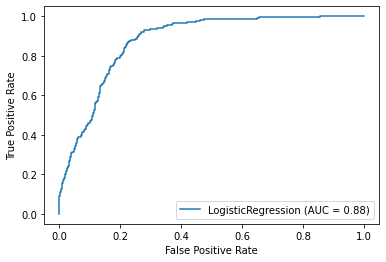

In [396]:
logit_val = LogisticRegression(solver='liblinear').fit(X_train, y_train)

logit_pred = logit_val.predict(X_test)

print(confusion_matrix(y_test, logit_pred))
print(classification_report(y_test, logit_pred))
print()
print(plot_roc_curve(logit_val, X_test, y_test))

[[1121   99]
 [   0 1202]]
              precision    recall  f1-score   support

           0       1.00      0.92      0.96      1220
           1       0.92      1.00      0.96      1202

    accuracy                           0.96      2422
   macro avg       0.96      0.96      0.96      2422
weighted avg       0.96      0.96      0.96      2422



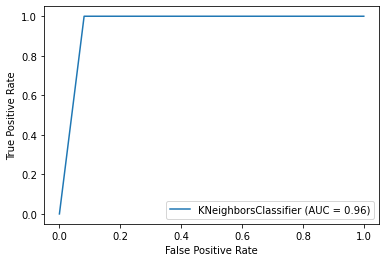

In [392]:
knn_val = KNeighborsClassifier(n_neighbors = 1).fit(X_train, y_train)

knn_pred = knn_val.predict(X_test)

print(confusion_matrix(y_test, knn_pred))
print(classification_report(y_test, knn_pred))
print(plot_roc_curve(knn_val, X_test, y_test))

In [ ]:
knn_val = KNeighborsClassifier(n_neighbors = 1).fit(X_train, y_train)

knn_pred = knn_val.predict(X_test)

print(confusion_matrix(y_test, knn_pred))
print(classification_report(y_test, knn_pred))
print(plot_roc_curve(knn_val, X_test, y_test))

[[1025  195]
 [ 465  737]]
              precision    recall  f1-score   support

           0       0.69      0.84      0.76      1220
           1       0.79      0.61      0.69      1202

    accuracy                           0.73      2422
   macro avg       0.74      0.73      0.72      2422
weighted avg       0.74      0.73      0.72      2422



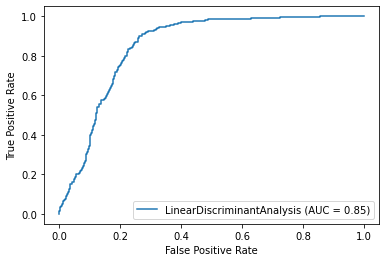

In [393]:
lda_val = LinearDiscriminantAnalysis().fit(X_train, y_train)

lda_pred = lda_val.predict(X_test)

print(confusion_matrix(y_test, lda_pred))
print(classification_report(y_test, lda_pred))
print(plot_roc_curve(lda_val, X_test, y_test))

[[ 743  477]
 [ 156 1046]]
              precision    recall  f1-score   support

           0       0.83      0.61      0.70      1220
           1       0.69      0.87      0.77      1202

    accuracy                           0.74      2422
   macro avg       0.76      0.74      0.73      2422
weighted avg       0.76      0.74      0.73      2422



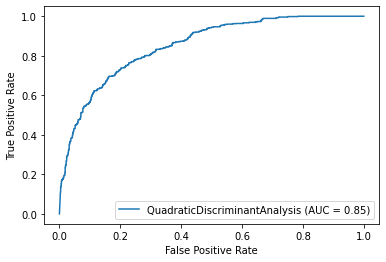

In [394]:
qda_val = QuadraticDiscriminantAnalysis().fit(X_train, y_train)

qda_pred = qda_val.predict(X_test)

print(confusion_matrix(y_test, qda_pred))
print(classification_report(y_test, qda_pred))
print(plot_roc_curve(qda_val, X_test, y_test))

In [400]:
best_14_wo_fraud = ['DeductibleAmtPaid',
 'NoOfMonths_PartACov',
 'NoOfMonths_PartBCov',
 'IPAnnualReimbursementAmt',
 'IPAnnualDeductibleAmt',
 'OPAnnualReimbursementAmt',
 'ClaimProcessTime',
 'ChronicCond_Heartfailure_1',
 'ChronicCond_KidneyDisease_1',
 'ChronicCond_Cancer_1',
 'ChronicCond_Depression_1',
 'RenalDiseaseIndicator_1',
 'Race_3',
 'Counts']

[[1019  201]
 [ 325  877]]
              precision    recall  f1-score   support

           0       0.76      0.84      0.79      1220
           1       0.81      0.73      0.77      1202

    accuracy                           0.78      2422
   macro avg       0.79      0.78      0.78      2422
weighted avg       0.79      0.78      0.78      2422



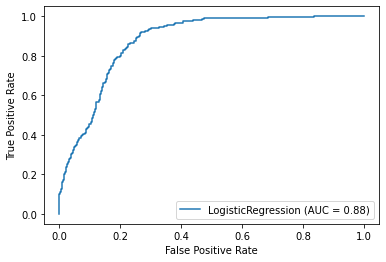

In [401]:
logit14_val = LogisticRegression(solver='liblinear').fit(X_train[best_14_wo_fraud], y_train)

logit14_pred = logit14_val.predict(X_test[best_14_wo_fraud])

print(confusion_matrix(y_test, logit14_pred))
print(classification_report(y_test, logit14_pred))
print(plot_roc_curve(logit14_val, X_test[best_14_wo_fraud], y_test))

[[1025  195]
 [ 467  735]]
              precision    recall  f1-score   support

           0       0.69      0.84      0.76      1220
           1       0.79      0.61      0.69      1202

    accuracy                           0.73      2422
   macro avg       0.74      0.73      0.72      2422
weighted avg       0.74      0.73      0.72      2422



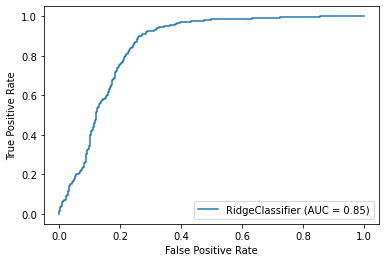

In [402]:
ridge_val = RidgeClassifier().fit(X_train, y_train)

ridge_pred = ridge_val.predict(X_test)

print(confusion_matrix(y_test, ridge_pred))
print(classification_report(y_test, ridge_pred))
print(plot_roc_curve(ridge_val, X_test, y_test))

[[1015  205]
 [ 323  879]]
              precision    recall  f1-score   support

           0       0.76      0.83      0.79      1220
           1       0.81      0.73      0.77      1202

    accuracy                           0.78      2422
   macro avg       0.78      0.78      0.78      2422
weighted avg       0.78      0.78      0.78      2422



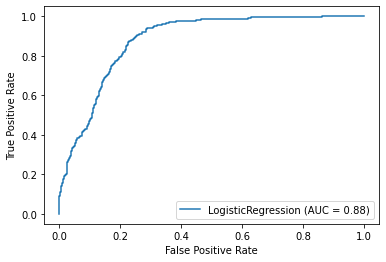

In [403]:
lasso_val = LogisticRegression(penalty = 'l1', solver='liblinear').fit(X_train, y_train)

lasso_pred = lasso_val.predict(X_test)

print(confusion_matrix(y_test, lasso_pred))
print(classification_report(y_test, lasso_pred))
print(plot_roc_curve(lasso_val, X_test, y_test))

[[1142   78]
 [   0 1202]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      1220
           1       0.94      1.00      0.97      1202

    accuracy                           0.97      2422
   macro avg       0.97      0.97      0.97      2422
weighted avg       0.97      0.97      0.97      2422



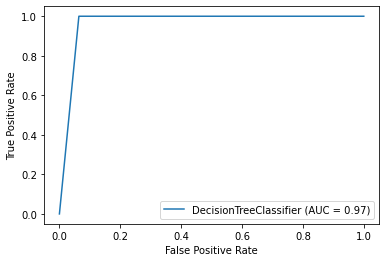

In [404]:
tree_val = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)

tree_pred = tree_val.predict(X_test)

print(confusion_matrix(y_test, tree_pred))
print(classification_report(y_test, tree_pred))
print(plot_roc_curve(tree_val, X_test, y_test))

[[1197   23]
 [   0 1202]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1220
           1       0.98      1.00      0.99      1202

    accuracy                           0.99      2422
   macro avg       0.99      0.99      0.99      2422
weighted avg       0.99      0.99      0.99      2422



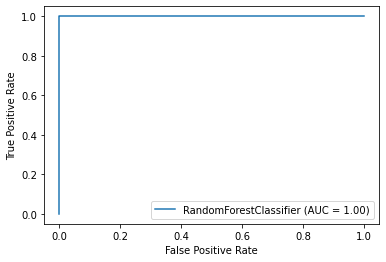

In [608]:
forest_val = RandomForestClassifier(n_estimators = 200, max_depth = None, min_samples_leaf = 1, min_samples_split = 2, bootstrap = False, random_state = 69420).fit(X_train, y_train)

forest_pred = forest_val.predict(X_test)

print(confusion_matrix(y_test, forest_pred))
print(classification_report(y_test, forest_pred))
print(plot_roc_curve(forest_val, X_test, y_test))

In [615]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

scaler = StandardScaler()
scaler.fit(X_test)
X_test_scaled = scaler.transform(X_test)

[[ 984  236]
 [ 172 1030]]
              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1220
           1       0.81      0.86      0.83      1202

    accuracy                           0.83      2422
   macro avg       0.83      0.83      0.83      2422
weighted avg       0.83      0.83      0.83      2422



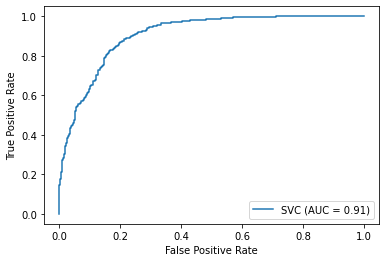

In [596]:
svc_val = SVC().fit(X_train, y_train)

svc_pred = svc_val.predict(X_test)

print(confusion_matrix(y_test, svc_pred))
print(classification_report(y_test, svc_pred))
print(plot_roc_curve(svc_val, X_test, y_test))

[[1212    8]
 [  35 1167]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1220
           1       0.99      0.97      0.98      1202

    accuracy                           0.98      2422
   macro avg       0.98      0.98      0.98      2422
weighted avg       0.98      0.98      0.98      2422



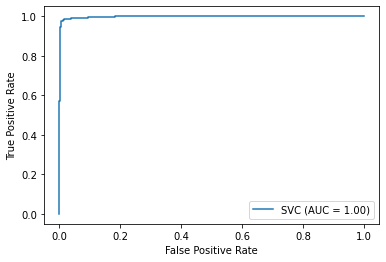

In [616]:
svc_val = SVC(C = 10, gamma = 1).fit(X_train_scaled, y_train)

svc_pred = svc_val.predict(X_test_scaled)

print(confusion_matrix(y_test, svc_pred))
print(classification_report(y_test, svc_pred))
print(plot_roc_curve(svc_val, X_test_scaled, y_test))

C:\Users\Mick4\Anaconda3\envs\data2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[[ 926  294]
 [ 157 1045]]
              precision    recall  f1-score   support

           0       0.86      0.76      0.80      1220
           1       0.78      0.87      0.82      1202

    accuracy                           0.81      2422
   macro avg       0.82      0.81      0.81      2422
weighted avg       0.82      0.81      0.81      2422



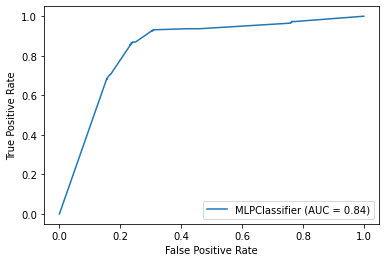

In [410]:
perceptron_val = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10, 10), random_state = 69420, activation = "logistic").fit(X_train, y_train)

perceptron_pred = perceptron_val.predict(X_test)

print(confusion_matrix(y_test, perceptron_pred))
print(classification_report(y_test, perceptron_pred))
print(plot_roc_curve(perceptron_val, X_test, y_test))

[17:29:07] DEBUG: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\gbm\gbtree.cc:147: Using tree method: 2
[17:29:07] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 178 extra nodes, 0 pruned nodes, max_depth=9
[17:29:07] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 194 extra nodes, 0 pruned nodes, max_depth=9
[17:29:07] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 186 extra nodes, 0 pruned nodes, max_depth=9
[17:29:07] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 198 extra nodes, 0 pruned nodes, max_depth=9
[17:29:07] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 202 extra nodes, 0 pruned nodes, max_depth=9
[17:29:07] INFO: C:\Us

[17:29:08] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=9
[17:29:08] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=9
[17:29:08] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 48 extra nodes, 0 pruned nodes, max_depth=9
[17:29:08] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=9
[17:29:08] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=9
[17:29:08] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 54 extra nodes, 0 pruned

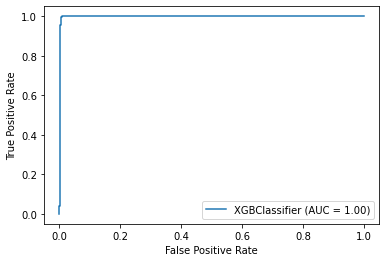

In [412]:
xgb_val = xgboost.XGBClassifier(max_depth = 9, eta = 0.2).fit(X_train, y_train)

xgb_pred = xgb_val.predict(X_test)

print(confusion_matrix(y_test, xgb_pred))
print(classification_report(y_test, xgb_pred))
print(plot_roc_curve(xgb_val, X_test, y_test))

[[1173   47]
 [   0 1202]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1220
           1       0.96      1.00      0.98      1202

    accuracy                           0.98      2422
   macro avg       0.98      0.98      0.98      2422
weighted avg       0.98      0.98      0.98      2422



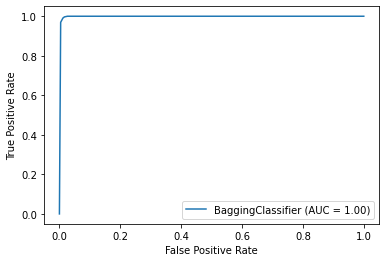

In [592]:
bag_val = BaggingClassifier().fit(X_train, y_train)

bag_pred = bag_val.predict(X_test)

print(confusion_matrix(y_test, bag_pred))
print(classification_report(y_test, bag_pred))
print(plot_roc_curve(bag_val, X_test, y_test))

[[1083  137]
 [  30 1172]]
              precision    recall  f1-score   support

           0       0.97      0.89      0.93      1220
           1       0.90      0.98      0.93      1202

    accuracy                           0.93      2422
   macro avg       0.93      0.93      0.93      2422
weighted avg       0.93      0.93      0.93      2422



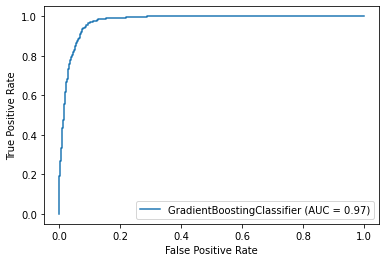

In [426]:
gbm_val = GradientBoostingClassifier().fit(X_train, y_train)

gbm_pred = gbm_val.predict(X_test)

print(confusion_matrix(y_test, gbm_pred))
print(classification_report(y_test, gbm_pred))
print(plot_roc_curve(gbm_val, X_test, y_test))

In [536]:
#Principal Component Analysis
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)
from sklearn.decomposition import PCA

pca = PCA(n_components = 10)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

In [514]:
X_pca_train, X_pca_test, y_train, y_test = train_test_split(x_pca, y, test_size = 0.3, random_state = 69420)

In [515]:
X_pca_train

array([[ 0.49817129, -0.75215672, -0.75983782, ...,  2.17226983,
         1.11925431, -0.62768465],
       [-3.17000806,  0.77450937,  3.7963152 , ..., -0.61971636,
        -1.55795542,  3.28328339],
       [-0.52553363, -0.8420746 ,  1.15836517, ..., -0.84828658,
        -0.28621807, -0.77438049],
       ...,
       [-1.20307846,  1.04395655, -1.24692232, ..., -0.52864616,
         0.42776657, -0.27963402],
       [-1.51239419,  0.05144865, -0.22776898, ...,  0.40720995,
         1.14629509,  0.41149491],
       [-2.14976142, -1.46001459, -1.29513359, ..., -0.53583237,
        -0.13349144, -0.04417429]])

[[925 295]
 [558 644]]
              precision    recall  f1-score   support

           0       0.62      0.76      0.68      1220
           1       0.69      0.54      0.60      1202

    accuracy                           0.65      2422
   macro avg       0.65      0.65      0.64      2422
weighted avg       0.65      0.65      0.64      2422



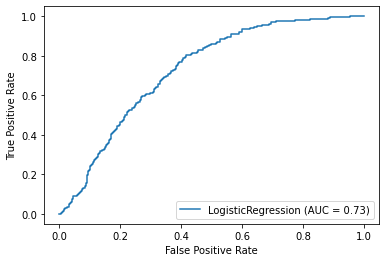

In [516]:
logit_val = LogisticRegression(solver='liblinear').fit(X_pca_train, y_train)

logit_pred = logit_val.predict(X_pca_test)

print(confusion_matrix(y_test, logit_pred))
print(classification_report(y_test, logit_pred))
print(plot_roc_curve(logit_val, X_pca_test, y_test))

In [600]:
logit = LogisticRegression(solver='liblinear')
print(np.mean(cross_val_score(logit, x_pca, y, scoring = 'f1', cv = k)))
print(np.mean(cross_val_score(logit, x_pca, y, scoring = 'accuracy', cv = k)))

0.6117081261607283
0.6588210215073552


[[1108  112]
 [   0 1202]]
              precision    recall  f1-score   support

           0       1.00      0.91      0.95      1220
           1       0.91      1.00      0.96      1202

    accuracy                           0.95      2422
   macro avg       0.96      0.95      0.95      2422
weighted avg       0.96      0.95      0.95      2422



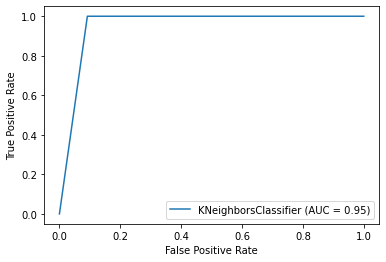

In [517]:
knn_val = KNeighborsClassifier(n_neighbors = 1).fit(X_pca_train, y_train)

knn_pred = knn_val.predict(X_pca_test)

print(confusion_matrix(y_test, knn_pred))
print(classification_report(y_test, knn_pred))
print(plot_roc_curve(knn_val, X_pca_test, y_test))

In [599]:
knn = KNeighborsClassifier(n_neighbors = 1)
print(np.mean(cross_val_score(knn, x_pca, y, scoring = 'f1', cv = k)))
print(np.mean(cross_val_score(knn, x_pca, y, scoring = 'accuracy', cv = k)))

0.9602254526650971
0.9584968162243733


[[942 278]
 [588 614]]
              precision    recall  f1-score   support

           0       0.62      0.77      0.69      1220
           1       0.69      0.51      0.59      1202

    accuracy                           0.64      2422
   macro avg       0.65      0.64      0.64      2422
weighted avg       0.65      0.64      0.64      2422



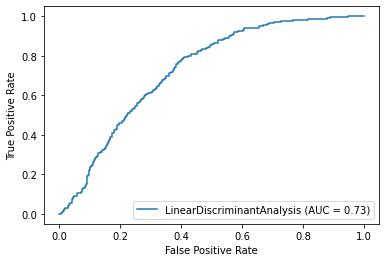

In [518]:
lda_val = LinearDiscriminantAnalysis().fit(X_pca_train, y_train)

lda_pred = lda_val.predict(X_pca_test)

print(confusion_matrix(y_test, lda_pred))
print(classification_report(y_test, lda_pred))
print(plot_roc_curve(lda_val, X_pca_test, y_test))

In [601]:
lda = LinearDiscriminantAnalysis()
print(np.mean(cross_val_score(lda, x_pca, y, scoring = 'f1', cv = k)))
print(np.mean(cross_val_score(lda, x_pca, y, scoring = 'accuracy', cv = k)))

0.5959972525179309
0.6522541008747715


In [603]:
qda = QuadraticDiscriminantAnalysis()
print(np.mean(cross_val_score(qda, x_pca, y, scoring = 'f1', cv = k)))
print(np.mean(cross_val_score(qda, x_pca, y, scoring = 'accuracy', cv = k)))

0.7313327774248904
0.6679872587630511


[[ 566  654]
 [ 115 1087]]
              precision    recall  f1-score   support

           0       0.83      0.46      0.60      1220
           1       0.62      0.90      0.74      1202

    accuracy                           0.68      2422
   macro avg       0.73      0.68      0.67      2422
weighted avg       0.73      0.68      0.67      2422



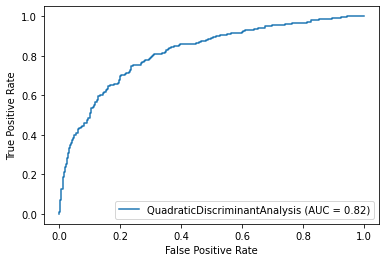

In [519]:
qda_val = QuadraticDiscriminantAnalysis().fit(X_pca_train, y_train)

qda_pred = qda_val.predict(X_pca_test)

print(confusion_matrix(y_test, qda_pred))
print(classification_report(y_test, qda_pred))
print(plot_roc_curve(qda_val, X_pca_test, y_test))

In [520]:
best_14_wo_fraud = ['DeductibleAmtPaid',
 'NoOfMonths_PartACov',
 'NoOfMonths_PartBCov',
 'IPAnnualReimbursementAmt',
 'IPAnnualDeductibleAmt',
 'OPAnnualReimbursementAmt',
 'ClaimProcessTime',
 'ChronicCond_Heartfailure_1',
 'ChronicCond_KidneyDisease_1',
 'ChronicCond_Cancer_1',
 'ChronicCond_Depression_1',
 'RenalDiseaseIndicator_1',
 'Race_3',
 'Counts']

[[1019  201]
 [ 325  877]]
              precision    recall  f1-score   support

           0       0.76      0.84      0.79      1220
           1       0.81      0.73      0.77      1202

    accuracy                           0.78      2422
   macro avg       0.79      0.78      0.78      2422
weighted avg       0.79      0.78      0.78      2422



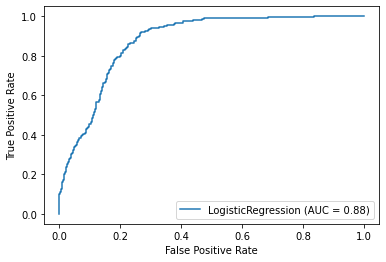

In [522]:
logit14_val = LogisticRegression(solver='liblinear').fit(X_train[best_14_wo_fraud], y_train)

logit14_pred = logit14_val.predict(X_test[best_14_wo_fraud])

print(confusion_matrix(y_test, logit14_pred))
print(classification_report(y_test, logit14_pred))
print(plot_roc_curve(logit14_val, X_test[best_14_wo_fraud], y_test))

In [604]:
ridge = RidgeClassifier()
print(np.mean(cross_val_score(ridge, x_pca, y, scoring = 'f1', cv = k)))
print(np.mean(cross_val_score(ridge, x_pca, y, scoring = 'accuracy', cv = k)))

0.5959972525179309
0.6522541008747715


[[942 278]
 [588 614]]
              precision    recall  f1-score   support

           0       0.62      0.77      0.69      1220
           1       0.69      0.51      0.59      1202

    accuracy                           0.64      2422
   macro avg       0.65      0.64      0.64      2422
weighted avg       0.65      0.64      0.64      2422



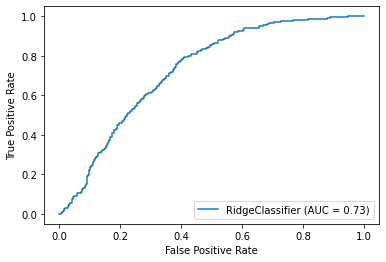

In [523]:
ridge_val = RidgeClassifier().fit(X_pca_train, y_train)

ridge_pred = ridge_val.predict(X_pca_test)

print(confusion_matrix(y_test, ridge_pred))
print(classification_report(y_test, ridge_pred))
print(plot_roc_curve(ridge_val, X_pca_test, y_test))

[[925 295]
 [558 644]]
              precision    recall  f1-score   support

           0       0.62      0.76      0.68      1220
           1       0.69      0.54      0.60      1202

    accuracy                           0.65      2422
   macro avg       0.65      0.65      0.64      2422
weighted avg       0.65      0.65      0.64      2422



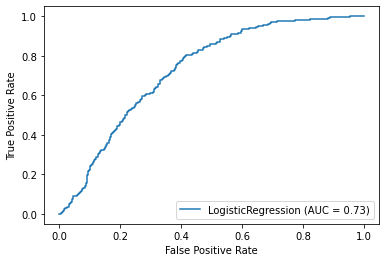

In [524]:
lasso_val = LogisticRegression(penalty = 'l1', solver='liblinear').fit(X_pca_train, y_train)

lasso_pred = lasso_val.predict(X_pca_test)

print(confusion_matrix(y_test, lasso_pred))
print(classification_report(y_test, lasso_pred))
print(plot_roc_curve(lasso_val, X_pca_test, y_test))

In [605]:
lasso = LogisticRegression(penalty = 'l1', solver='liblinear')
print(np.mean(cross_val_score(lasso, x_pca, y, scoring = 'f1', cv = k)))
print(np.mean(cross_val_score(lasso, x_pca, y, scoring = 'accuracy', cv = k)))

0.6112496910648517
0.6588211748684162


[[1113  107]
 [   0 1202]]
              precision    recall  f1-score   support

           0       1.00      0.91      0.95      1220
           1       0.92      1.00      0.96      1202

    accuracy                           0.96      2422
   macro avg       0.96      0.96      0.96      2422
weighted avg       0.96      0.96      0.96      2422



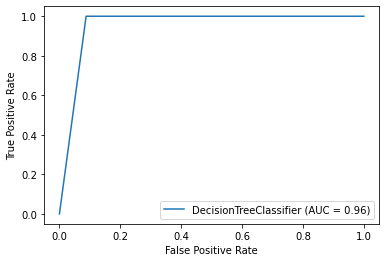

In [525]:
tree_val = DecisionTreeClassifier(random_state=0).fit(X_pca_train, y_train)

tree_pred = tree_val.predict(X_pca_test)

print(confusion_matrix(y_test, tree_pred))
print(classification_report(y_test, tree_pred))
print(plot_roc_curve(tree_val, X_pca_test, y_test))

In [606]:
tree = DecisionTreeClassifier(random_state=0)
print(np.mean(cross_val_score(tree, x_pca, y, scoring = 'f1', cv = k)))
print(np.mean(cross_val_score(tree, x_pca, y, scoring = 'accuracy', cv = k)))

0.9655671443071103
0.9643211625995314


[[1190   30]
 [   0 1202]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1220
           1       0.98      1.00      0.99      1202

    accuracy                           0.99      2422
   macro avg       0.99      0.99      0.99      2422
weighted avg       0.99      0.99      0.99      2422



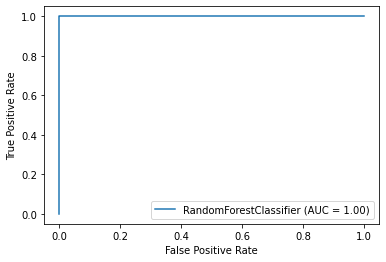

In [526]:
forest_val = RandomForestClassifier(n_estimators = 200, max_depth = None, min_samples_leaf = 1, min_samples_split = 2, bootstrap = False, random_state = 69420).fit(X_pca_train, y_train)

forest_pred = forest_val.predict(X_pca_test)

print(confusion_matrix(y_test, forest_pred))
print(classification_report(y_test, forest_pred))
print(plot_roc_curve(forest_val, X_pca_test, y_test))

In [607]:
forest = RandomForestClassifier(n_estimators = 200, max_depth = None, min_samples_leaf = 1, min_samples_split = 2, bootstrap = False, random_state = 69420).fit(X_pca_train, y_train)
print(np.mean(cross_val_score(forest, x_pca, y, scoring = 'f1', cv = k)))
print(np.mean(cross_val_score(forest, x_pca, y, scoring = 'accuracy', cv = k)))

0.9906831647416595
0.9905857779086459


In [470]:
x_pca_df = pd.DataFrame(x_pca)

In [471]:
x_pca_df.head()

0         1         2         3         4         5         6  \
0 -2.410625 -1.190475  0.247481  2.349728  1.831971 -0.538602 -0.522387   
1 -1.727978 -1.482040 -0.608896 -0.101392 -1.782798 -1.001184  0.857282   
2 -0.054531  1.713686 -3.869331 -0.534635 -0.631519  0.587772  0.659586   
3 -1.120220  2.238346  0.759827 -1.278165  0.769600  1.016081  0.716541   
4 -3.227917 -1.914152  0.307182 -1.683828  1.605052 -2.309743  1.103490   

          7         8         9  
0 -0.151046  0.115414 -0.023222  
1 -1.619598 -2.555958  0.466238  
2  0.220141  0.990567 -0.861775  
3 -0.531105  0.298600 -0.782658  
4 -0.832063  1.199603  1.318402

[[1179   41]
 [   0 1202]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1220
           1       0.97      1.00      0.98      1202

    accuracy                           0.98      2422
   macro avg       0.98      0.98      0.98      2422
weighted avg       0.98      0.98      0.98      2422



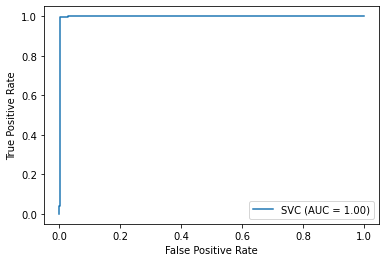

In [527]:
svc_val = SVC(C = 10, gamma = 1).fit(X_pca_train, y_train)

svc_pred = svc_val.predict(X_pca_test)

print(confusion_matrix(y_test, svc_pred))
print(classification_report(y_test, svc_pred))
print(plot_roc_curve(svc_val, X_pca_test, y_test))

In [609]:
svc = SVC(C = 10, gamma = 1).fit(X_pca_train, y_train)
print(np.mean(cross_val_score(svc, x_pca, y, scoring = 'f1', cv = k)))
print(np.mean(cross_val_score(svc, x_pca, y, scoring = 'accuracy', cv = k)))

0.9815462782714104
0.9811701755677428


In [613]:
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10, 10), random_state = 69420, activation = "logistic").fit(X_pca_train, y_train)
print(np.mean(cross_val_score(mlp, x_pca, y, scoring = 'f1', cv = k)))
print(np.mean(cross_val_score(mlp, x_pca, y, scoring = 'accuracy', cv = k)))

C:\Users\Mick4\Anaconda3\envs\data2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Mick4\Anaconda3\envs\data2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Mick4\Anaconda3\envs\data2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (

0.8594314664459883


C:\Users\Mick4\Anaconda3\envs\data2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Mick4\Anaconda3\envs\data2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Mick4\Anaconda3\envs\data2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (

0.8484855595224949


C:\Users\Mick4\Anaconda3\envs\data2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


C:\Users\Mick4\Anaconda3\envs\data2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[[ 927  293]
 [ 131 1071]]
              precision    recall  f1-score   support

           0       0.88      0.76      0.81      1220
           1       0.79      0.89      0.83      1202

    accuracy                           0.82      2422
   macro avg       0.83      0.83      0.82      2422
weighted avg       0.83      0.82      0.82      2422



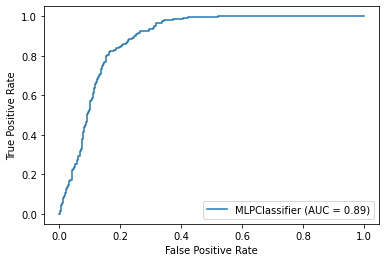

In [528]:
perceptron_val = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10, 10), random_state = 69420, activation = "logistic").fit(X_pca_train, y_train)

perceptron_pred = perceptron_val.predict(X_pca_test)

print(confusion_matrix(y_test, perceptron_pred))
print(classification_report(y_test, perceptron_pred))
print(plot_roc_curve(perceptron_val, X_pca_test, y_test))

[01:33:46] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { maX_pca_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[01:33:46] DEBUG: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\gbm\gbtree.cc:147: Using tree method: 2
[01:33:46] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 82 extra nodes, 0 pruned nodes, max_depth=6
[01:33:46] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 82 extra nodes, 0 pruned nodes, max_depth=6
[01:33:46] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 82 extra nodes, 0 pr

[01:33:46] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 72 extra nodes, 0 pruned nodes, max_depth=6
[01:33:46] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=6
[01:33:46] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=6
[01:33:46] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 68 extra nodes, 0 pruned nodes, max_depth=6
[01:33:46] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=6
[01:33:46] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\tree\updater_prune.cc:98: tree pruning end, 62 extra nodes, 0 pruned

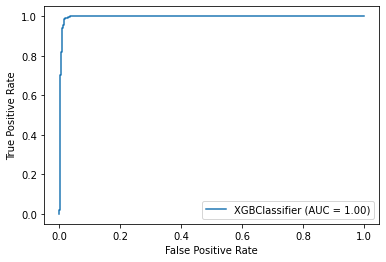

In [529]:
xgb_val = xgboost.XGBClassifier(maX_pca_depth = 9, eta = 0.2).fit(X_pca_train, y_train)

xgb_pred = xgb_val.predict(X_pca_test)

print(confusion_matrix(y_test, xgb_pred))
print(classification_report(y_test, xgb_pred))
print(plot_roc_curve(xgb_val, X_pca_test, y_test))

In [614]:
xgb = xgboost.XGBClassifier(max_depth = 9, eta = 0.2).fit(X_pca_train, y_train)
print(np.mean(cross_val_score(xgb, x_pca, y, scoring = 'f1', cv = k)))
print(np.mean(cross_val_score(xgb, x_pca, y, scoring = 'accuracy', cv = k)))

0.9771354238833169
0.9765863668151201


[[1172   48]
 [   0 1202]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1220
           1       0.96      1.00      0.98      1202

    accuracy                           0.98      2422
   macro avg       0.98      0.98      0.98      2422
weighted avg       0.98      0.98      0.98      2422



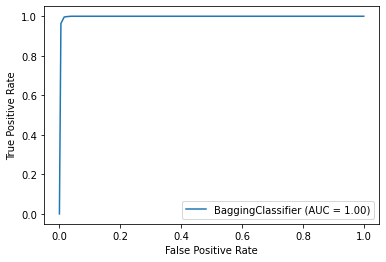

In [593]:
bag_val = BaggingClassifier().fit(X_pca_train, y_train)

bag_pred = bag_val.predict(X_pca_test)

print(confusion_matrix(y_test, bag_pred))
print(classification_report(y_test, bag_pred))
print(plot_roc_curve(bag_val, X_pca_test, y_test))

In [611]:
bag = BaggingClassifier().fit(X_pca_train, y_train)
print(np.mean(cross_val_score(bag, x_pca, y, scoring = 'f1', cv = k)))
print(np.mean(cross_val_score(bag, x_pca, y, scoring = 'accuracy', cv = k)))

0.9795037263913638
0.9803030721287742


[[1021  199]
 [  97 1105]]
              precision    recall  f1-score   support

           0       0.91      0.84      0.87      1220
           1       0.85      0.92      0.88      1202

    accuracy                           0.88      2422
   macro avg       0.88      0.88      0.88      2422
weighted avg       0.88      0.88      0.88      2422



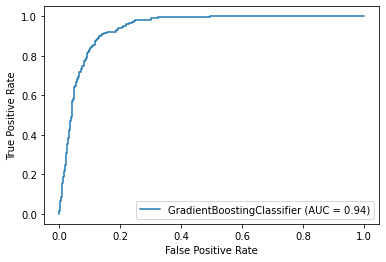

In [530]:
gbm_val = GradientBoostingClassifier().fit(X_pca_train, y_train)

gbm_pred = gbm_val.predict(X_pca_test)

print(confusion_matrix(y_test, gbm_pred))
print(classification_report(y_test, gbm_pred))
print(plot_roc_curve(gbm_val, X_pca_test, y_test))

In [612]:
gbm = GradientBoostingClassifier().fit(X_pca_train, y_train)
print(np.mean(cross_val_score(gbm, x_pca, y, scoring = 'f1', cv = k)))
print(np.mean(cross_val_score(gbm, x_pca, y, scoring = 'accuracy', cv = k)))

0.8853435724083024
0.8795822751420124


In [420]:
#random forest hyperparameter tuning
forest_params_pca = {'bootstrap': [True, False],
 'max_depth': [10, 25, None],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200]}

In [421]:
forest_grid_pca = GridSearchCV(forest, forest_params, cv=k, verbose = 3)

forest_grid.fit(X,y)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits
[CV] bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.950, total=   2.2s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


[CV]  bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.950, total=   2.4s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.5s remaining:    0.0s


[CV]  bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.939, total=   2.6s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.953, total=   2.6s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.968, total=   2.7s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.965, total=   2.6s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.957, total=   2.7s
[CV] bootstrap

[CV]  bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.948, total=   2.4s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.953, total=   2.5s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.937, total=   2.5s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.958, total=   2.2s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.962, total=   2.2s
[CV] 

[CV]  bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200, score=0.960, total=   4.8s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200, score=0.960, total=   4.7s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100, score=0.948, total=   2.5s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100, score=0.952, total=   2.4s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100, score=0.937, total=   2.4s
[CV] bootstrap

[CV]  bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200, score=0.952, total=   6.1s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200, score=0.941, total=   5.8s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200, score=0.958, total=   5.7s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200, score=0.962, total=   5.5s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.946, total=   2.4s
[CV] bo

[CV]  bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200, score=0.963, total=   5.5s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200, score=0.967, total=   5.1s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200, score=0.948, total=   5.2s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200, score=0.942, total=   5.2s
[CV] bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200, score=0.957, total=   5.1s
[CV] bootstrap

[CV]  bootstrap=True, max_depth=25, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.975, total=   7.1s
[CV] bootstrap=True, max_depth=25, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=25, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.983, total=   7.1s
[CV] bootstrap=True, max_depth=25, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=25, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.989, total=   6.9s
[CV] bootstrap=True, max_depth=25, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=25, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.986, total=   6.7s
[CV] bootstrap=True, max_depth=25, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=25, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.981, total=   7.0s
[CV] bootstrap

[CV]  bootstrap=True, max_depth=25, min_samples_leaf=1, min_samples_split=10, n_estimators=200, score=0.984, total=  55.4s
[CV] bootstrap=True, max_depth=25, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=25, min_samples_leaf=1, min_samples_split=10, n_estimators=200, score=0.976, total=   6.6s
[CV] bootstrap=True, max_depth=25, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=25, min_samples_leaf=1, min_samples_split=10, n_estimators=200, score=0.970, total=   6.9s
[CV] bootstrap=True, max_depth=25, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=25, min_samples_leaf=1, min_samples_split=10, n_estimators=200, score=0.981, total=   6.8s
[CV] bootstrap=True, max_depth=25, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=25, min_samples_leaf=1, min_samples_split=10, n_estimators=200, score=0.989, total=   6.2s
[CV] 

[CV]  bootstrap=True, max_depth=25, min_samples_leaf=2, min_samples_split=5, n_estimators=100, score=0.980, total=   3.2s
[CV] bootstrap=True, max_depth=25, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=True, max_depth=25, min_samples_leaf=2, min_samples_split=5, n_estimators=100, score=0.985, total=   3.3s
[CV] bootstrap=True, max_depth=25, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=25, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=0.981, total=   7.0s
[CV] bootstrap=True, max_depth=25, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=25, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=0.975, total=   6.8s
[CV] bootstrap=True, max_depth=25, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=25, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=0.971, total=   6.7s
[CV] bootstrap

[CV]  bootstrap=True, max_depth=25, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.975, total=   3.2s
[CV] bootstrap=True, max_depth=25, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=True, max_depth=25, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.970, total=   3.2s
[CV] bootstrap=True, max_depth=25, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=True, max_depth=25, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.976, total=   3.2s
[CV] bootstrap=True, max_depth=25, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=True, max_depth=25, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.976, total=   3.2s
[CV] bootstrap=True, max_depth=25, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=25, min_samples_leaf=4, min_samples_split=2, n_estimators=200, score=0.975, total=   6.2s
[CV] bootstrap

[CV]  bootstrap=True, max_depth=25, min_samples_leaf=4, min_samples_split=10, n_estimators=100, score=0.985, total=   3.1s
[CV] bootstrap=True, max_depth=25, min_samples_leaf=4, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=25, min_samples_leaf=4, min_samples_split=10, n_estimators=100, score=0.983, total=   3.1s
[CV] bootstrap=True, max_depth=25, min_samples_leaf=4, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=25, min_samples_leaf=4, min_samples_split=10, n_estimators=100, score=0.973, total=   3.2s
[CV] bootstrap=True, max_depth=25, min_samples_leaf=4, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=25, min_samples_leaf=4, min_samples_split=10, n_estimators=100, score=0.968, total=   3.2s
[CV] bootstrap=True, max_depth=25, min_samples_leaf=4, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=25, min_samples_leaf=4, min_samples_split=10, n_estimators=100, score=0.978, total=   3.1s
[CV] 

[CV]  bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.975, total=   4.0s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.986, total=   4.1s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.990, total=   3.9s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.989, total=   4.2s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100, score=0.981, total=   3

[CV]  bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100, score=0.980, total=   3.1s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100, score=0.975, total=   2.7s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100, score=0.970, total=   3.1s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100, score=0.984, total=   2.9s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100, score=0.989, total=   2

[CV]  bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=0.980, total=   6.2s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=0.985, total=   6.3s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100, score=0.979, total=   3.0s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100, score=0.975, total=   2.8s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100, score=0.968, tota

[CV]  bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=200, score=0.976, total=   6.2s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=200, score=0.975, total=   6.3s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=200, score=0.976, total=   4.9s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=200, score=0.978, total=   4.3s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=100, score=0.974, total=   2

[CV]  bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=200, score=0.983, total=   6.5s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=200, score=0.984, total=   6.4s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=200, score=0.973, total=   6.5s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=200, score=0.973, total=   6.5s
[CV] bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=200, score=0.975, t

[CV]  bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=0.941, total=   6.8s
[CV] bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=0.962, total=   6.9s
[CV] bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=0.968, total=   7.3s
[CV] bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=0.965, total=   6.6s
[CV] bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200, score=0.957, total=   7.2s
[CV] 

[CV]  bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200, score=0.957, total=   6.8s
[CV] bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200, score=0.953, total=   7.1s
[CV] bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200, score=0.939, total=   7.2s
[CV] bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200, score=0.960, total=   7.0s
[CV] bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200, score=0.969, total=   7.3s
[CV] 

[CV]  bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100, score=0.958, total=   3.3s
[CV] bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100, score=0.959, total=   3.1s
[CV] bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200, score=0.949, total=   6.4s
[CV] bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200, score=0.953, total=   7.3s
[CV] bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=False, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200, score=0.941, total=   7

[CV]  bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100, score=0.950, total=   3.6s
[CV] bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100, score=0.949, total=   3.5s
[CV] bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100, score=0.962, total=   3.2s
[CV] bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100, score=0.962, total=   3.4s
[CV] bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200, score=0.950, total=   7.1s
[CV] 

[CV]  bootstrap=False, max_depth=25, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.993, total=   4.8s
[CV] bootstrap=False, max_depth=25, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=False, max_depth=25, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.989, total=   4.8s
[CV] bootstrap=False, max_depth=25, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=False, max_depth=25, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.985, total=   4.9s
[CV] bootstrap=False, max_depth=25, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=False, max_depth=25, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.986, total=   4.8s
[CV] bootstrap=False, max_depth=25, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=False, max_depth=25, min_samples_leaf=1, min_samples_split=2, n_estimators=100, score=0.981, total=   4.7s
[CV] 

[CV]  bootstrap=False, max_depth=25, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.981, total=   4.3s
[CV] bootstrap=False, max_depth=25, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=False, max_depth=25, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.984, total=   4.5s
[CV] bootstrap=False, max_depth=25, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=False, max_depth=25, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.993, total=   4.6s
[CV] bootstrap=False, max_depth=25, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=False, max_depth=25, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.990, total=   4.8s
[CV] bootstrap=False, max_depth=25, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=False, max_depth=25, min_samples_leaf=1, min_samples_split=10, n_estimators=100, score=0.985, total=   4

[CV]  bootstrap=False, max_depth=25, min_samples_leaf=2, min_samples_split=5, n_estimators=100, score=0.989, total=   4.8s
[CV] bootstrap=False, max_depth=25, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=False, max_depth=25, min_samples_leaf=2, min_samples_split=5, n_estimators=100, score=0.986, total=   4.8s
[CV] bootstrap=False, max_depth=25, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=False, max_depth=25, min_samples_leaf=2, min_samples_split=5, n_estimators=100, score=0.984, total=   4.5s
[CV] bootstrap=False, max_depth=25, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=False, max_depth=25, min_samples_leaf=2, min_samples_split=5, n_estimators=100, score=0.985, total=   5.1s
[CV] bootstrap=False, max_depth=25, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=False, max_depth=25, min_samples_leaf=2, min_samples_split=5, n_estimators=100, score=0.990, total=   4.9s
[CV] 

[CV]  bootstrap=False, max_depth=25, min_samples_leaf=2, min_samples_split=10, n_estimators=200, score=0.981, total=   7.9s
[CV] bootstrap=False, max_depth=25, min_samples_leaf=2, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=False, max_depth=25, min_samples_leaf=2, min_samples_split=10, n_estimators=200, score=0.990, total=   8.6s
[CV] bootstrap=False, max_depth=25, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=False, max_depth=25, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.989, total=   4.0s
[CV] bootstrap=False, max_depth=25, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=False, max_depth=25, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.979, total=   4.1s
[CV] bootstrap=False, max_depth=25, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=False, max_depth=25, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.975, total=   4.2s
[C

[CV]  bootstrap=False, max_depth=25, min_samples_leaf=4, min_samples_split=5, n_estimators=200, score=0.984, total=   8.4s
[CV] bootstrap=False, max_depth=25, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=False, max_depth=25, min_samples_leaf=4, min_samples_split=5, n_estimators=200, score=0.981, total=   7.9s
[CV] bootstrap=False, max_depth=25, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=False, max_depth=25, min_samples_leaf=4, min_samples_split=5, n_estimators=200, score=0.981, total=   8.5s
[CV] bootstrap=False, max_depth=25, min_samples_leaf=4, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=False, max_depth=25, min_samples_leaf=4, min_samples_split=5, n_estimators=200, score=0.989, total=   8.1s
[CV] bootstrap=False, max_depth=25, min_samples_leaf=4, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=False, max_depth=25, min_samples_leaf=4, min_samples_split=10, n_estimators=100, score=0.988, total=   4.1s
[CV

[CV]  bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.994, total=   9.9s
[CV] bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.993, total=   9.4s
[CV] bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.993, total=   9.8s
[CV] bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.990, total=   8.4s
[CV] bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200, score=0.985, t

[CV]  bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200, score=0.986, total=   9.2s
[CV] bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200, score=0.985, total=   9.9s
[CV] bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200, score=0.989, total=  10.3s
[CV] bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200, score=0.994, total=   9.6s
[CV] bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200, score

[CV]  bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100, score=0.983, total=   5.1s
[CV] bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100, score=0.998, total=   4.9s
[CV] bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=0.990, total=   9.7s
[CV] bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=0.986, total=   9.2s
[CV] bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200 
[CV]  bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200, score=0.980, t

[CV]  bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.986, total=   4.1s
[CV] bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.981, total=   4.0s
[CV] bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.983, total=   3.8s
[CV] bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.981, total=   4.3s
[CV] bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100, score=0.989, t

[CV]  bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100, score=0.976, total=   4.2s
[CV] bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100, score=0.984, total=   3.9s
[CV] bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100, score=0.990, total=   4.2s
[CV] bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100, score=0.988, total=   3.8s
[CV] bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100, score

[Parallel(n_jobs=1)]: Done 1080 out of 1080 | elapsed: 97.7min finished


GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 25, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200]},
             verbose=3)

In [531]:
aggregated_eval = pd.read_csv("aggregated_eval.csv", index_col = 0)

In [547]:
aggregated_eval.head()

InscClaimAmtReimbursed  DeductibleAmtPaid  ClmDiagnosisCount  \
ProviderID                                                                 
PRV51012                387.714286           3.523810           2.828571   
PRV51014                191.428571           6.428571           2.571429   
PRV51015                 87.500000           0.000000           3.125000   
PRV51023                309.021739           1.304348           2.576087   
PRV51037                363.392857          42.428571           2.535714   

            ClmProcedureCount  NoOfMonths_PartACov  NoOfMonths_PartBCov  \
ProviderID                                                                
PRV51012                  0.0            11.847619            11.771429   
PRV51014                  0.0            11.571429            11.928571   
PRV51015                  0.0            12.000000            12.000000   
PRV51023                  0.0            12.000000            12.000000   
PRV51037                  0.0            11.928571            12.000000   

            IPAnnualReimbursementAmt  IPAnnualDeductibleAmt  \
ProviderID                                                    
PRV51012                 3310.952381             427.200000   
PRV51014                 2982.142857             340.857143   
PRV51015                 1186.250000             267.000000   
PRV51023                 3544.673913             423.500000   
PRV51037                 1236.428571             237.785714   

            OPAnnualReimbursementAmt  OPAnnualDeductibleAmt  ...  \
ProviderID                                                   ...   
PRV51012                 1680.190476             598.666667  ...   
PRV51014                 1660.000000             444.285714  ...   
PRV51015                 1445.000000             263.750000  ...   
PRV51023                 2588.858696             688.478261  ...   
PRV51037                 2649.642857             822.500000  ...   

            ChronicCond_Osteoporasis_1  ChronicCond_rheumatoidarthritis_1  \
ProviderID                                                                  
PRV51012                      0.180952                           0.266667   
PRV51014                      0.214286                           0.357143   
PRV51015                      0.375000                           0.375000   
PRV51023                      0.271739                           0.407609   
PRV51037                      0.214286                           0.267857   

            ChronicCond_stroke_1  RenalDiseaseIndicator_Y    Race_2    Race_3  \
ProviderID                                                                      
PRV51012                0.200000                 0.085714  0.000000  0.000000   
PRV51014                0.035714                 0.142857  0.107143  0.000000   
PRV51015                0.125000                 0.375000  0.250000  0.000000   
PRV51023                0.081522                 0.152174  0.103261  0.038043   
PRV51037                0.107143                 0.214286  0.214286  0.053571   

              Race_5  Counts    Race_1  Fraud_probs  
ProviderID                                           
PRV51012    0.047619     105  0.952381        0.010  
PRV51014    0.000000      28  0.892857        0.040  
PRV51015    0.000000       8  0.750000        0.030  
PRV51023    0.043478     184  0.815217        0.145  
PRV51037    0.017857      56  0.714286        0.065  

[5 rows x 32 columns]

In [534]:
#Principal Component Analysis - eval
scaler = StandardScaler()
scaler.fit(aggregated_eval)
scaled_data = scaler.transform(aggregated_eval)

pca = PCA(n_components = 10)
pca.fit(scaled_data)
eval_pca = pca.transform(scaled_data)

In [540]:
forest_final_val = RandomForestClassifier(n_estimators = 200, max_depth = None, min_samples_leaf = 1, min_samples_split = 2, bootstrap = False, random_state = 69420).fit(x_pca, y)

In [541]:
forest_final_pred = forest_final_val.predict_proba(eval_pca)

In [544]:
forest_final_pred = forest_final_pred[:,1]

In [545]:
forest_final_pred

array([0.01 , 0.04 , 0.03 , 0.145, 0.065, 0.02 , 0.655, 0.18 , 0.03 ,
       0.135, 0.02 , 0.005, 0.105, 0.065, 0.35 , 0.39 , 0.245, 0.045,
       0.005, 0.055, 0.135, 0.06 , 0.145, 0.135, 0.005, 0.05 , 0.095,
       0.02 , 0.005, 0.165, 0.535, 0.065, 0.015, 0.49 , 0.18 , 0.615,
       0.025, 0.08 , 0.09 , 0.015, 0.02 , 0.295, 0.26 , 0.015, 0.13 ,
       0.225, 0.08 , 0.01 , 0.05 , 0.015, 0.21 , 0.02 , 0.115, 0.005,
       0.05 , 0.025, 0.02 , 0.035, 0.025, 0.225, 0.045, 0.045, 0.14 ,
       0.315, 0.165, 0.13 , 0.02 , 0.3  , 0.015, 0.05 , 0.125, 0.76 ,
       0.07 , 0.025, 0.115, 0.165, 0.11 , 0.175, 0.   , 0.02 , 0.025,
       0.065, 0.31 , 0.115, 0.105, 0.035, 0.66 , 0.715, 0.68 , 0.03 ,
       0.07 , 0.06 , 0.045, 0.46 , 0.06 , 0.125, 0.045, 0.595, 0.02 ,
       0.015, 0.025, 0.095, 0.085, 0.1  , 0.075, 0.015, 0.03 , 0.35 ,
       0.135, 0.235, 0.455, 0.01 , 0.025, 0.04 , 0.01 , 0.045, 0.05 ,
       0.355, 0.04 , 0.695, 0.005, 0.1  , 0.155, 0.11 , 0.095, 0.165,
       0.125, 0.01 ,

In [546]:
aggregated_eval['Fraud_probs'] = forest_final_pred

In [551]:
aggregated_eval_sorted = aggregated_eval.sort_values(by = 'Fraud_probs', axis = 0, ascending = False)

In [552]:
aggregated_eval_sorted.head()

InscClaimAmtReimbursed  DeductibleAmtPaid  ClmDiagnosisCount  \
ProviderID                                                                 
PRV56227               6365.323741         643.507246           5.661871   
PRV56497               4005.071090         330.704762           4.341232   
PRV54937               1922.145215         161.192053           3.453795   
PRV54061               1480.787879         110.316109           3.372727   
PRV56166               1114.258373          96.389776           3.081340   

            ClmProcedureCount  NoOfMonths_PartACov  NoOfMonths_PartBCov  \
ProviderID                                                                
PRV56227             0.474820            11.913669            11.913669   
PRV56497             0.227488            11.886256            11.943128   
PRV54937             0.125413            11.915842            11.863036   
PRV54061             0.093939            11.963636            11.957576   
PRV56166             0.059011            11.980861            11.915470   

            IPAnnualReimbursementAmt  IPAnnualDeductibleAmt  \
ProviderID                                                    
PRV56227                12847.482014            1380.489209   
PRV56497                 7447.156398             900.454976   
PRV54937                 6216.188119             625.326733   
PRV54061                 4914.515152             517.236364   
PRV56166                 5881.020734             693.537480   

            OPAnnualReimbursementAmt  OPAnnualDeductibleAmt  ...  \
ProviderID                                                   ...   
PRV56227                 2151.942446             648.129496  ...   
PRV56497                 2664.502370             577.592417  ...   
PRV54937                 2195.066007             614.818482  ...   
PRV54061                 2557.363636             752.121212  ...   
PRV56166                 1977.336523             565.087719  ...   

            ChronicCond_Osteoporasis_1  ChronicCond_rheumatoidarthritis_1  \
ProviderID                                                                  
PRV56227                      0.294964                           0.352518   
PRV56497                      0.369668                           0.369668   
PRV54937                      0.313531                           0.323432   
PRV54061                      0.327273                           0.312121   
PRV56166                      0.306220                           0.283892   

            ChronicCond_stroke_1  RenalDiseaseIndicator_Y    Race_2    Race_3  \
ProviderID                                                                      
PRV56227                0.100719                 0.208633  0.086331  0.129496   
PRV56497                0.104265                 0.165877  0.080569  0.109005   
PRV54937                0.090759                 0.196370  0.077558  0.019802   
PRV54061                0.093939                 0.248485  0.069697  0.069697   
PRV56166                0.097289                 0.181818  0.089314  0.019139   

              Race_5  Counts    Race_1  Fraud_probs  
ProviderID                                           
PRV56227    0.057554     139  0.726619        0.885  
PRV56497    0.028436     211  0.781991        0.850  
PRV54937    0.008251     606  0.894389        0.830  
PRV54061    0.030303     330  0.830303        0.820  
PRV56166    0.006380     627  0.885167        0.795  

[5 rows x 32 columns]

In [554]:
aggregated_eval_sorted.to_csv("aggregated_eval_sorted.csv")